## Telecom Churn Assignment:

## Problem statement:
A telecom company wants to reduce the customer churn rate of high-value customers.The company is providing the data of 6, 7, 8 and 9 months by using the data of first 3 months i.e., we need to predict the chrun rate of the high-value customers in last month i.e., 9th month.

####  Modelling required:
`->` Need to build a model to predict if the high-valued customers will churn on not.<br>
`->` To determine the variables that are significant /strong predictors of churn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Setting display option to show all columns and values
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# Reading the datafile:
telecom_df=pd.read_csv('telecom_churn_data.csv')

In [4]:
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
telecom_df.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14            0.0   
99995        100.83         69.01         66.39         56.13            0.0   
99996         21.04           NaN           NaN           NaN            0.0   
99997          0.00          0.00          0.00          0.00            0.0   
99998        166.46           NaN           NaN           NaN            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994            0.0            0.0           0.00            0.0   
99995            0.0            0.0           0.95            0.0   
99996            NaN            NaN            NaN            0.0   
99997            0.0            0.0           0.00            0.0   
99998            NaN            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994            0.0            0.0           0.00              5.40   
99995            0.0            0.0           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997            0.0            0.0           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       l

### Performing the routine checkes on the telecom churn data

In [6]:
telecom_df.shape

(99999, 226)

In [7]:
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [8]:
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

## Data cleaning:

### Checking for duplicate entries:

In [9]:
sum(telecom_df.duplicated())

0

We can observe that thare are no duplicate values in the dataset.

### Checking for null values in the dataset.

In [10]:
telecom_df.isnull().sum(axis=0)

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [11]:
round(telecom_df.isnull().sum(axis=0)/len(telecom_df)*100,1)

mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         0.6
last_date_of_month_8         1.1
last_date_of_month_9         1.7
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  3.9
onnet_mou_7                  3.9
onnet_mou_8                  5.4
onnet_mou_9                  7.7
offnet_mou_6                 3.9
offnet_mou_7                 3.9
offnet_mou_8                 5.4
offnet_mou_9                 7.7
roam_ic_mou_6                3.9
roam_ic_mou_7                3.9
roam_ic_mou_8                5.4
roam_ic_mou_9                7.7
roam_og_mou_6                3.9
roam_og_mou_7                3.9
roam_og_mou_8                5.4
roam_og_mou_9                7.7
loc_og_t2t_mou_6             3.9
loc_og_t2t

In [12]:
telecom_df_missing=round(telecom_df.isnull().sum(axis=0)/len(telecom_df)*100,2)
telecom_df_missing[telecom_df_missing>=70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

The columns:total_rech_data_6, total_rech_data_7, total_rech_data_8, total_rech_data_9, av_rech_amt_data_6, av_rech_amt_data_7  av_rech_amt_data_8, av_rech_amt_data_9 are used to find the high valued customers we cannot drop these columns eventhough these are having more than 70% missing values in them.
We can see the distribution of these columns and fill the missing values by first 


In [13]:
print(telecom_df.total_rech_data_6.describe(),end='\n\n')
print(telecom_df.total_rech_data_7.describe(),end='\n\n')
print(telecom_df.av_rech_amt_data_6.describe(),end='\n\n')
print(telecom_df.av_rech_amt_data_7.describe(),end='\n')

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64

count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64

count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64


(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

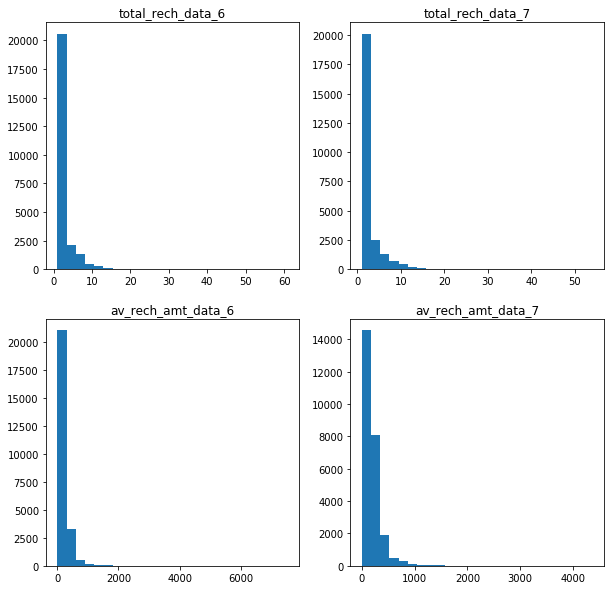

In [14]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom_df.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom_df.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom_df.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom_df.av_rech_amt_data_7.dropna(),bins=25)

In [15]:
telecom_df['total_rech_data_6'].fillna(0,inplace=True)
telecom_df['av_rech_amt_data_6'].fillna(0,inplace=True)

telecom_df['total_rech_data_7'].fillna(0,inplace=True)
telecom_df['av_rech_amt_data_7'].fillna(0,inplace=True)

telecom_df['total_rech_data_8'].fillna(0,inplace=True)
telecom_df['av_rech_amt_data_8'].fillna(0,inplace=True)


In [16]:
round(telecom_df.isnull().sum()/len(telecom_df)*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [17]:
telecom_df_missing=round(telecom_df.isnull().sum(axis=0)/len(telecom_df)*100,2)>=70
telecom_df_missing.sum()

34

In [18]:
telecom_df.shape

(99999, 226)

In [19]:
telecom_df['Total_data_rech_6']=telecom_df['total_rech_data_6']*telecom_df['av_rech_amt_data_6']
telecom_df['Total_data_rech_7']=telecom_df['total_rech_data_7']*telecom_df['av_rech_amt_data_7']
telecom_df['Total_data_rech_8']=telecom_df['total_rech_data_8']*telecom_df['av_rech_amt_data_8']
telecom_df['Total_data_rech_9']=telecom_df['total_rech_data_9']*telecom_df['av_rech_amt_data_9']


In [20]:
telecom_df.shape

(99999, 230)

In [21]:
average_amount_6_7=(telecom_df['Total_data_rech_6']+telecom_df['Total_data_rech_7']+telecom_df['total_rech_amt_6']+telecom_df['total_rech_amt_7'])/2.0
amount_70=np.percentile(average_amount_6_7,70)

In [22]:
telecom_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'Total_data_rech_6', 'Total_data_rech_7',
       'Total_data_rech_8', 'Total_data_rech_9'],
      dtype='object', length=230)

In [23]:
final_telecom_data=telecom_df[average_amount_6_7>=amount_70]

In [24]:
final_telecom_data.shape

(30001, 230)

In [25]:
final_telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

In [26]:
final_telecom_data=final_telecom_data.reset_index(drop=True)
final_telecom_data.head()


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        54.68        52.29          NaN        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        325.91           NaN          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1            NaN          23.74          12.59          38.06            NaN   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.75              

In [27]:

#telecom_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                              # 'jul_vbc_3g':'vbc_3g_7',
                               #'aug_vbc_3g':'vbc_3g_8',
                               #'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [28]:
final_telecom_data['churn'] = final_telecom_data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [29]:
final_telecom_data['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [30]:
colms_with_9=[col for col in final_telecom_data.columns if '_9' in col]

In [31]:
final_telecom_data.drop(colms_with_9,axis=1,inplace=True)

In [32]:
final_telecom_data.shape

(30001, 176)

In [33]:
round(final_telecom_data.isnull().sum()/len(final_telecom_data)*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

#### The columns with more than 40% missing values are as follows:

'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6','arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'

#### So we need to take care of the missing values of these columns:

`1`. <b>'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8':</b>

These columns have more than more than 40% missing values and since it is the date column we cannot impute any arbitery value in place of missing values and by these three columns we are not getting any usefull information we can drop these columns as follows:


In [34]:
final_telecom_data.drop([ 'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1,inplace=True)

In [35]:
final_telecom_data.shape

(30001, 167)

`2`. <b>'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8:</b>

In [36]:
final_telecom_data.max_rech_data_6.describe()

count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

In [37]:
final_telecom_data.max_rech_data_7.describe()

count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64

In [38]:
final_telecom_data.max_rech_data_8.describe()

count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64

#### From the above information we can say that the minimum recharge made by the customers is 1 and maximum is 1555 so in these columns say that the customers has not done any recharge so we can replace the missing values in this columns with 0. And it can be done as follows; 

In [39]:

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    final_telecom_data[col].fillna(0,inplace=True)

`3`.<b>'count_rech_2g_6', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6'</b>

'count_rech_2g_8','count_rech_3g_8',  'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8','fb_user_8'

#### The above columns are all belong to the same month i.e,. 6Th month and have same percent of missing values i.e., `44.15` and these columns belong to the recharge of data for using the services like nightcalls, facebook,2g,3g, etc.. so in these columns if there is a missing value means the customer have not recharged for the service so we can impute `0` in place of a missing value in these columns 

In [40]:

for col in ['count_rech_2g_6', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']:
    final_telecom_data[col].fillna(0,inplace=True)

`4`.<b>'count_rech_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'arpu_2g_7','night_pck_user_7','fb_user_7'</b>

The above columns are all belong to the same month i.e,. 7Th month and have same percent of missing values i.e., `43.15` and these columns belong to the recharge of data for using the services like nightcalls, facebook,2g,3g, etc.. so in these columns if there is a missing value means the customer have not recharged for the service so we can impute `0` in place of a missing value in these column

In [41]:
for col in['count_rech_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'arpu_2g_7','night_pck_user_7','fb_user_7']:
    final_telecom_data[col].fillna(0,inplace=True)

`4`. <b>'count_rech_2g_8','count_rech_3g_8',  'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8','fb_user_8'</b>

The above columns are all belong to the same month i.e,. 8Th month and have same percent of missing values i.e., `46.83` and these columns belong to the recharge of data for using the services like nightcalls, facebook,2g,3g, etc.. so in these columns if there is a missing value means the customer have not recharged for the service so we can impute `0` in place of a missing value in these column


In [42]:
for col in [ 'count_rech_2g_8','count_rech_3g_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8','fb_user_8']:
    final_telecom_data[col].fillna(0,inplace=True)

In [43]:
round(final_telecom_data.isnull().sum()/len(final_telecom_data)*100,2)

mobile_number         0.00
circle_id             0.00
loc_og_t2o_mou        0.75
std_og_t2o_mou        0.75
loc_ic_t2o_mou        0.75
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.82
onnet_mou_7           1.79
onnet_mou_8           3.91
offnet_mou_6          1.82
offnet_mou_7          1.79
offnet_mou_8          3.91
roam_ic_mou_6         1.82
roam_ic_mou_7         1.79
roam_ic_mou_8         3.91
roam_og_mou_6         1.82
roam_og_mou_7         1.79
roam_og_mou_8         3.91
loc_og_t2t_mou_6      1.82
loc_og_t2t_mou_7      1.79
loc_og_t2t_mou_8      3.91
loc_og_t2m_mou_6      1.82
loc_og_t2m_mou_7      1.79
loc_og_t2m_mou_8      3.91
loc_og_t2f_mou_6      1.82
loc_og_t2f_mou_7      1.79
loc_og_t2f_mou_8      3.91
loc_og_t2c_mou_6      1.82
loc_og_t2c_mou_7      1.79
loc_og_t2c_mou_8      3.91
loc_og_mou_6          1.82
loc_og_mou_7          1.79
loc_og_mou_8          3.91
std_og_t2t_mou_6      1.82
std_og_t2t_mou_7      1.79
s

#### We need to find out the columns with 0 variance. 0 variance means that we cant get any usefull information from those columns and we can drop them .

we can do that by using var() and nunique() methods.


In [44]:
cols_with_0_variance=final_telecom_data.var()==0
col_names_0_variance=cols_with_0_variance[cols_with_0_variance==1].index
col_names_0_variance


Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [45]:
final_telecom_data.drop(col_names_0_variance,axis=1,inplace=True)

In [46]:
cols_with_1_value=final_telecom_data.nunique()==1
col_names_1_value=cols_with_1_value[cols_with_1_value==1].index
col_names_1_value

Index([], dtype='object')

In [47]:
final_telecom_data.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803          NaN          NaN   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002124215   514.453   597.753   637.760       102.41       132.11   
4     7000887461    74.350   193.897   366.966        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00           NaN           NaN          0.00            NaN   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            NaN           0.00            NaN            NaN           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               NaN              0.00               NaN               NaN   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               NaN               NaN              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           NaN           NaN          0.00               NaN   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00        

In [48]:
final_telecom_data.shape

(30001, 157)

In [49]:
cols_missingvalues=final_telecom_data.columns[final_telecom_data.isna().any()].tolist()
print(cols_missingvalues)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [50]:
cols_with_6 = [col for col in cols_missingvalues if '_6' in col]

final_telecom_data[cols_with_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 27 columns):
onnet_mou_6         29456 non-null float64
offnet_mou_6        29456 non-null float64
roam_ic_mou_6       29456 non-null float64
roam_og_mou_6       29456 non-null float64
loc_og_t2t_mou_6    29456 non-null float64
loc_og_t2m_mou_6    29456 non-null float64
loc_og_t2f_mou_6    29456 non-null float64
loc_og_t2c_mou_6    29456 non-null float64
loc_og_mou_6        29456 non-null float64
std_og_t2t_mou_6    29456 non-null float64
std_og_t2m_mou_6    29456 non-null float64
std_og_t2f_mou_6    29456 non-null float64
std_og_mou_6        29456 non-null float64
isd_og_mou_6        29456 non-null float64
spl_og_mou_6        29456 non-null float64
og_others_6         29456 non-null float64
loc_ic_t2t_mou_6    29456 non-null float64
loc_ic_t2m_mou_6    29456 non-null float64
loc_ic_t2f_mou_6    29456 non-null float64
loc_ic_mou_6        29456 non-null float64
std_ic_t2t_mou_6    29456 non-n

#### The above information says us that there are about 545 missing values in these columns out of  30001. And these columns represent the how many minutes does the customer made calls inside the network or outside the network. So if any minute among these columns is missing we can impute this by 0.


similarly we can do for all the other months information and fill all the missing values in these columns with zero

In [51]:
col_with_7=[col for col in cols_missingvalues if '_7' in col]
final_telecom_data[col_with_7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 27 columns):
onnet_mou_7         29464 non-null float64
offnet_mou_7        29464 non-null float64
roam_ic_mou_7       29464 non-null float64
roam_og_mou_7       29464 non-null float64
loc_og_t2t_mou_7    29464 non-null float64
loc_og_t2m_mou_7    29464 non-null float64
loc_og_t2f_mou_7    29464 non-null float64
loc_og_t2c_mou_7    29464 non-null float64
loc_og_mou_7        29464 non-null float64
std_og_t2t_mou_7    29464 non-null float64
std_og_t2m_mou_7    29464 non-null float64
std_og_t2f_mou_7    29464 non-null float64
std_og_mou_7        29464 non-null float64
isd_og_mou_7        29464 non-null float64
spl_og_mou_7        29464 non-null float64
og_others_7         29464 non-null float64
loc_ic_t2t_mou_7    29464 non-null float64
loc_ic_t2m_mou_7    29464 non-null float64
loc_ic_t2f_mou_7    29464 non-null float64
loc_ic_mou_7        29464 non-null float64
std_ic_t2t_mou_7    29464 non-n

In [52]:
cols_with_8=[col for col in cols_missingvalues if '_8' in col]
final_telecom_data[col_with_7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 27 columns):
onnet_mou_7         29464 non-null float64
offnet_mou_7        29464 non-null float64
roam_ic_mou_7       29464 non-null float64
roam_og_mou_7       29464 non-null float64
loc_og_t2t_mou_7    29464 non-null float64
loc_og_t2m_mou_7    29464 non-null float64
loc_og_t2f_mou_7    29464 non-null float64
loc_og_t2c_mou_7    29464 non-null float64
loc_og_mou_7        29464 non-null float64
std_og_t2t_mou_7    29464 non-null float64
std_og_t2m_mou_7    29464 non-null float64
std_og_t2f_mou_7    29464 non-null float64
std_og_mou_7        29464 non-null float64
isd_og_mou_7        29464 non-null float64
spl_og_mou_7        29464 non-null float64
og_others_7         29464 non-null float64
loc_ic_t2t_mou_7    29464 non-null float64
loc_ic_t2m_mou_7    29464 non-null float64
loc_ic_t2f_mou_7    29464 non-null float64
loc_ic_mou_7        29464 non-null float64
std_ic_t2t_mou_7    29464 non-n

In [53]:
for col in cols_missingvalues:
    final_telecom_data[col].fillna(0,inplace=True)
    

In [54]:
final_telecom_data.shape

(30001, 157)

In [55]:
print(round(final_telecom_data.isnull().sum()/len(final_telecom_data)*100,2))

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

In [56]:
final_telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 157 columns):
mobile_number         int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          

<b>we can see the information of the revenue columns:</b>

In [57]:
final_telecom_data.arpu_6.describe()

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64

In [58]:
final_telecom_data.arpu_7.describe()

count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64

In [59]:
final_telecom_data.arpu_8.describe()

count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64

From the above description we can see the minimum values are in negitive number. But as per the discription these columns are the average revenue per user. This means the revenue earned by the company by the billing of the customer. If the customer doesnot producing any revenue means the customer has stopped to use services providing by the company.
So the values with negitive values in these columns indicates the data is incoerrect so we can inspect each column and drop those rows with incorrect data. 

In [60]:
arpu_6_incorrect=(final_telecom_data['arpu_6']<0).sum()
arpu_6_incorrect

39

In [61]:
final_telecom_data=final_telecom_data[(final_telecom_data['arpu_6']>=0) &(final_telecom_data['arpu_7']>=0) &
                                      (final_telecom_data['arpu_8']>=0)]
final_telecom_data.shape

(29824, 157)

In [62]:
final_telecom_data.night_pck_user_6.describe()

count    29824.000000
mean         0.013546
std          0.115599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

In [63]:
final_telecom_data.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803         0.00         0.00   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002124215   514.453   597.753   637.760       102.41       132.11   
4     7000887461    74.350   193.897   366.966        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00        

the columns like night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8 are encoded with number 0 and 1. These variables can be considered as Ordered Categorical columns. We can convert these columns from float to int datatype as follows:


In [64]:
categorical=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8' ]
final_telecom_data[categorical]=final_telecom_data[categorical].astype(int)
final_telecom_data[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
night_pck_user_6    29824 non-null int32
night_pck_user_7    29824 non-null int32
night_pck_user_8    29824 non-null int32
fb_user_6           29824 non-null int32
fb_user_7           29824 non-null int32
fb_user_8           29824 non-null int32
dtypes: int32(6)
memory usage: 932.0 KB


In [65]:
# We will drop the column 'mobile_number' since we are not using this for analyasis:
final_telecom_data.drop(['mobile_number'],axis=1,inplace=True)

In [66]:
final_telecom_data.shape

(29824, 156)

### Exploratory data analysis:

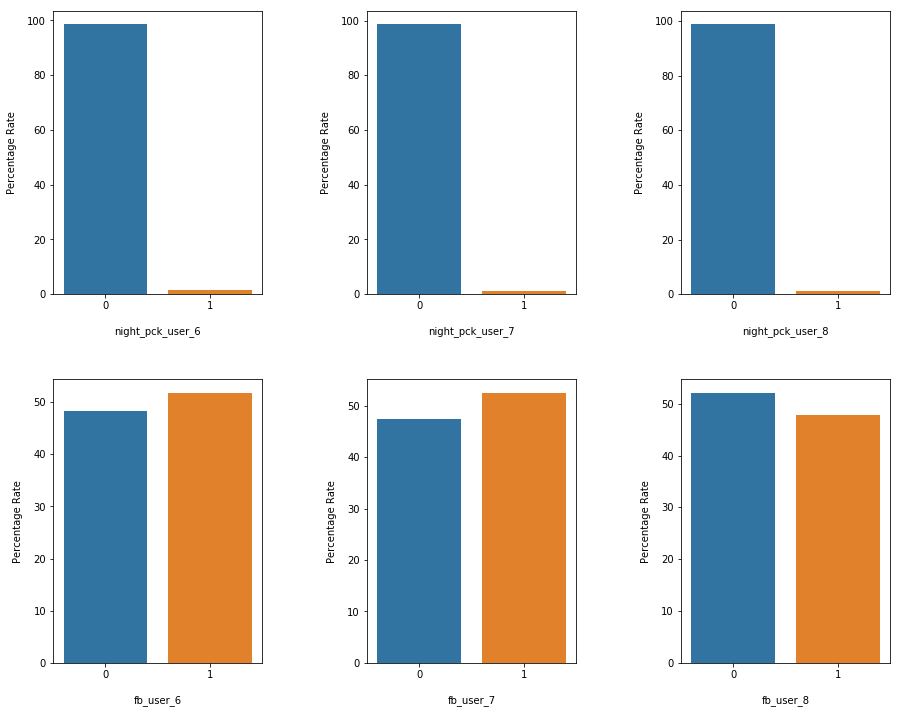

In [67]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((final_telecom_data[col_list].value_counts(dropna = False))/(len(final_telecom_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

 
    
    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

####  Data balence check on the target variable i.e., 'churn'

In [68]:
churn=final_telecom_data.churn.value_counts()
print(churn[1])
print(churn[0])

2364
27460


In [69]:
churn_rate=churn[1]/(churn[1] + churn[0])
round(churn_rate*100,2)

7.93

Positive examples = 2364
Negative examples = 27460
Proportion of positive to negative examples = 8.61%


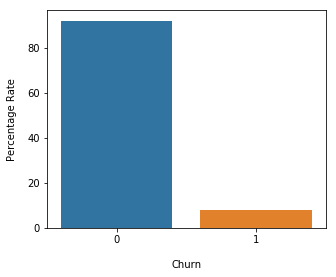

In [70]:
# Get number of positve and negative examples
pos = final_telecom_data[final_telecom_data["churn"] == 1].shape[0]
neg = final_telecom_data[final_telecom_data["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (5, 4))

series = round(((final_telecom_data["churn"].value_counts(dropna = False))/(len(final_telecom_data["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function


plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

#### From the above data we can see that the dataset is highly imbalenced we need to handle this before modelling

In [71]:
def plot_fig(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)



In [72]:
def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    # Call Custom Function
    plot_fig(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    plot_fig(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

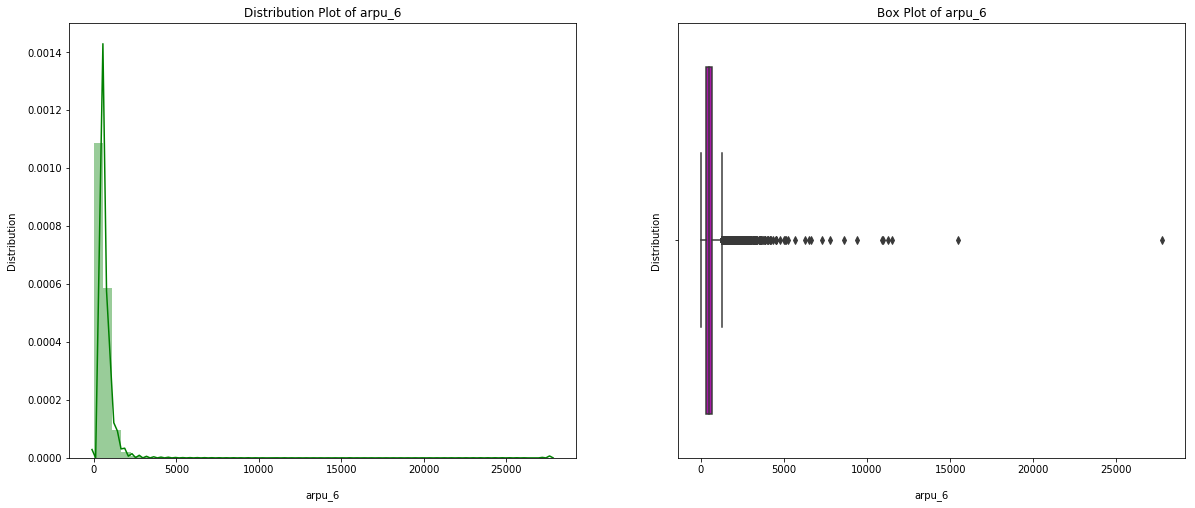

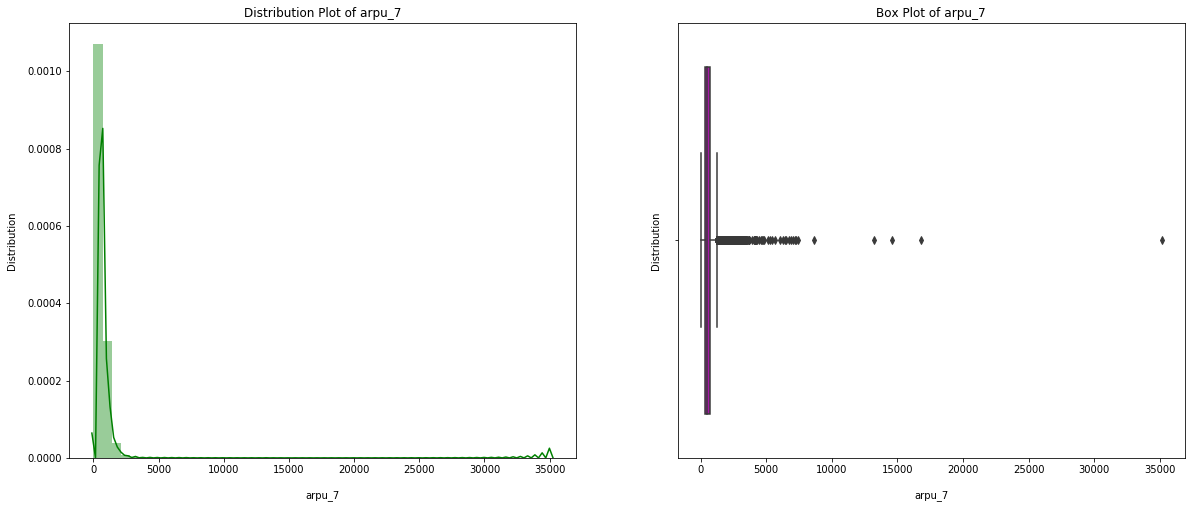

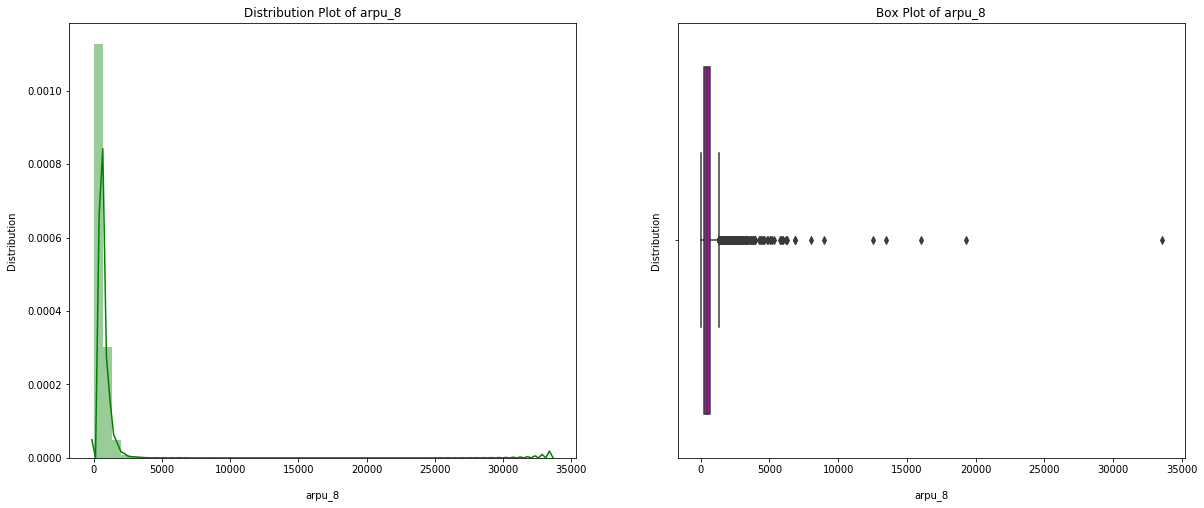

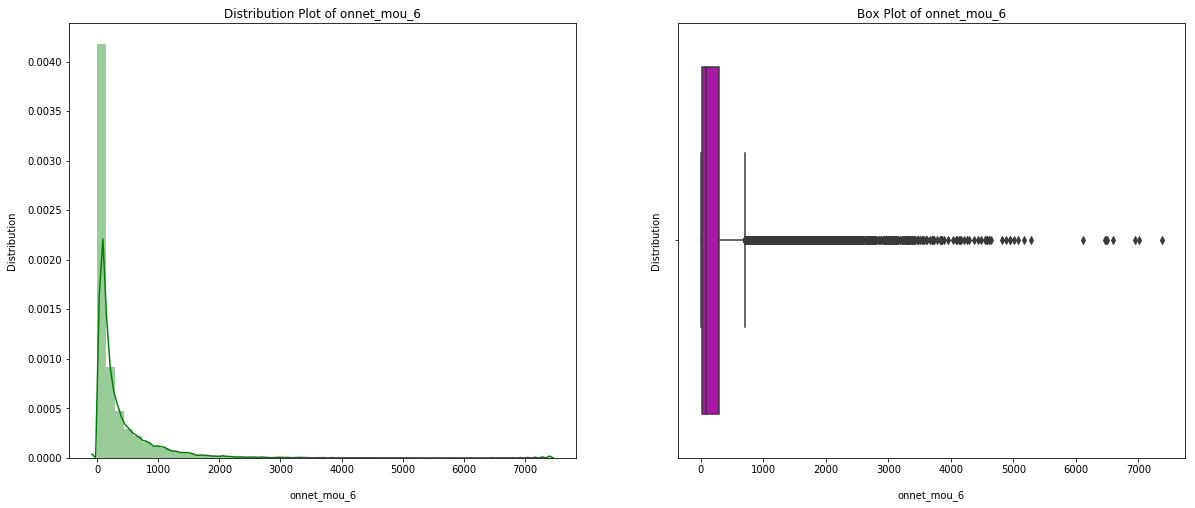

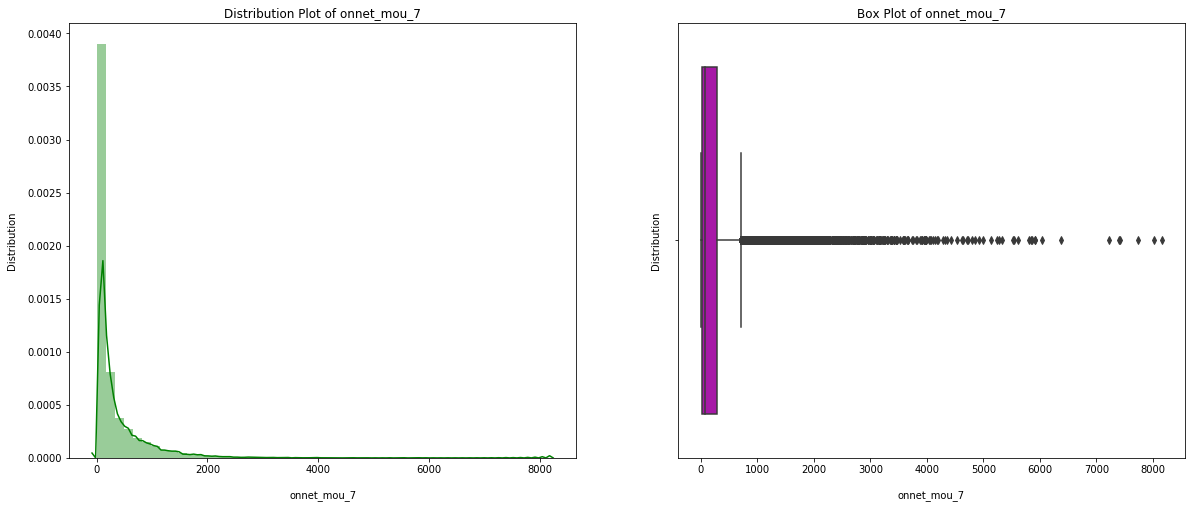

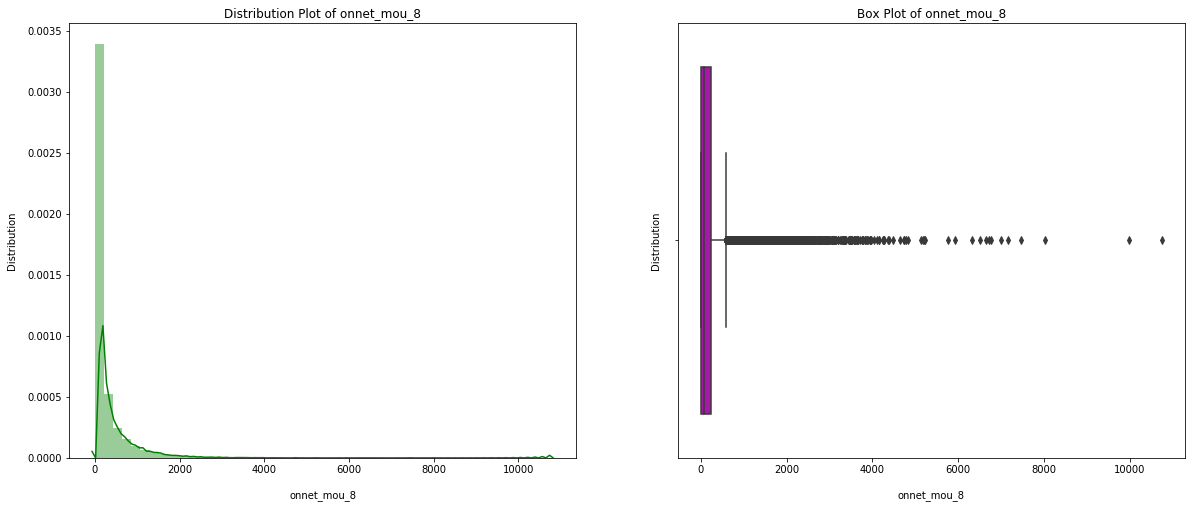

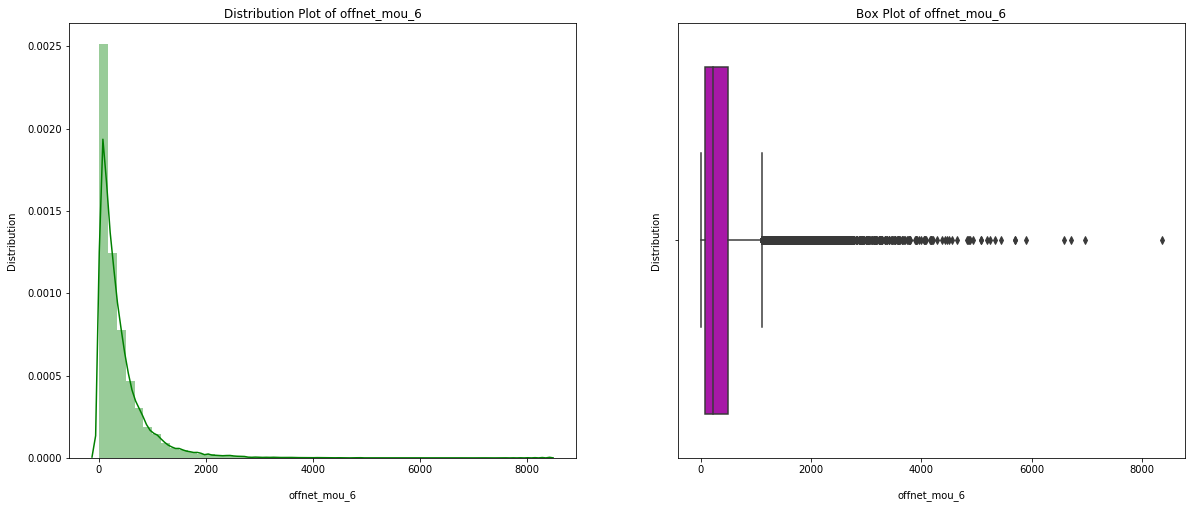

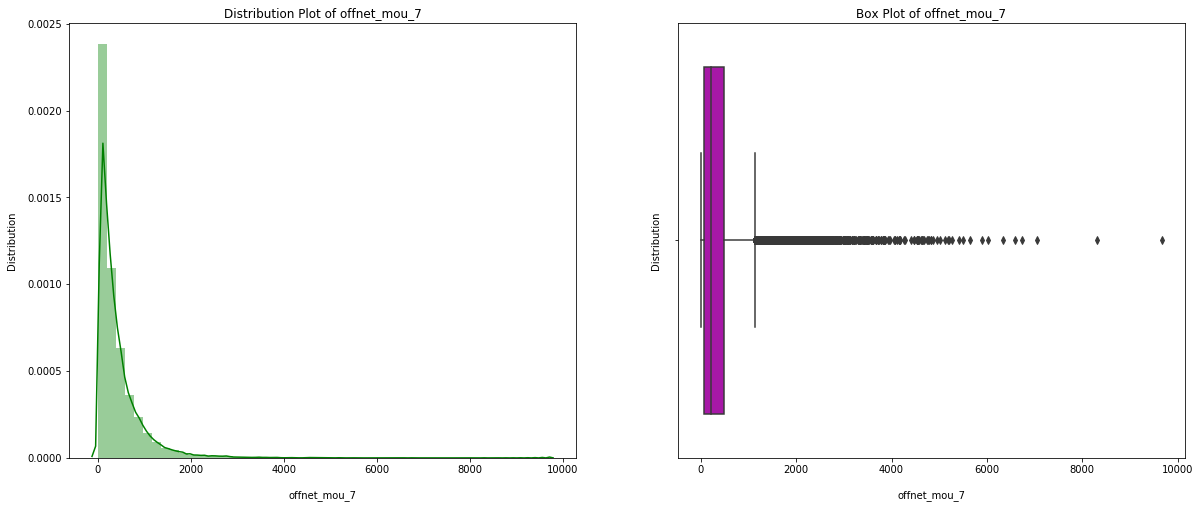

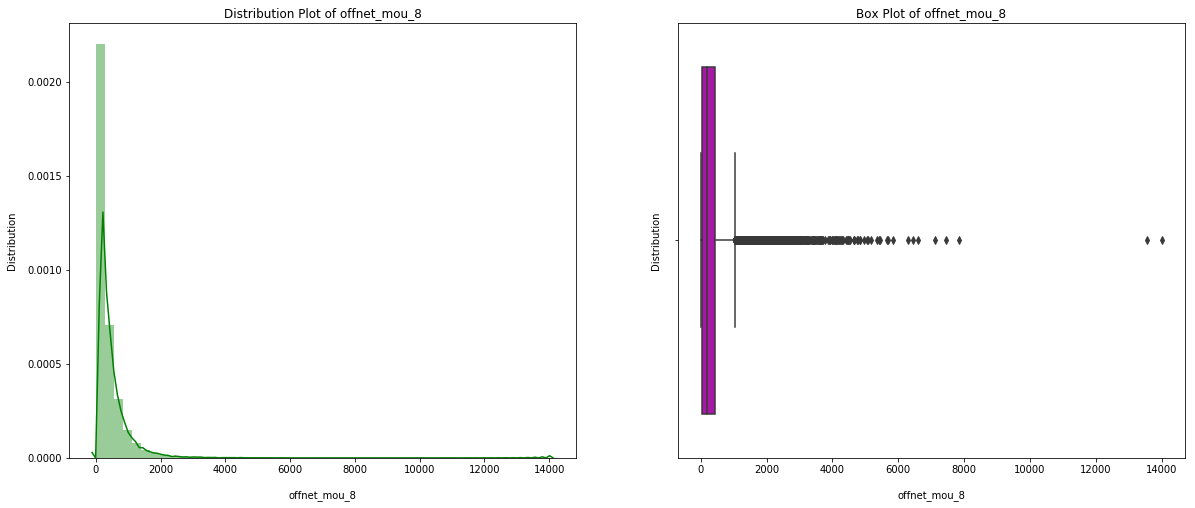

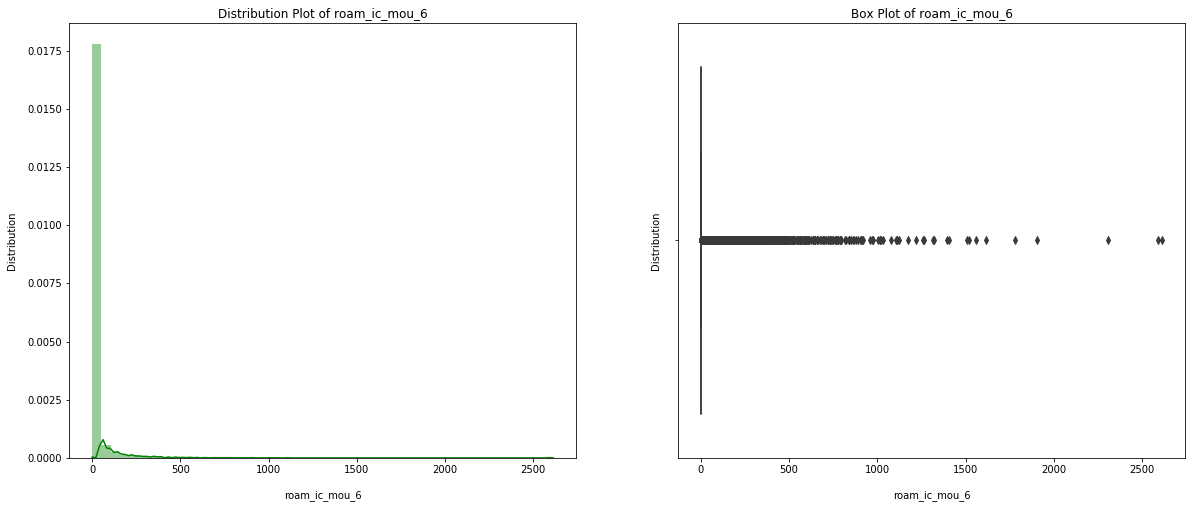

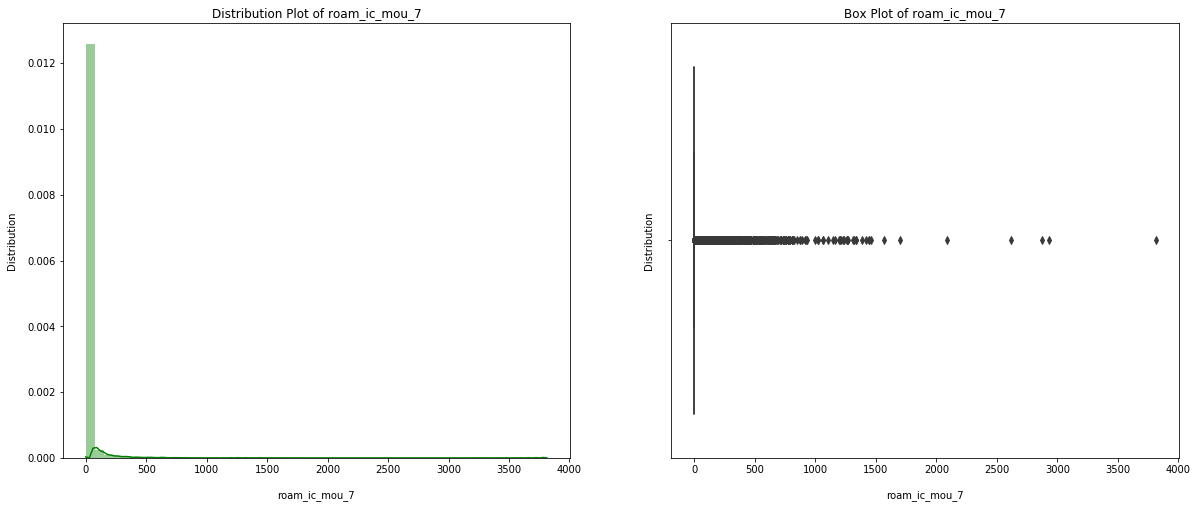

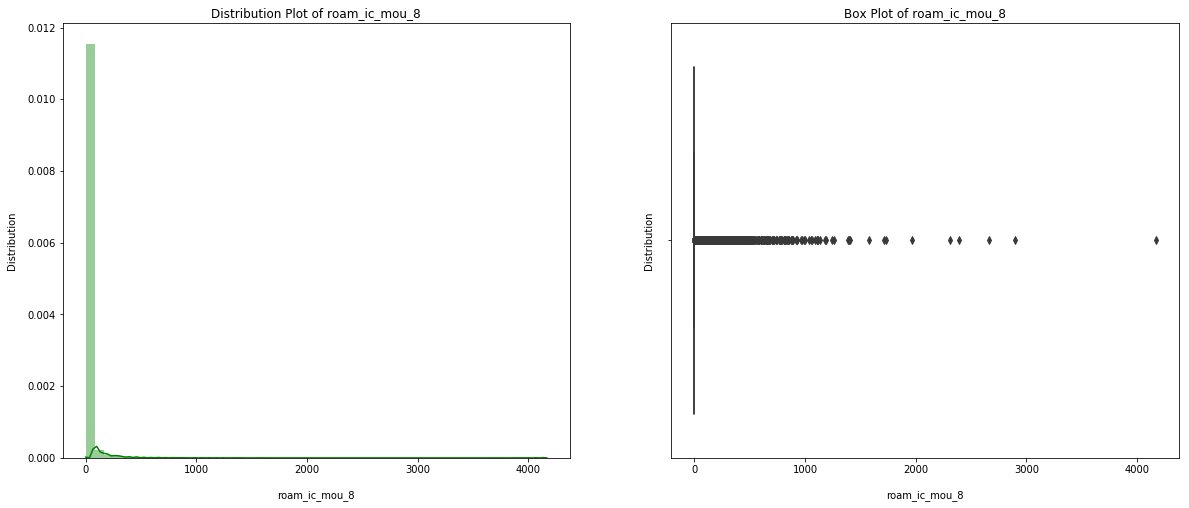

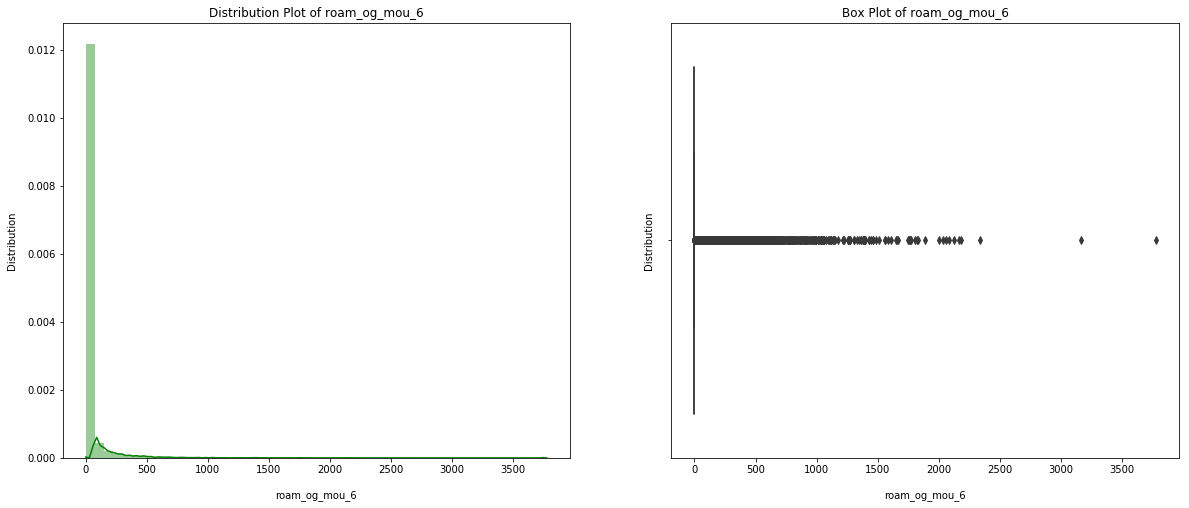

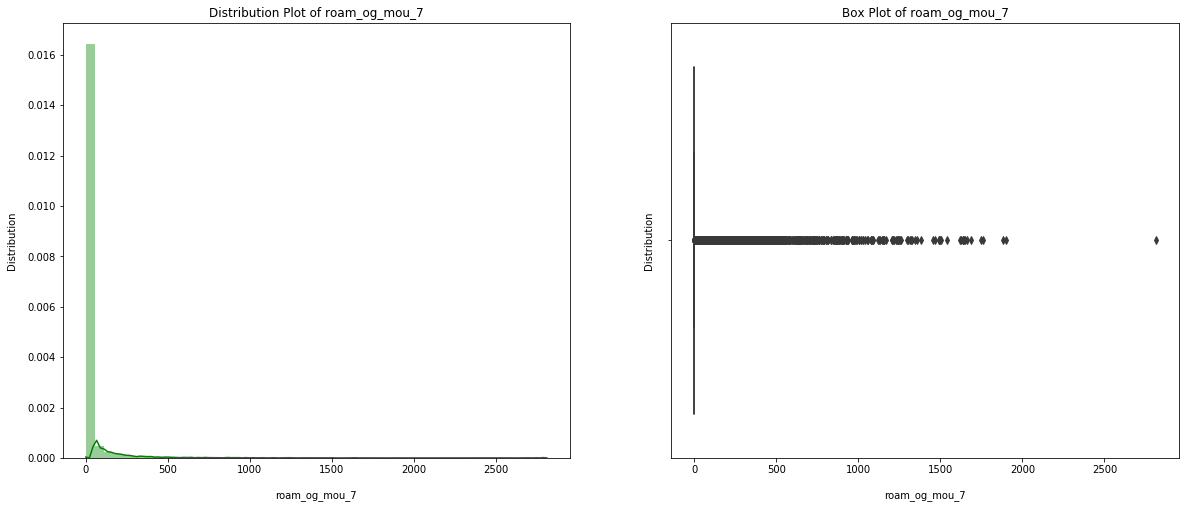

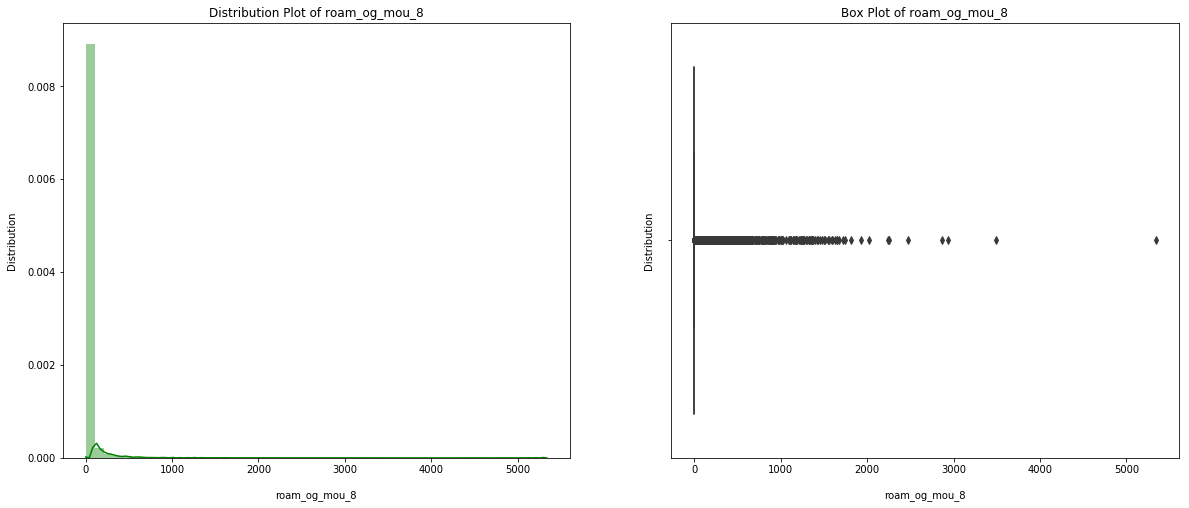

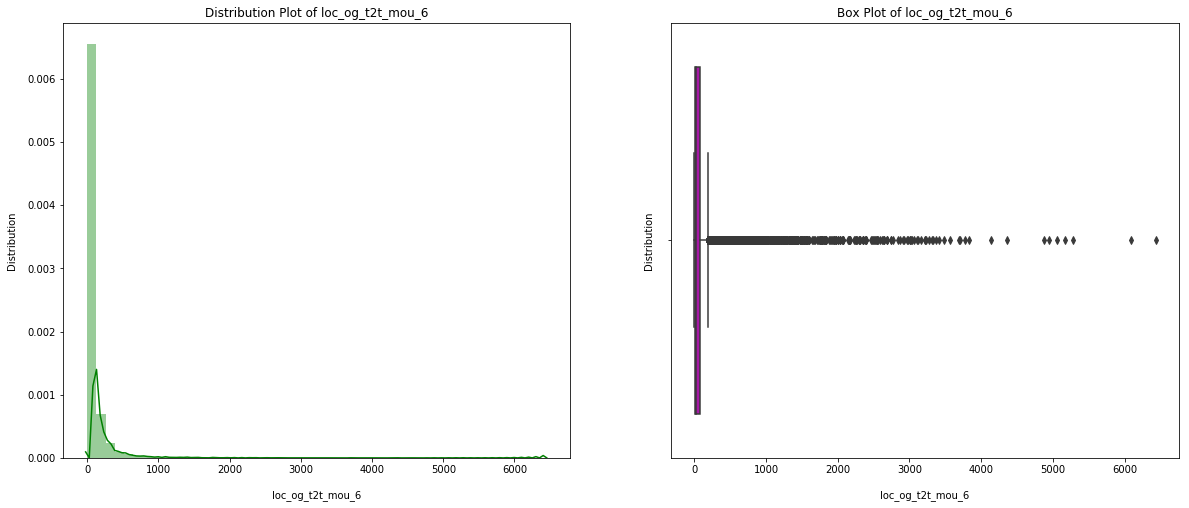

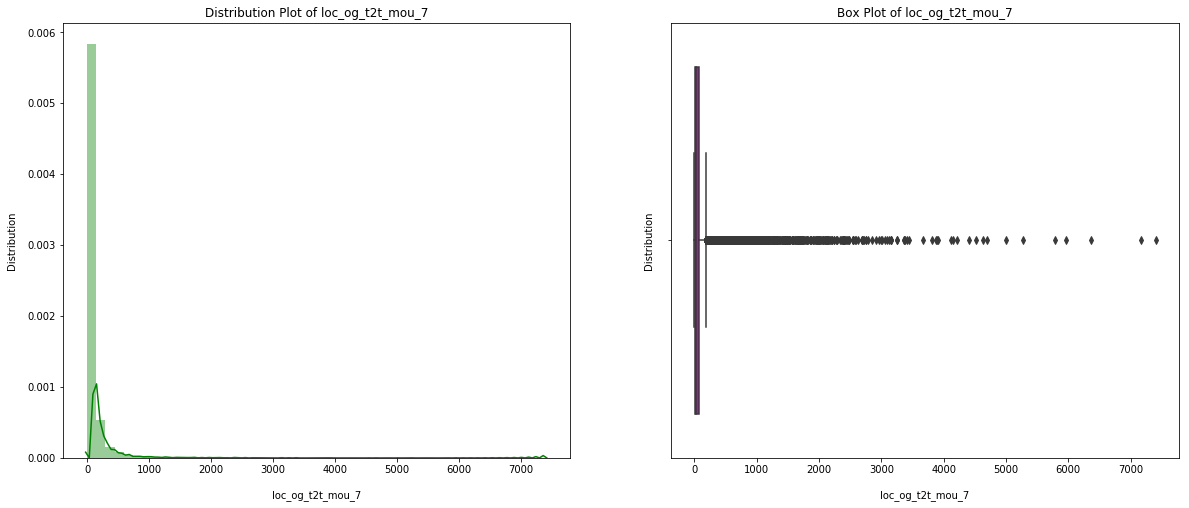

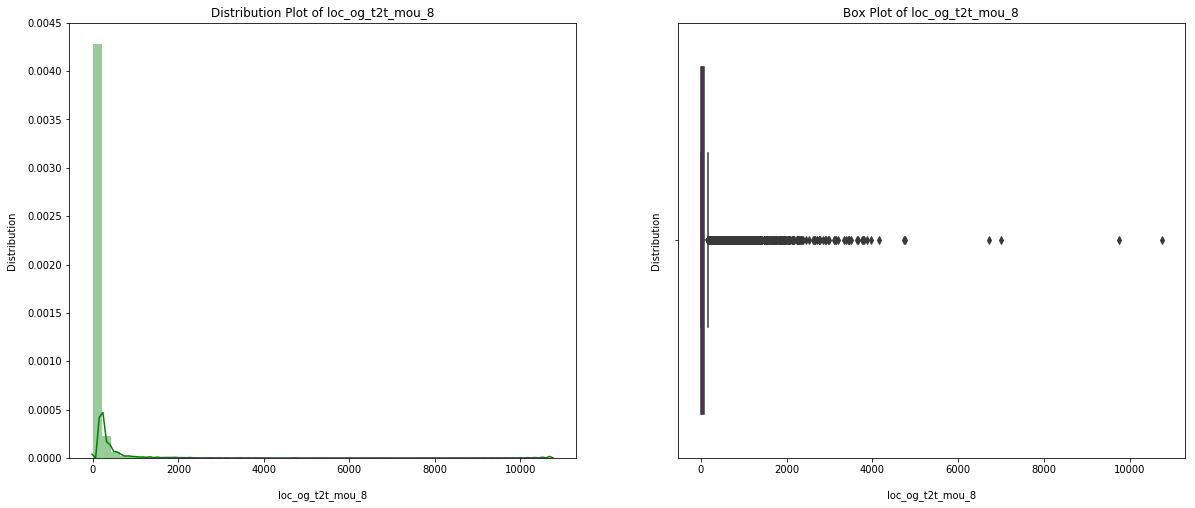

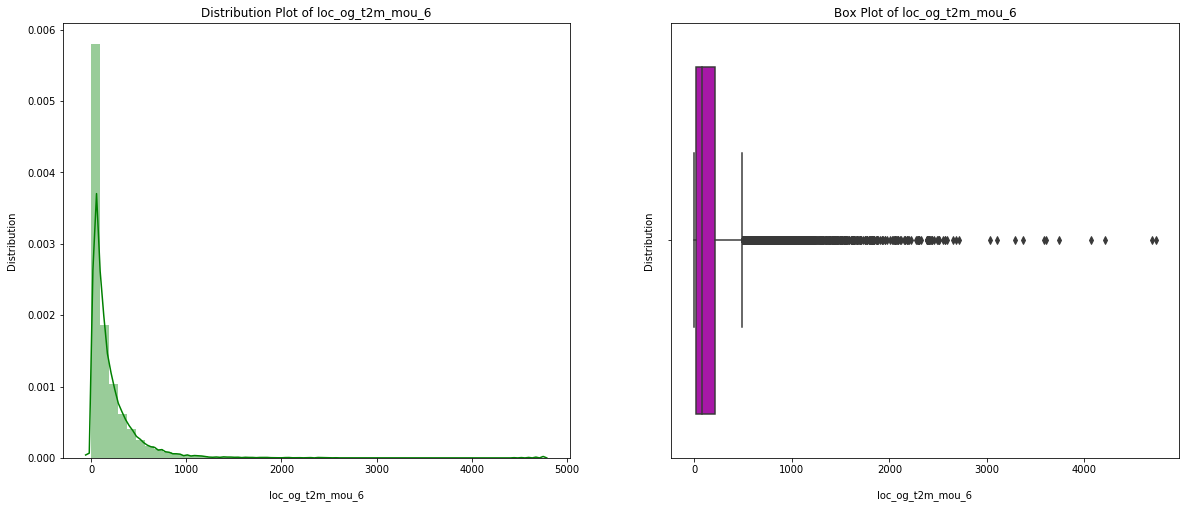

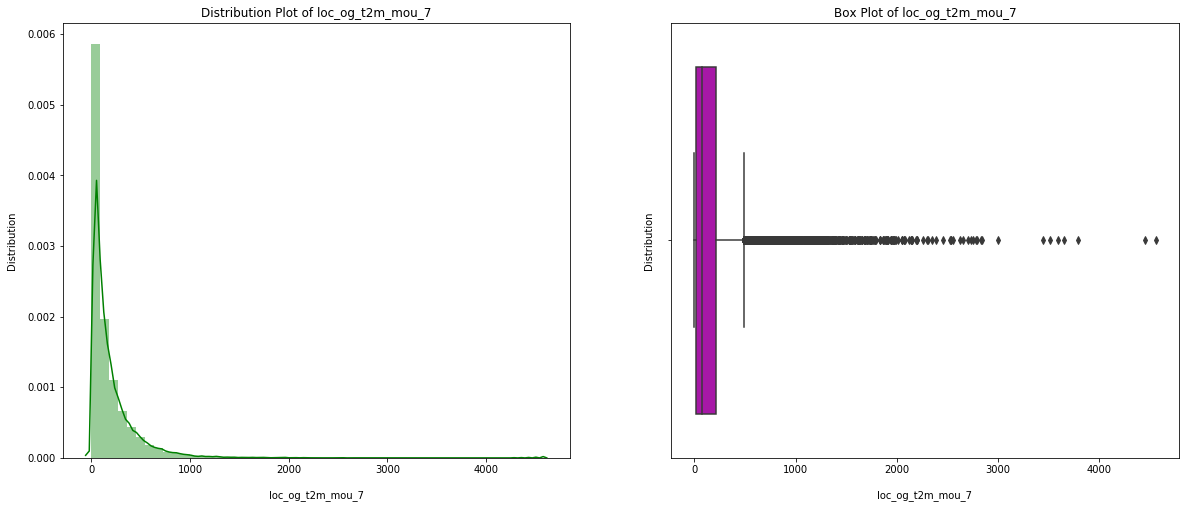

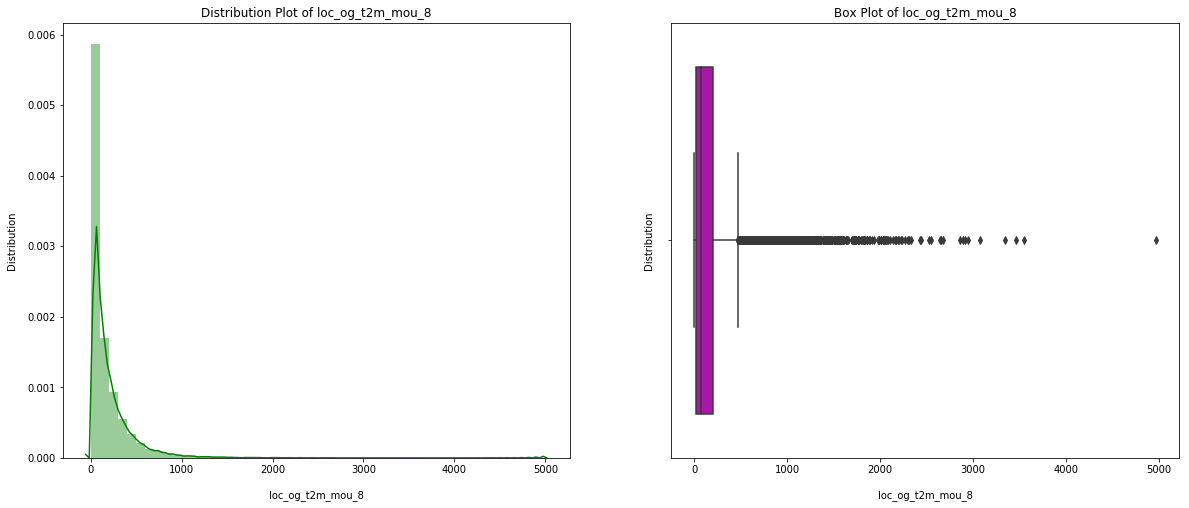

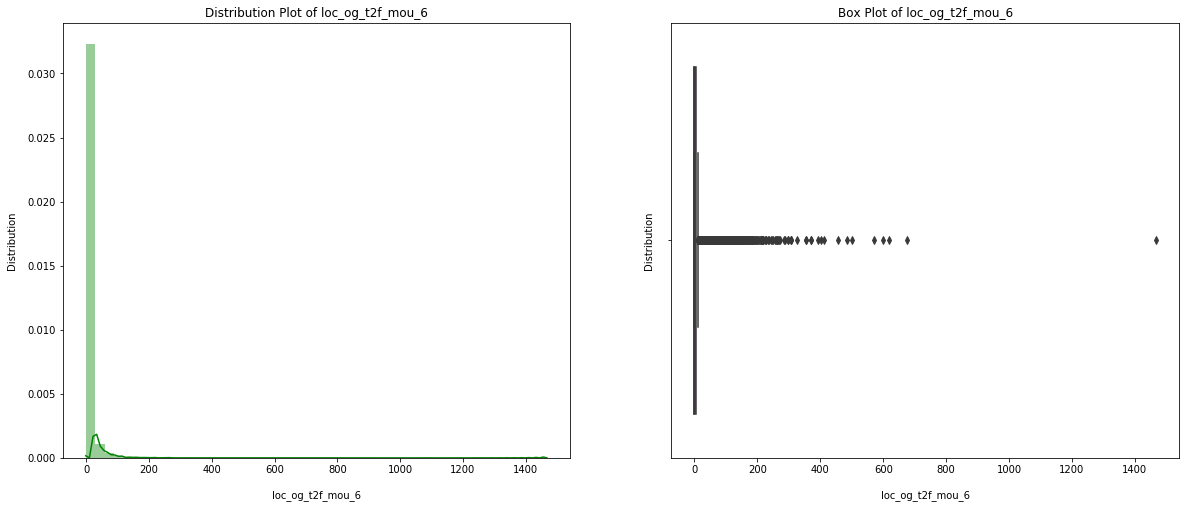

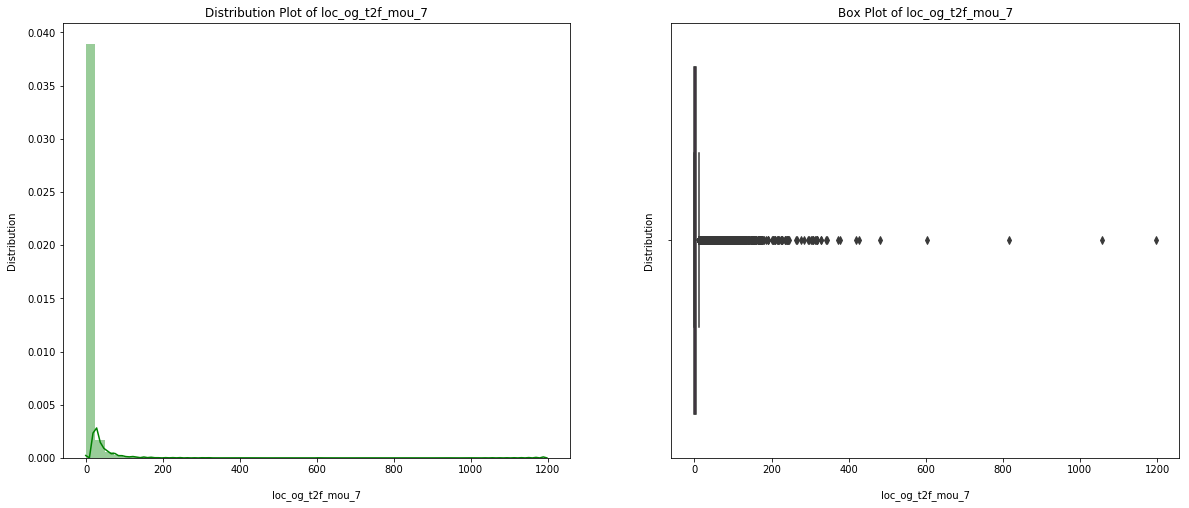

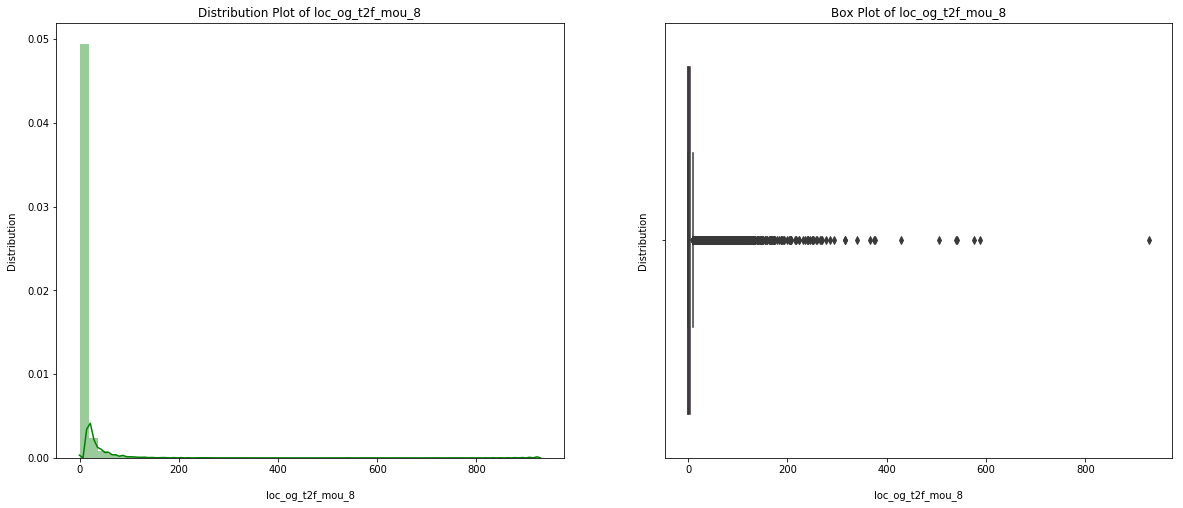

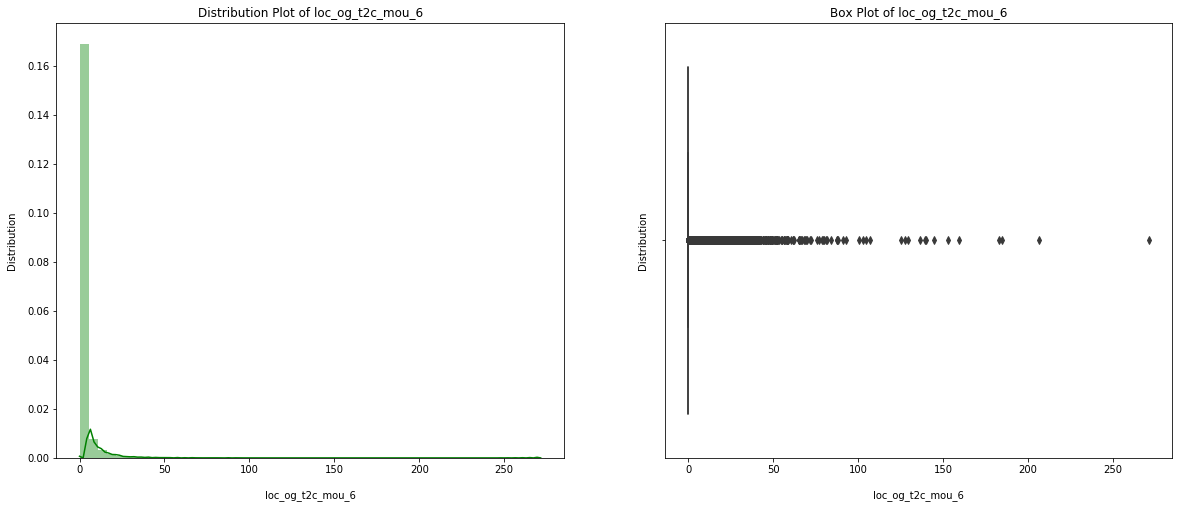

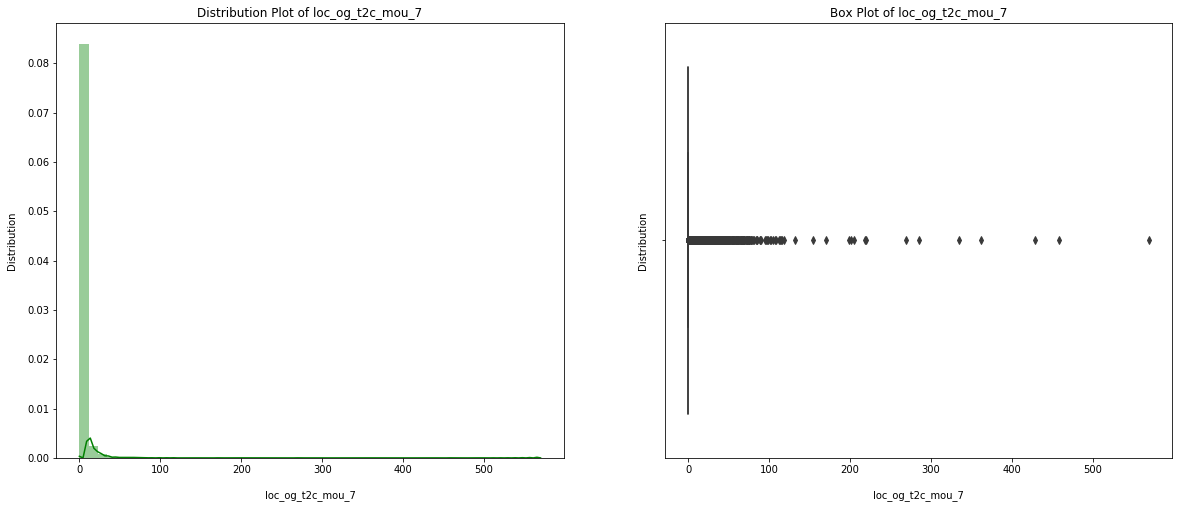

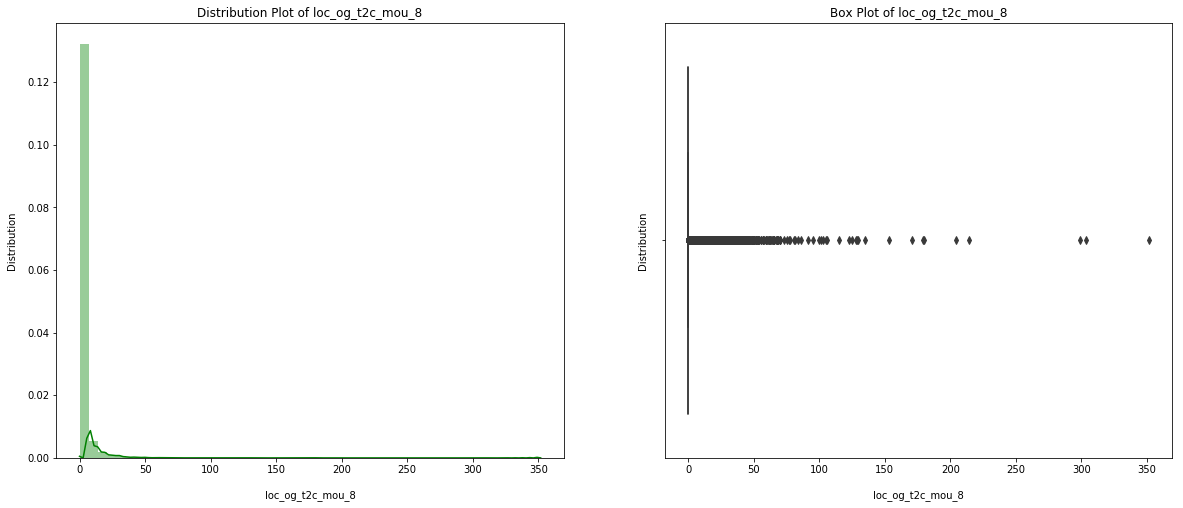

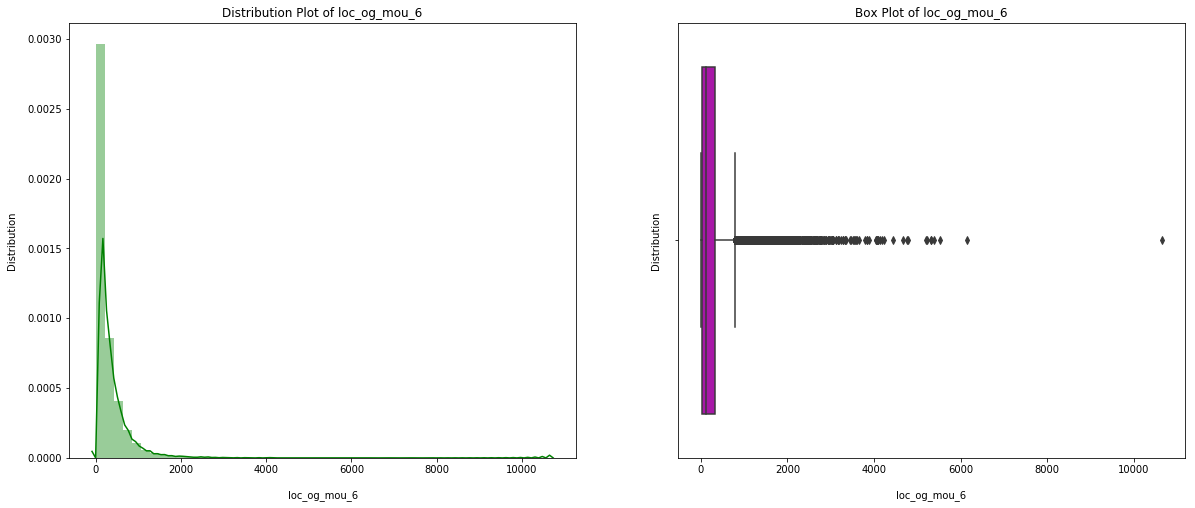

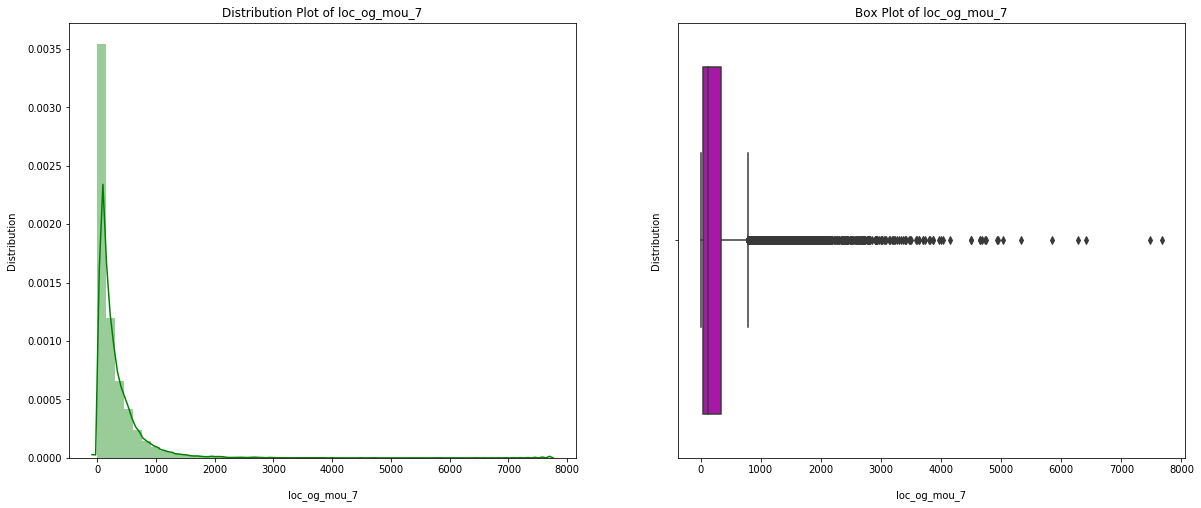

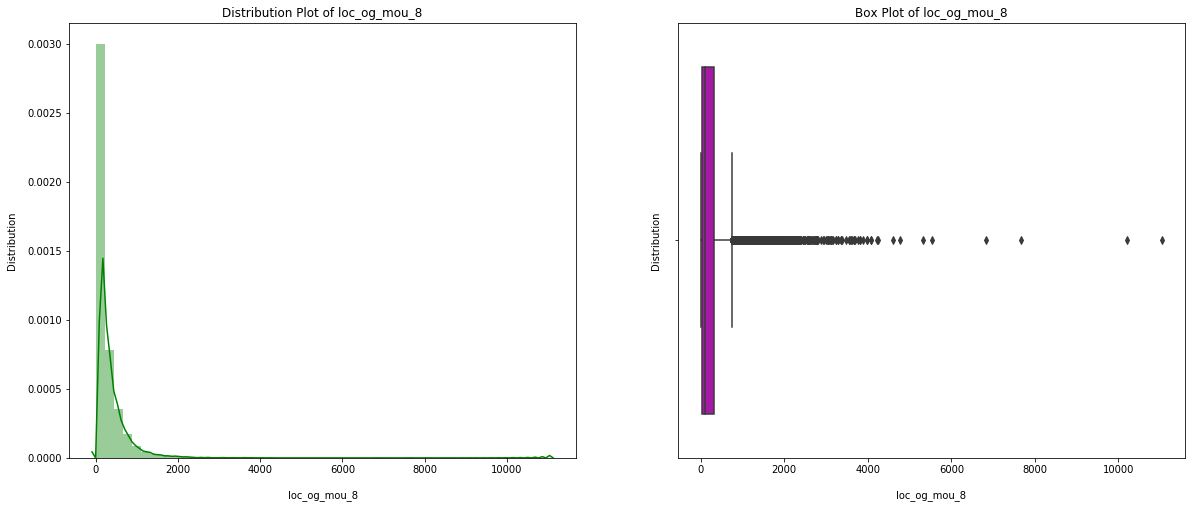

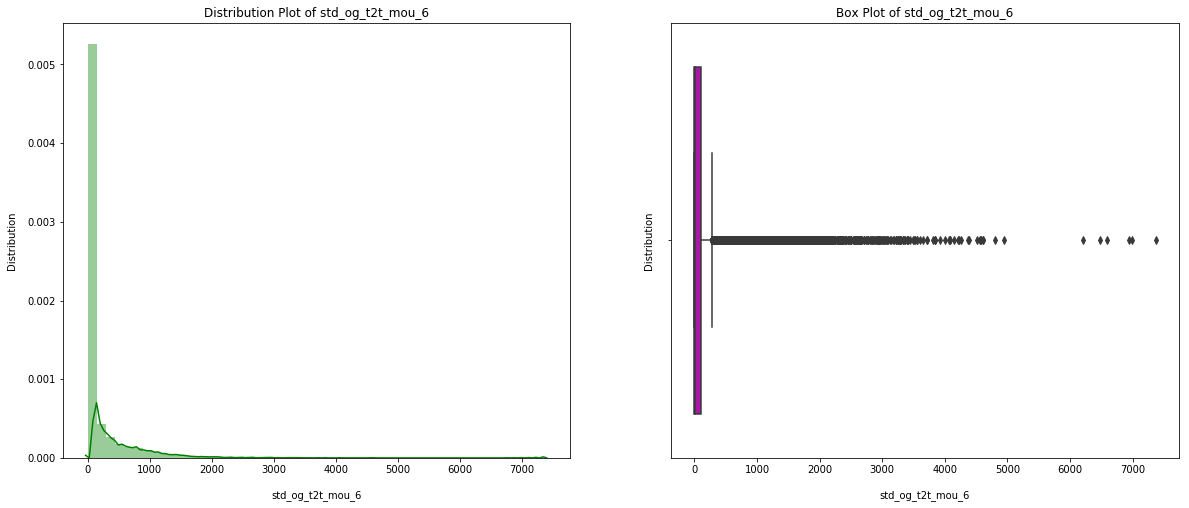

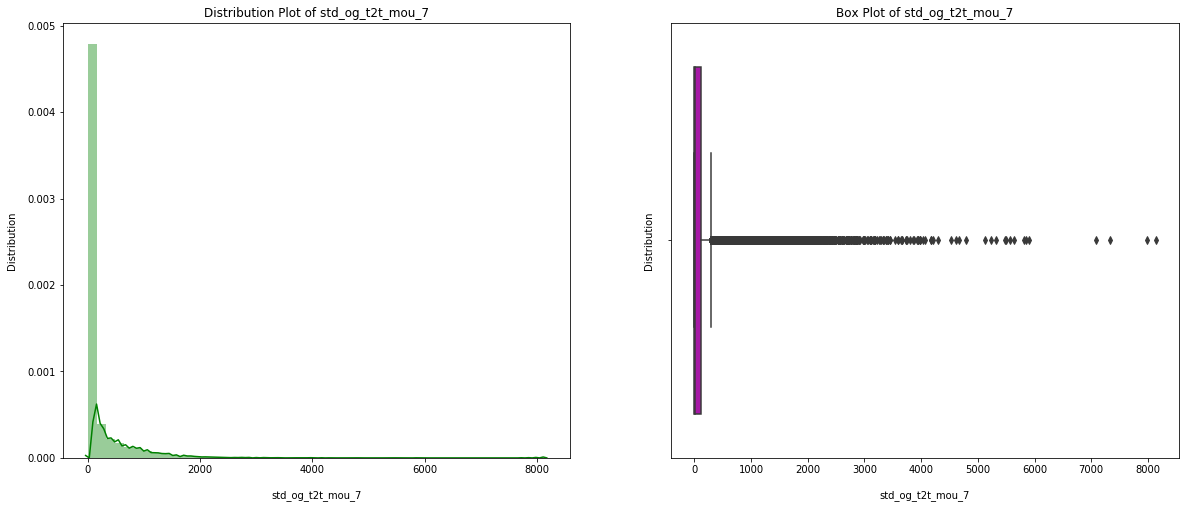

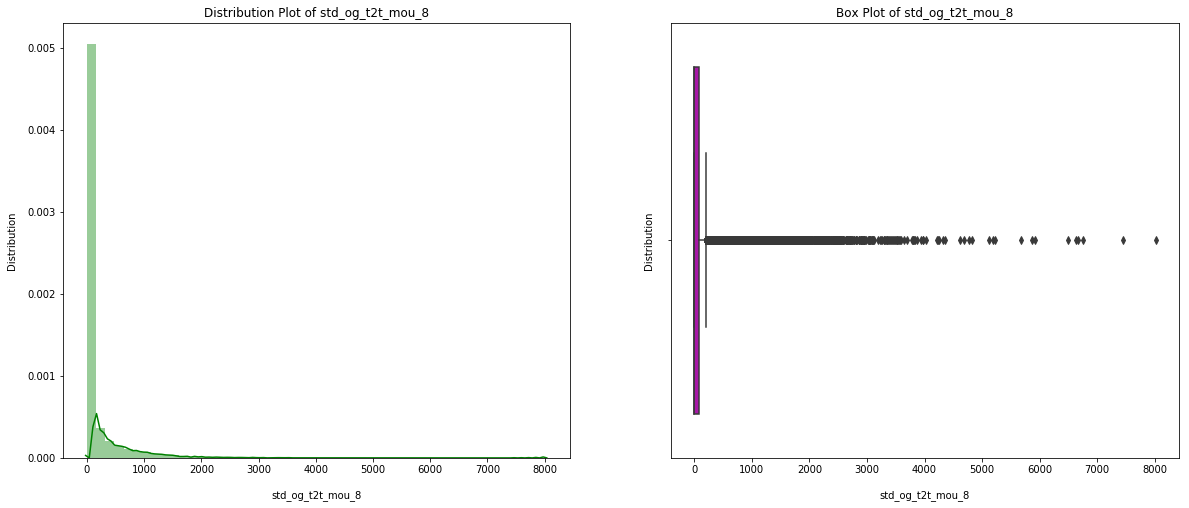

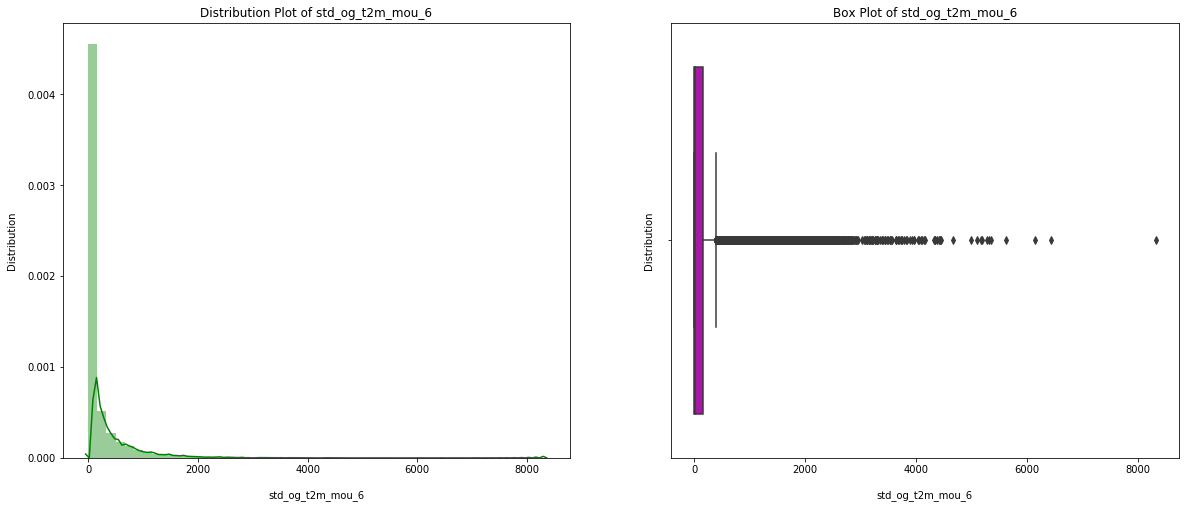

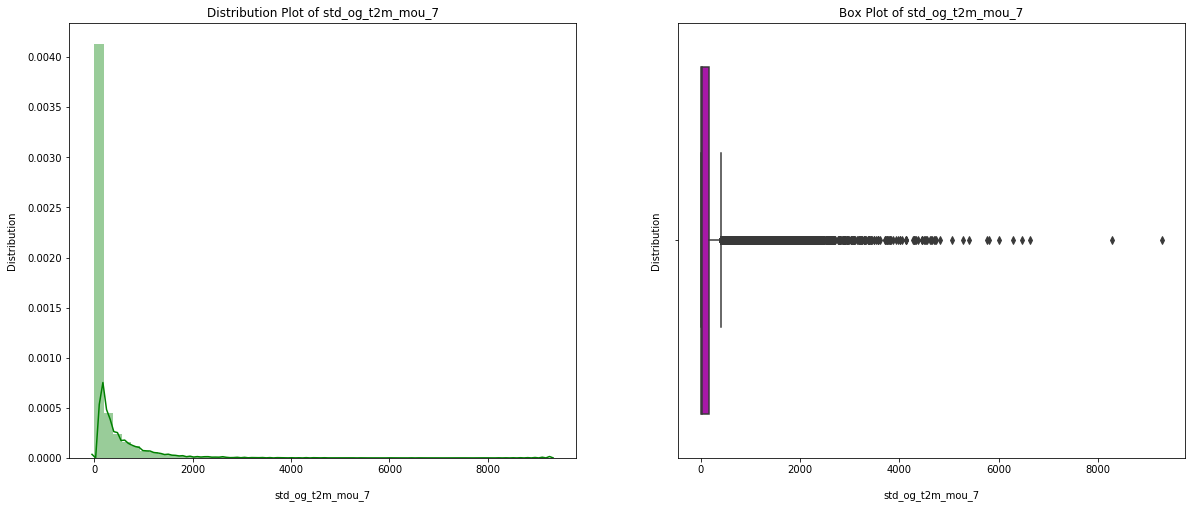

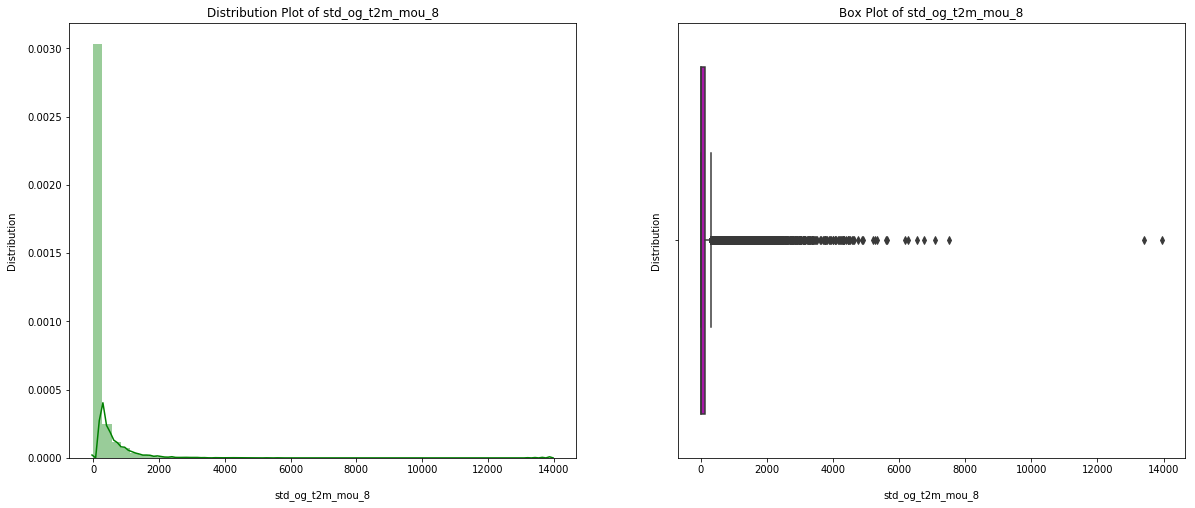

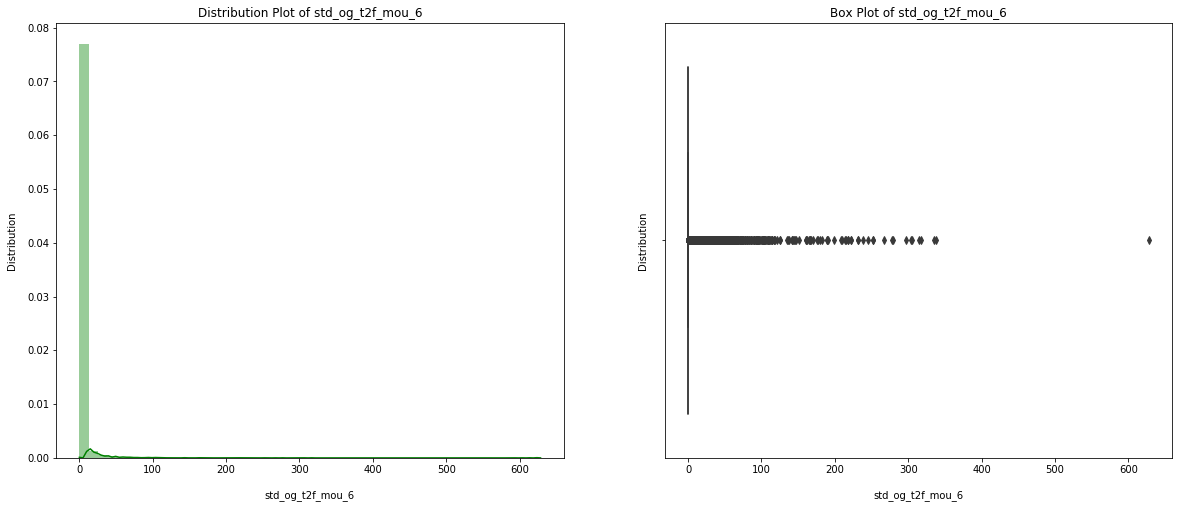

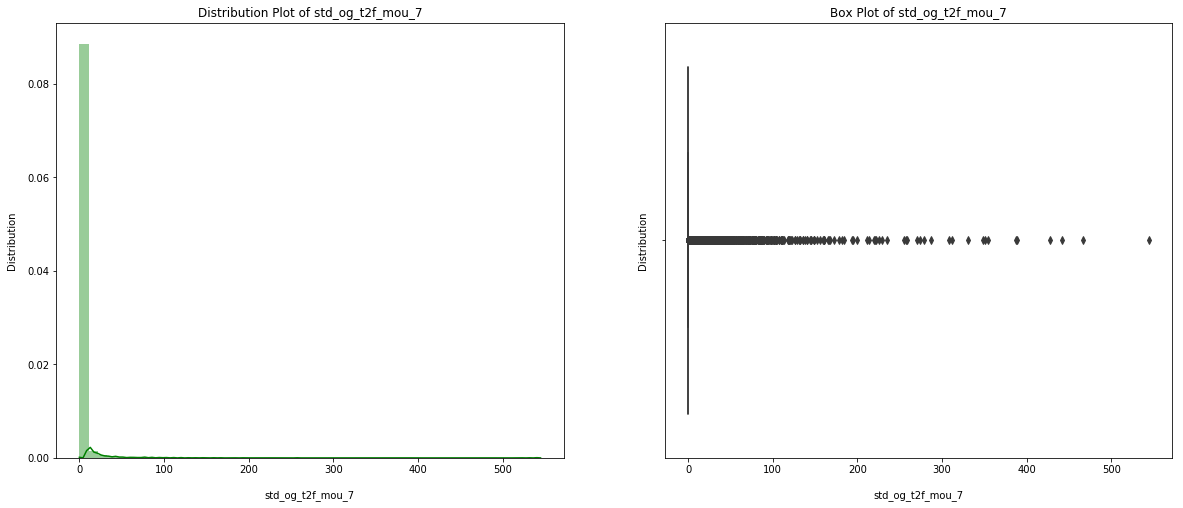

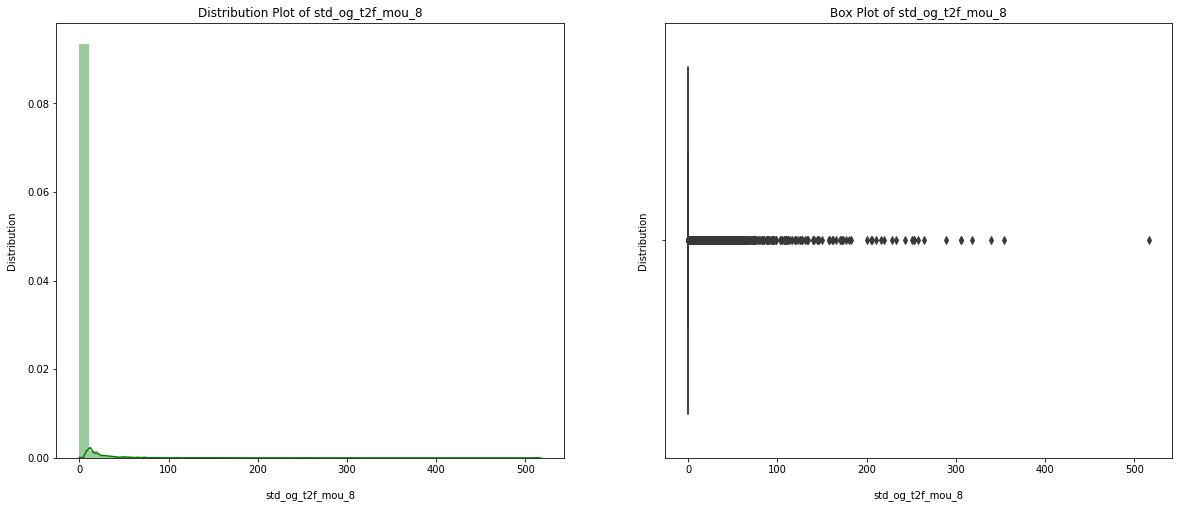

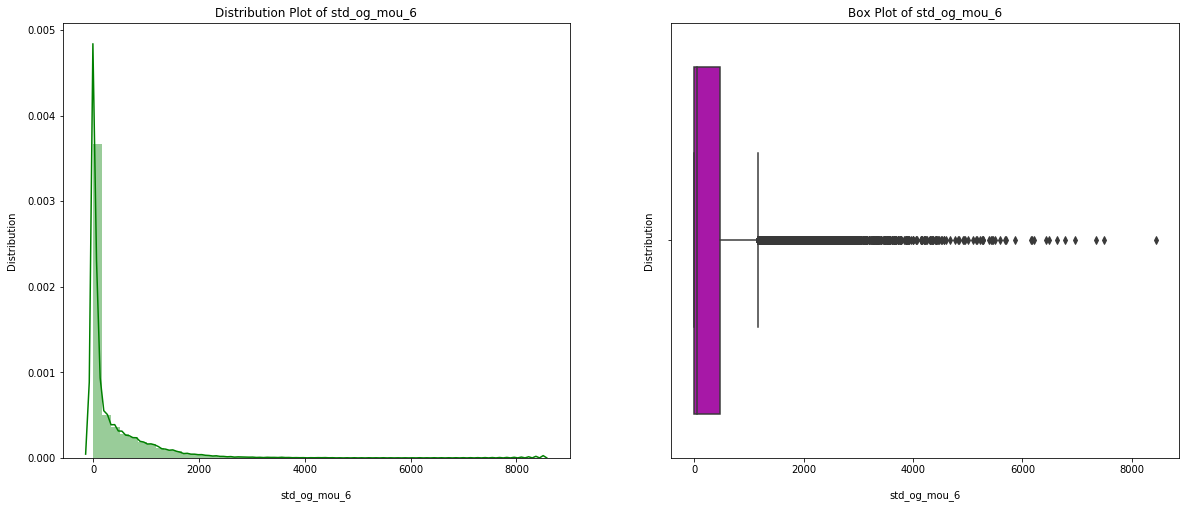

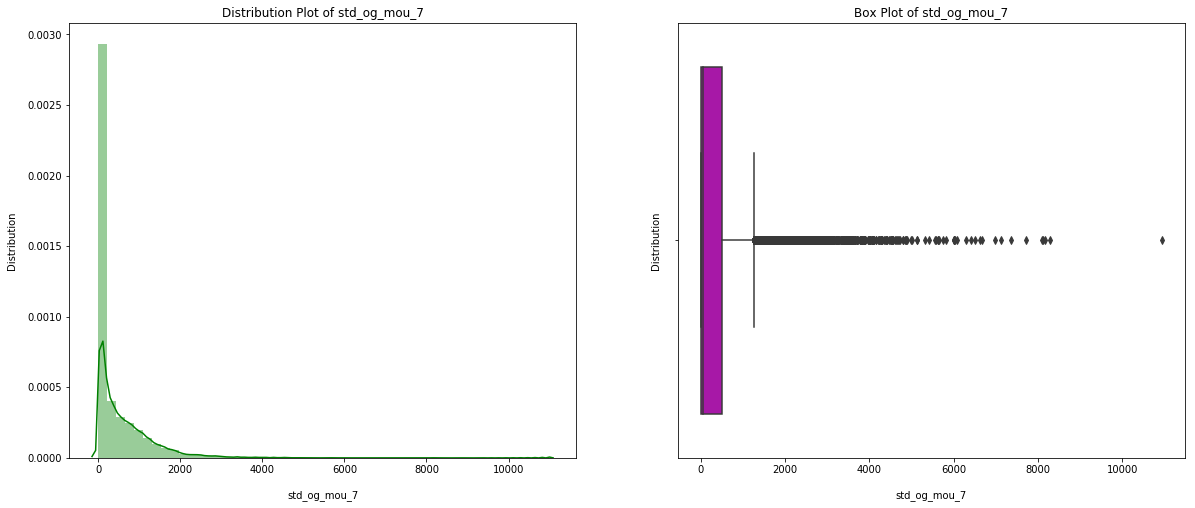

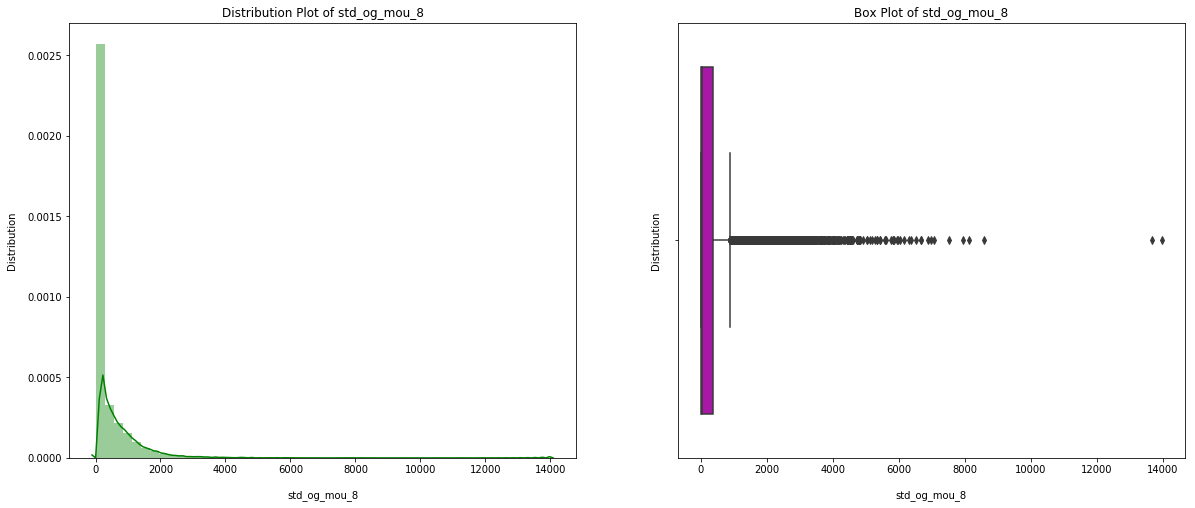

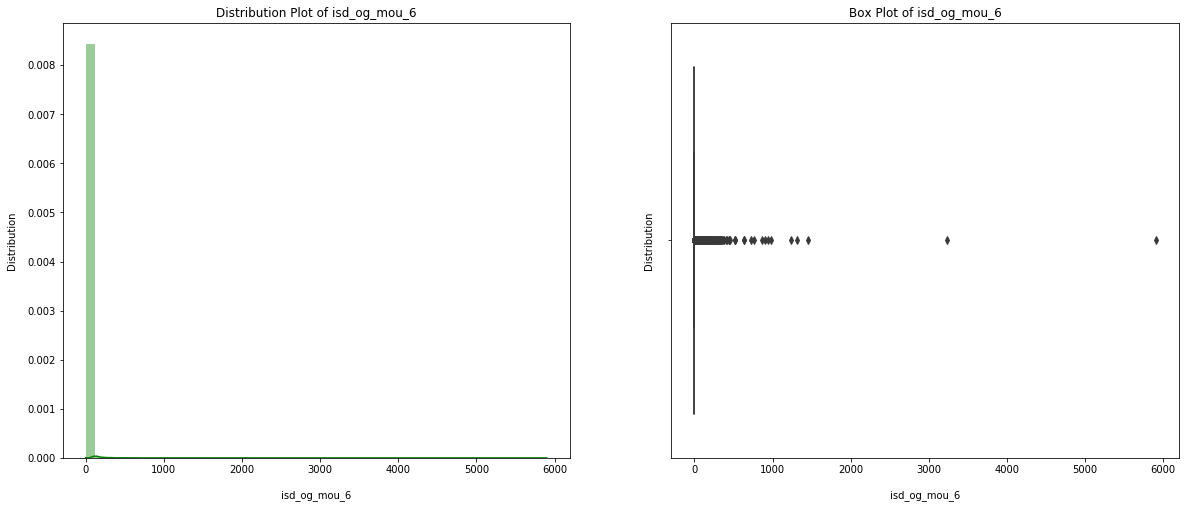

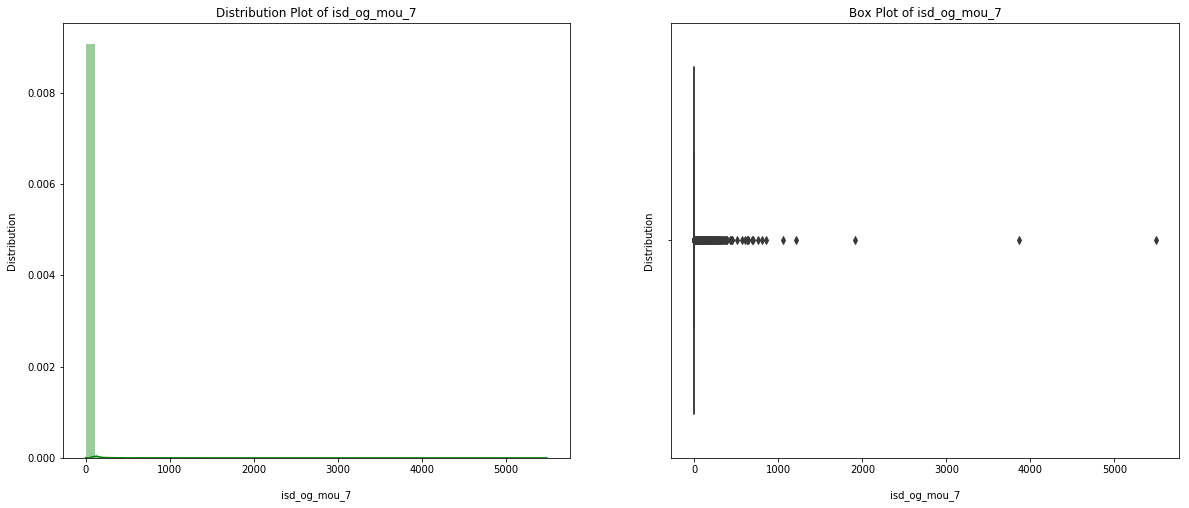

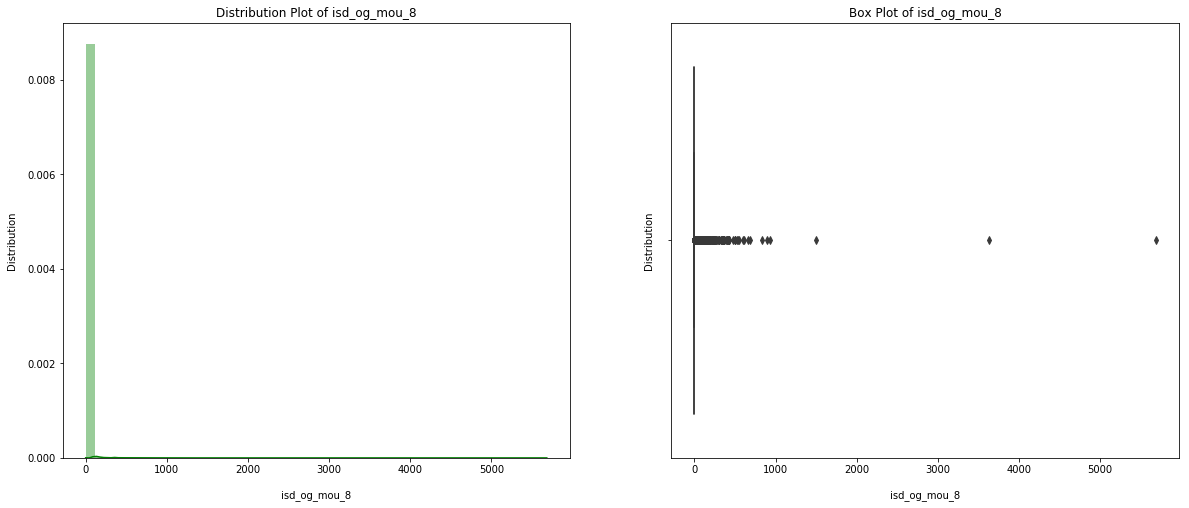

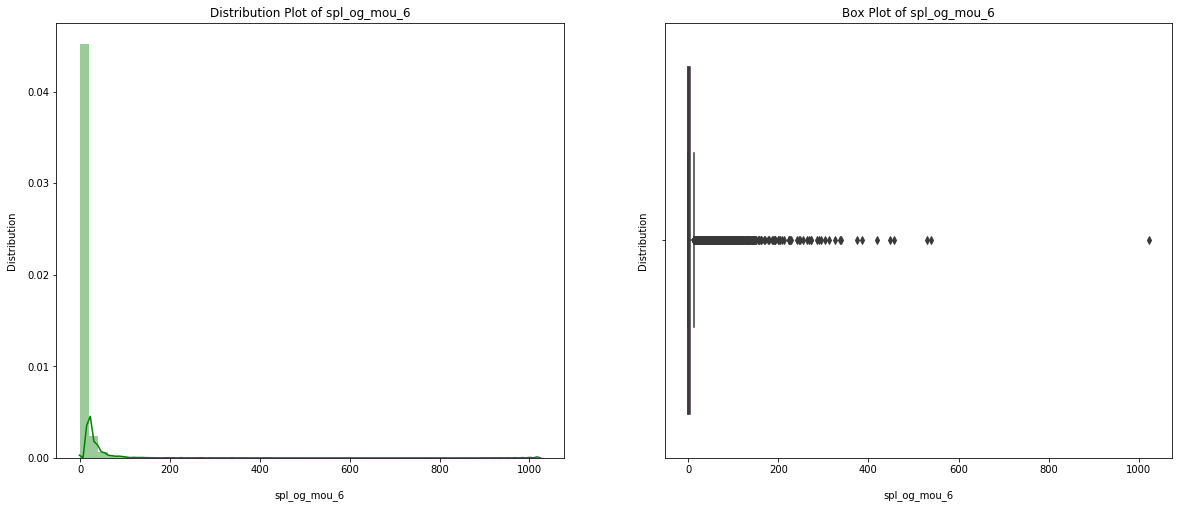

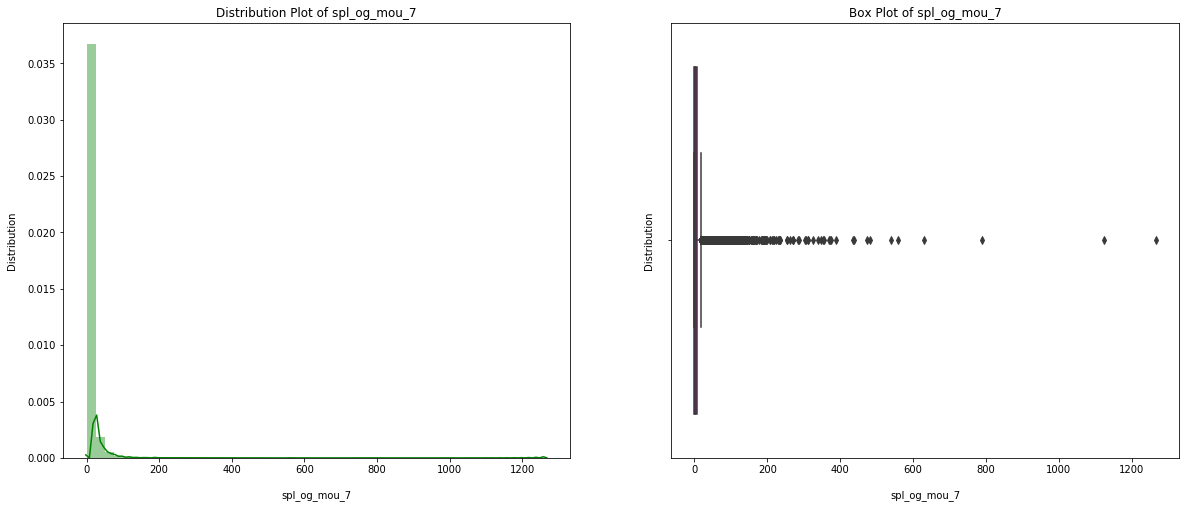

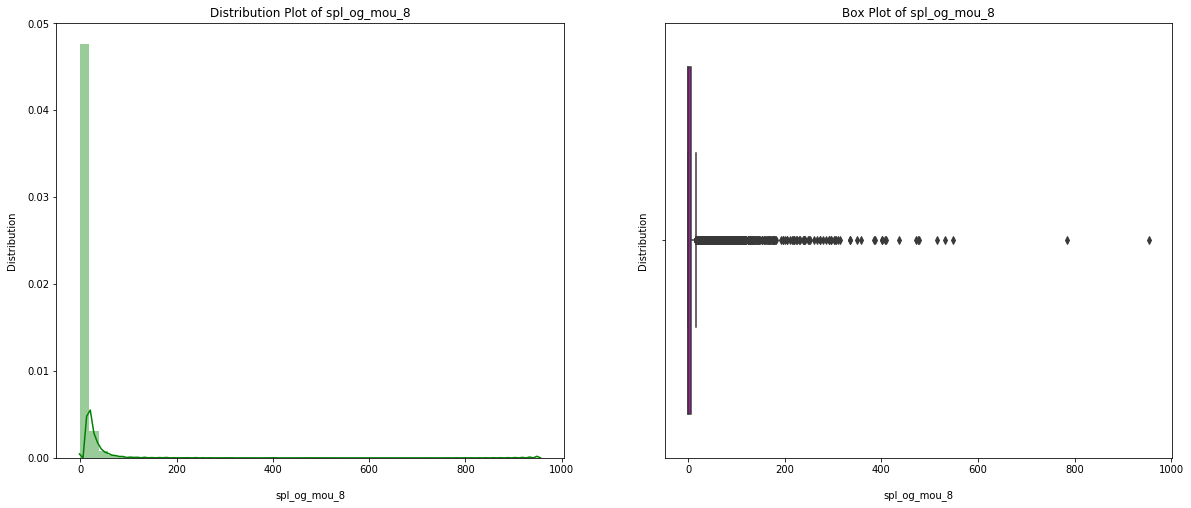

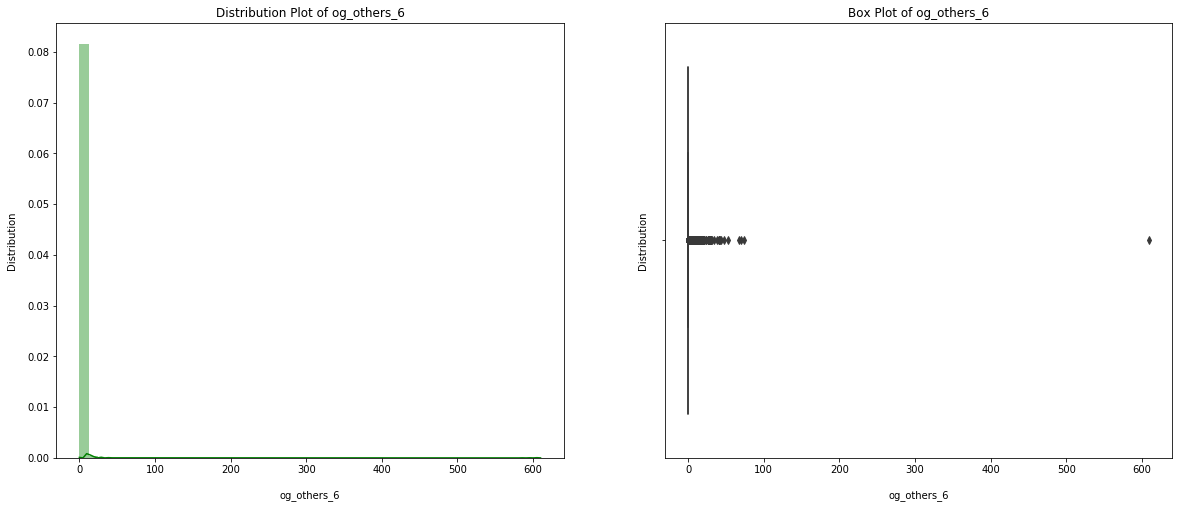

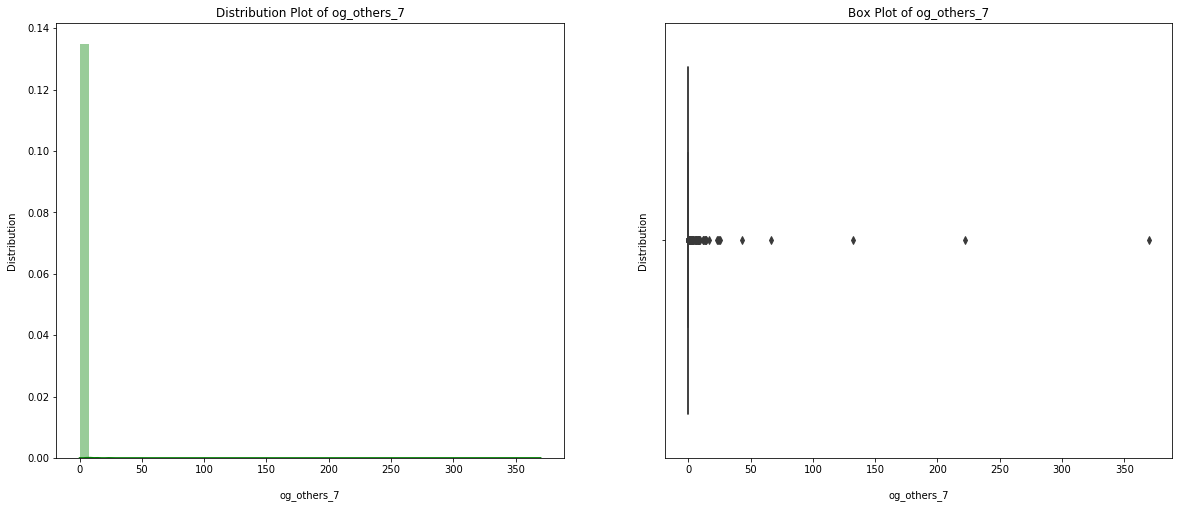

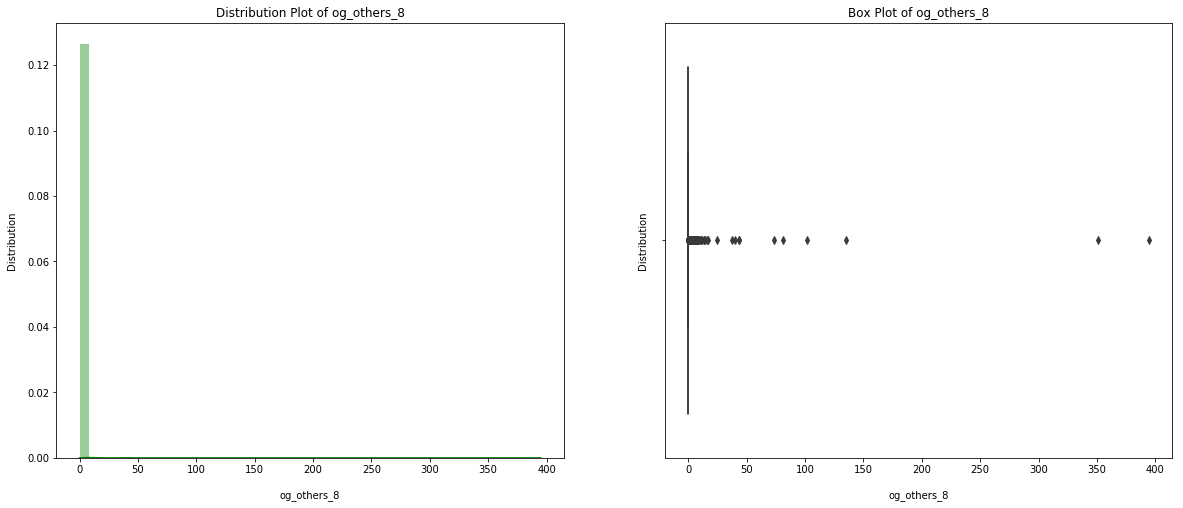

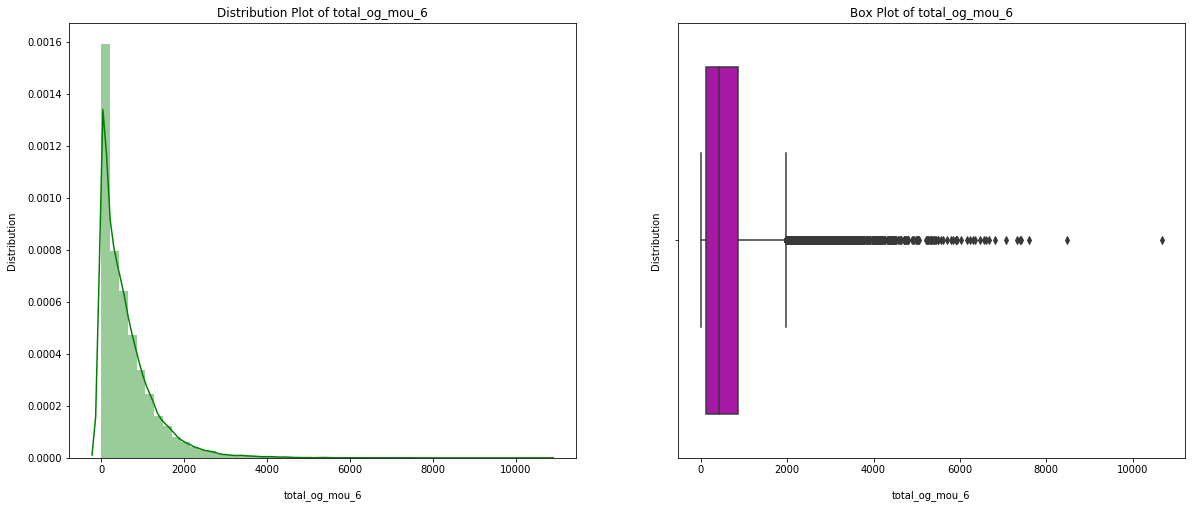

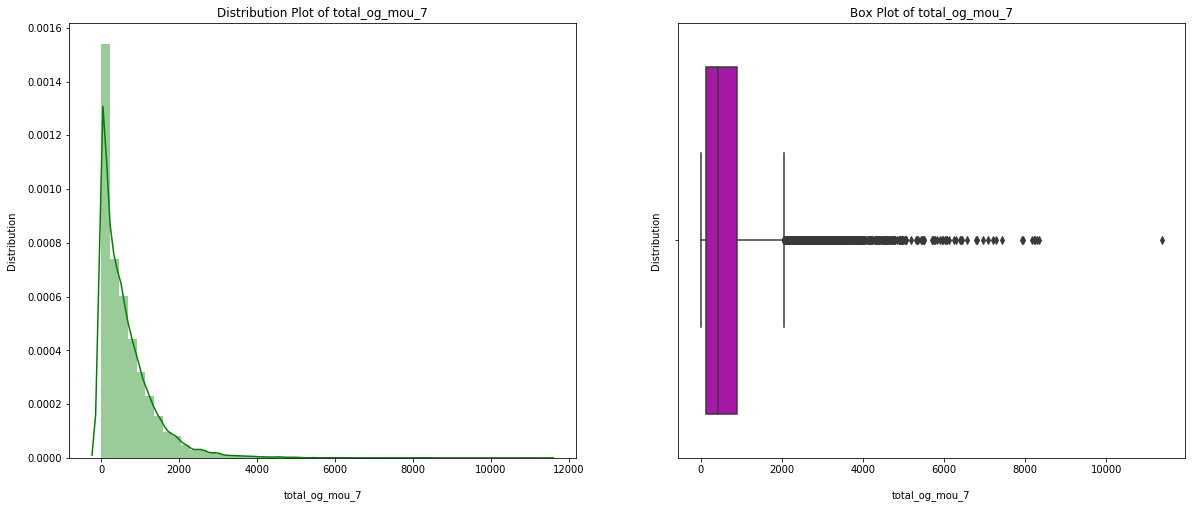

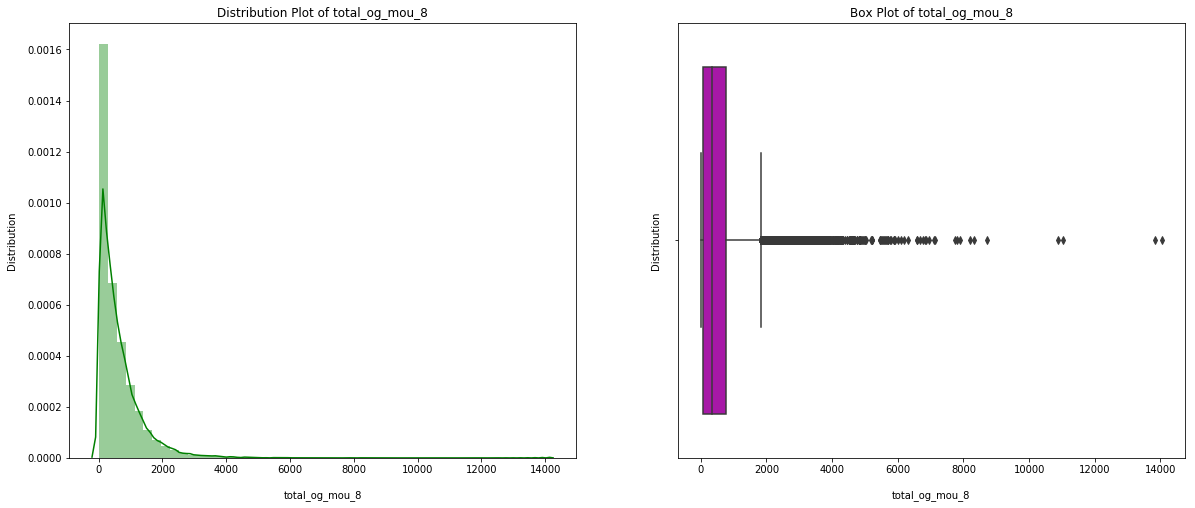

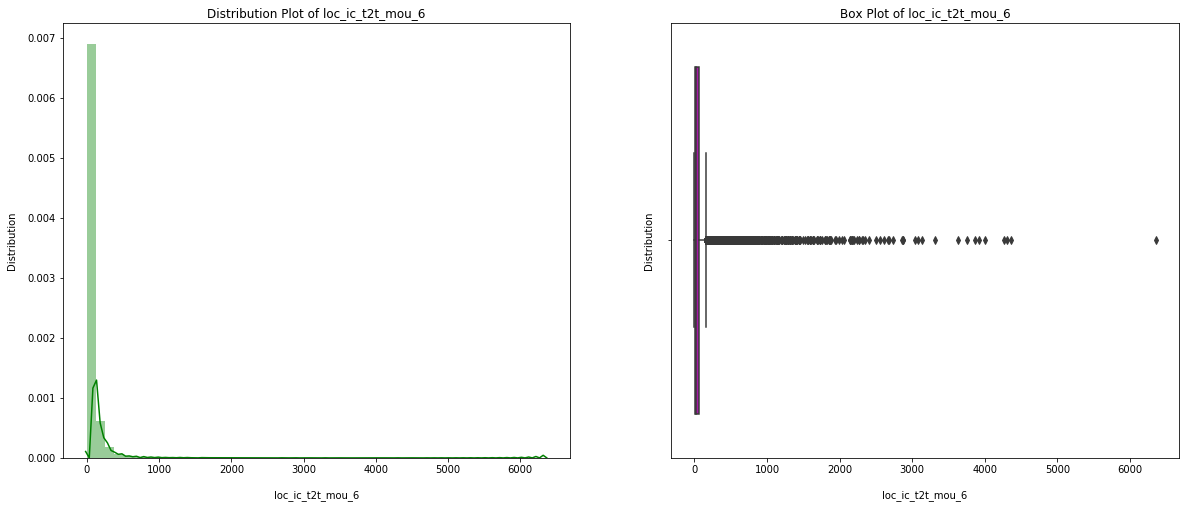

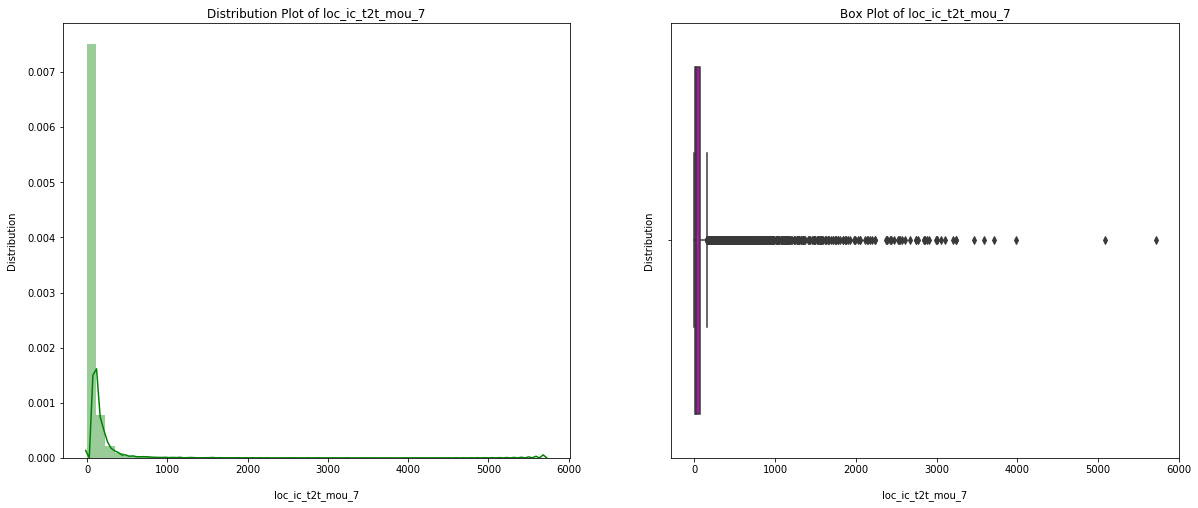

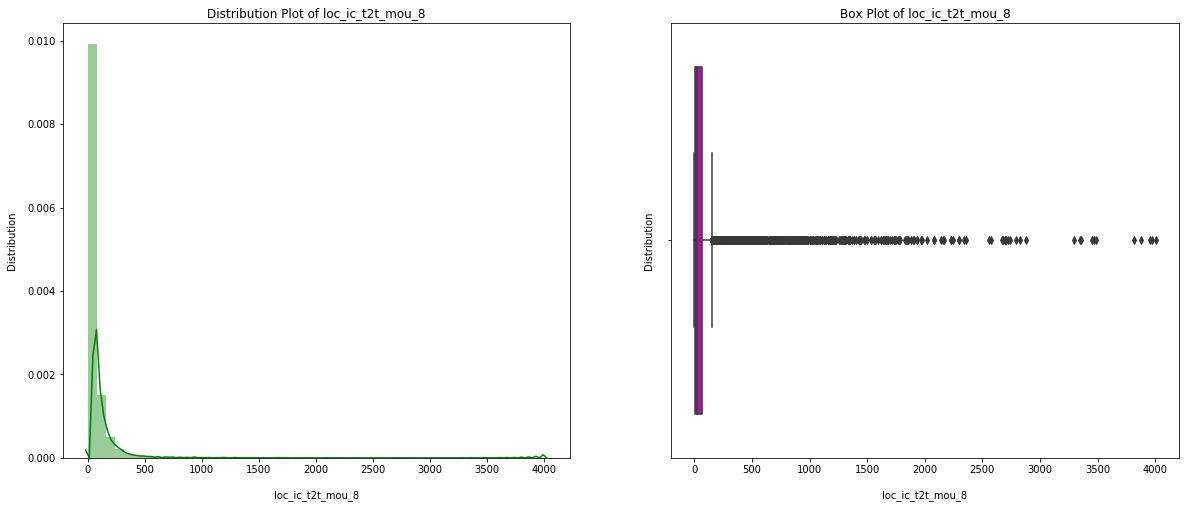

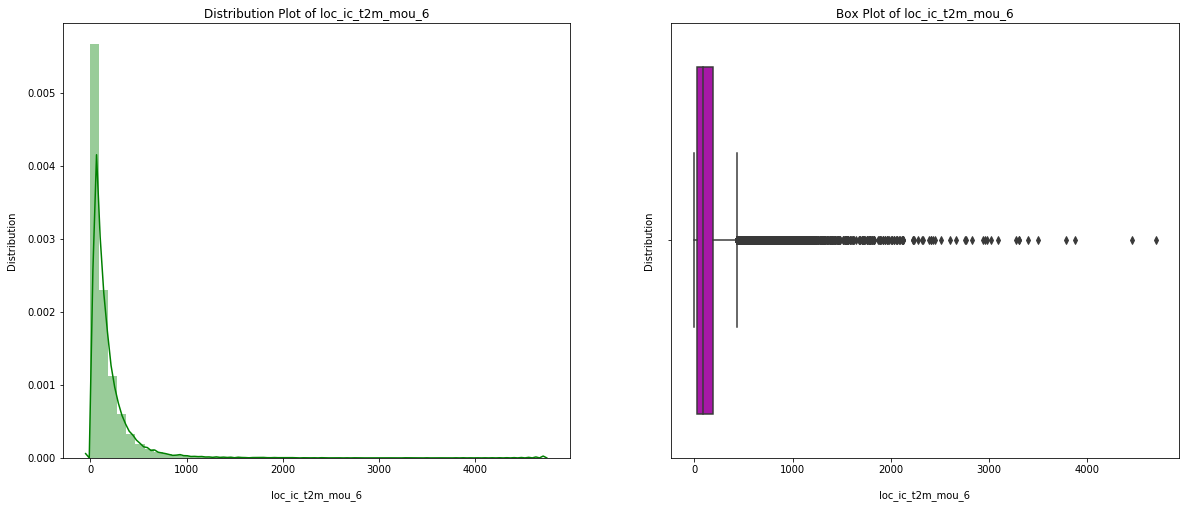

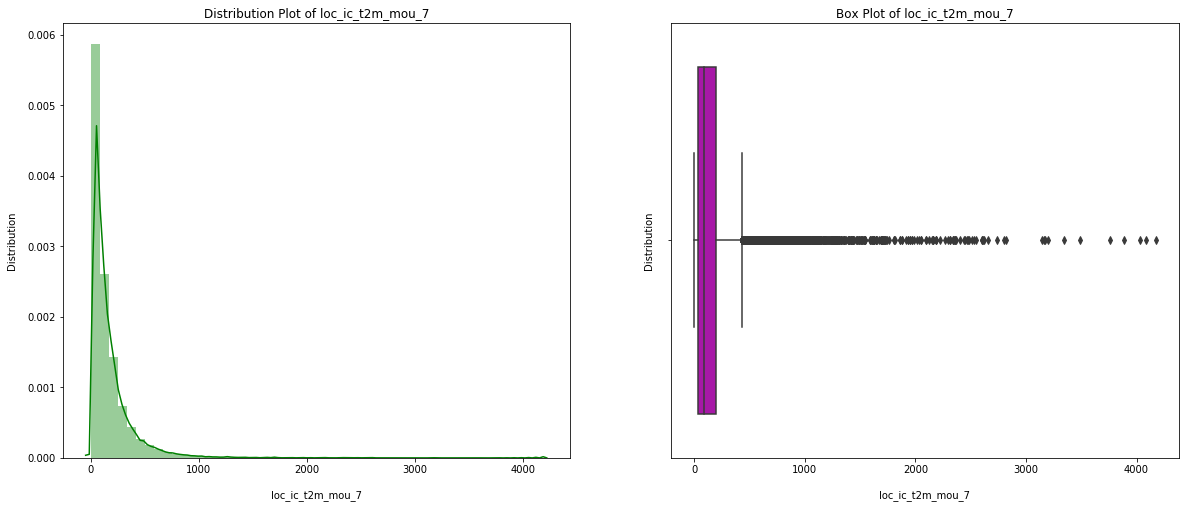

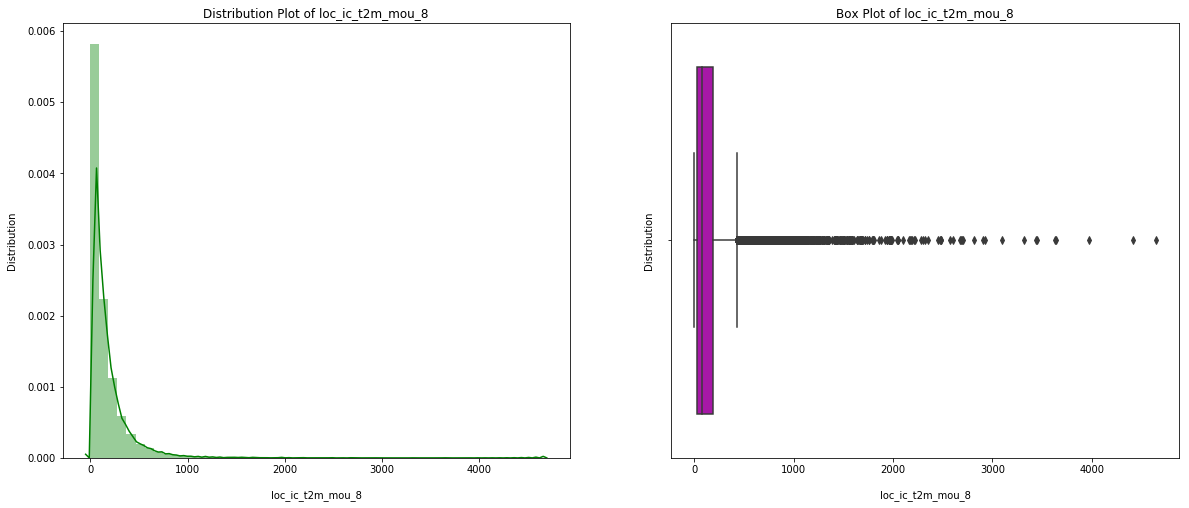

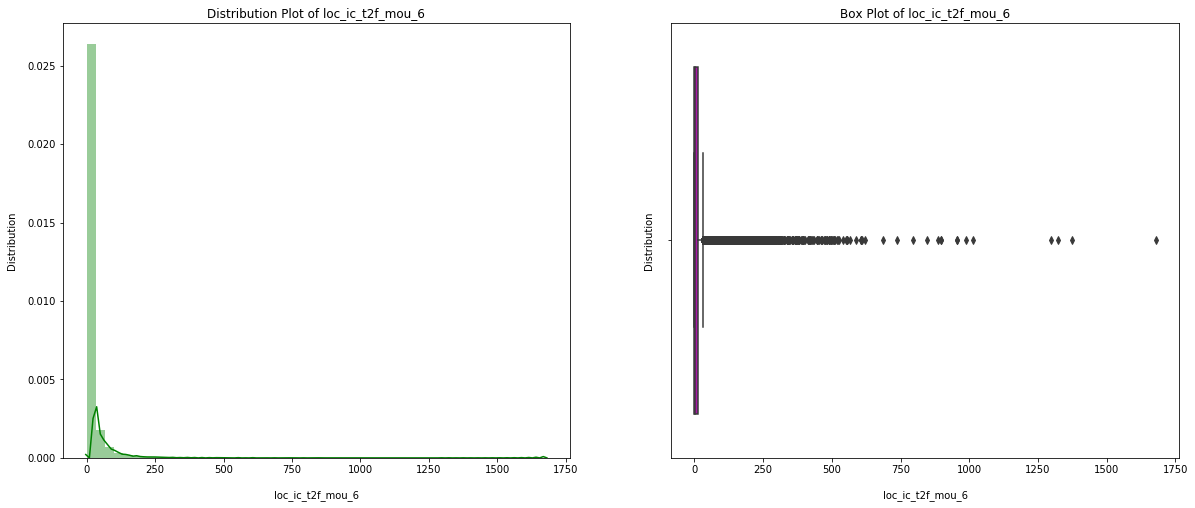

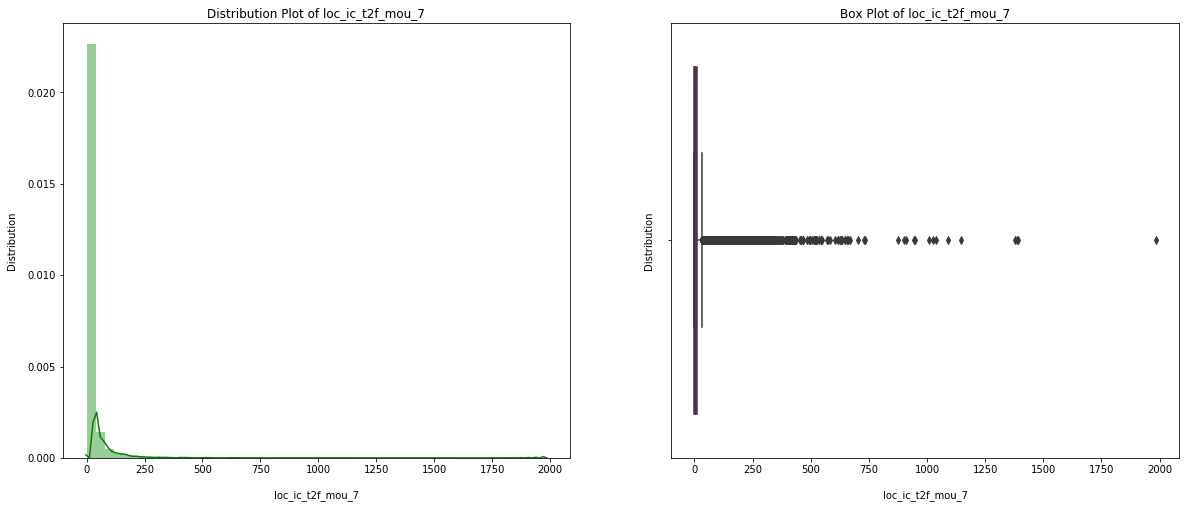

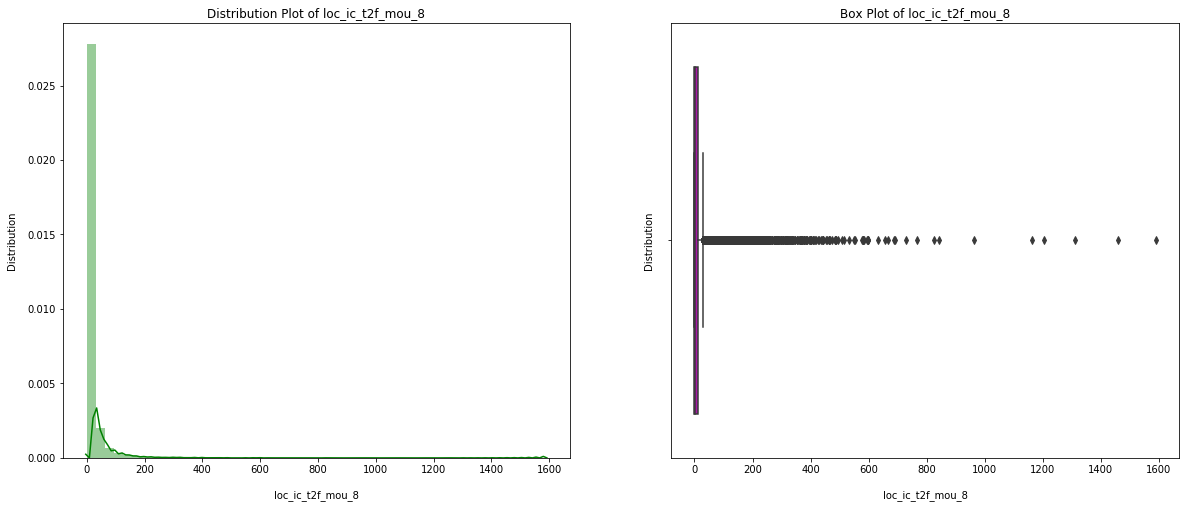

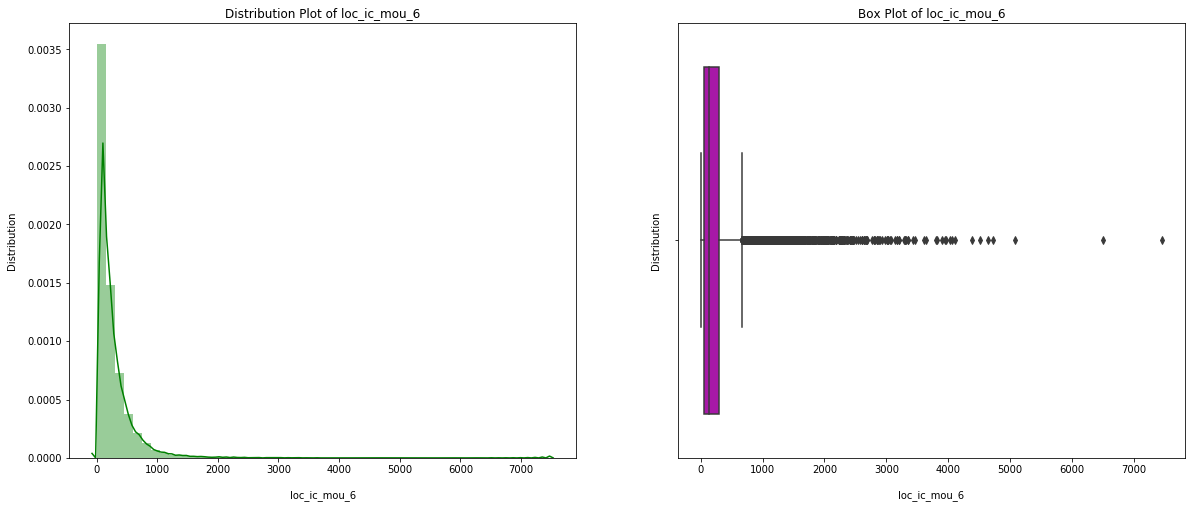

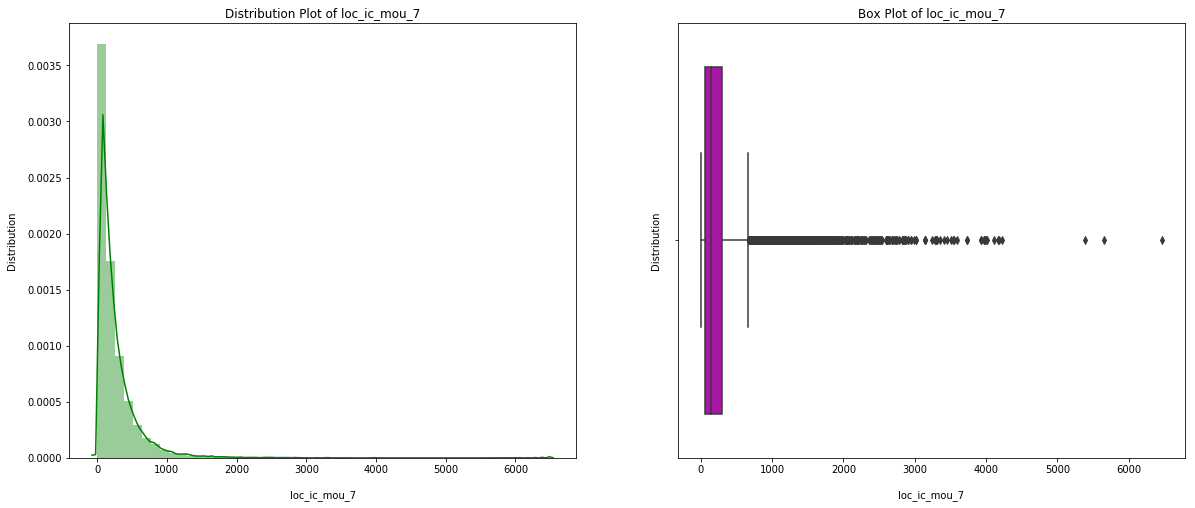

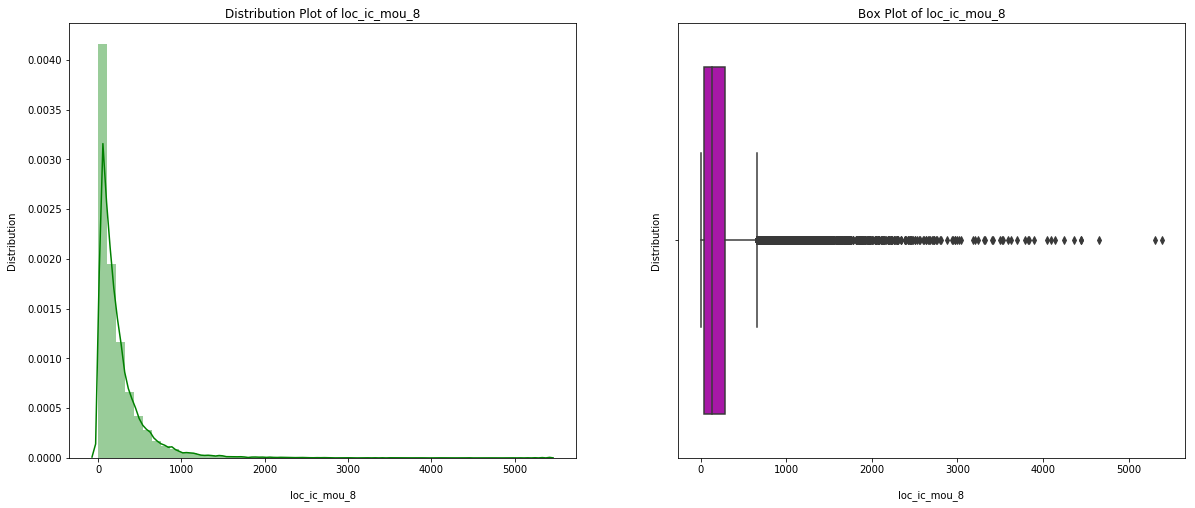

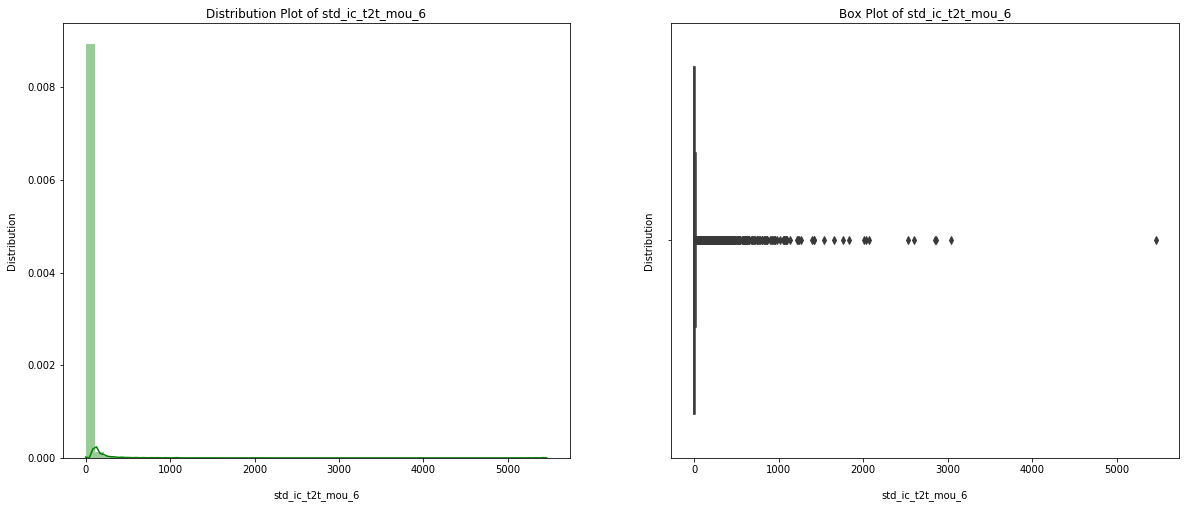

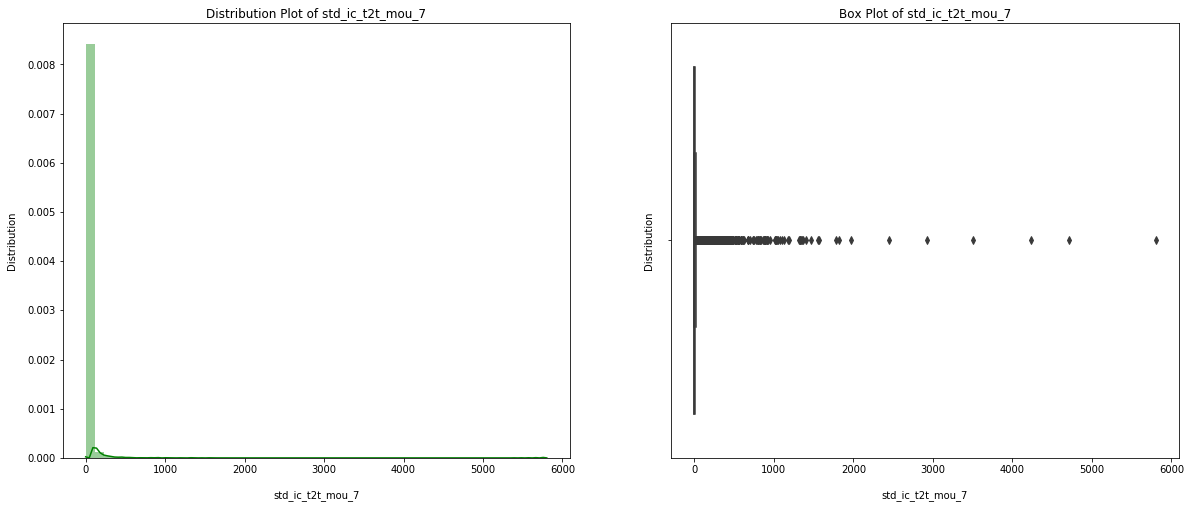

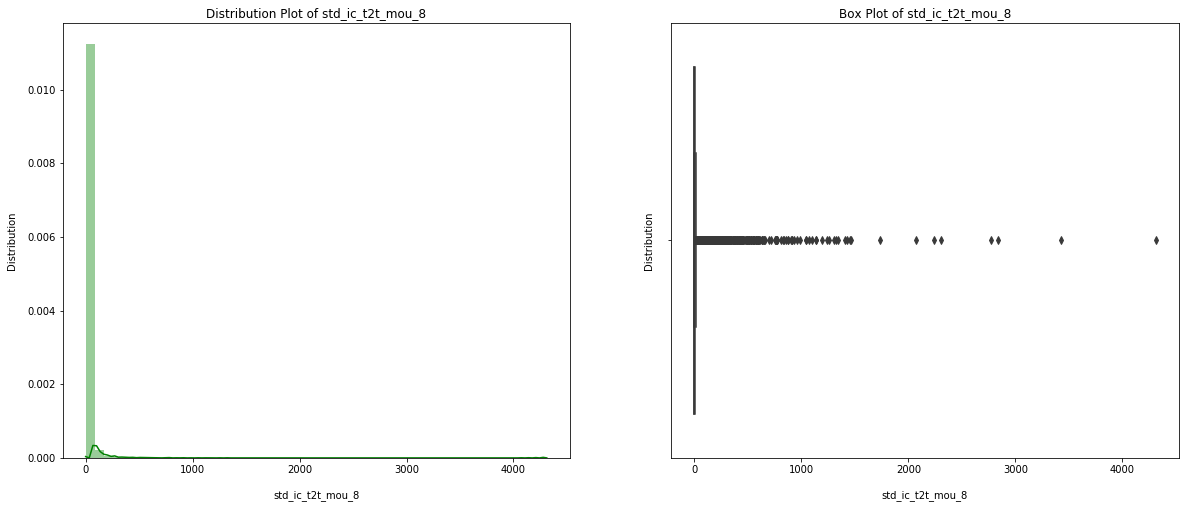

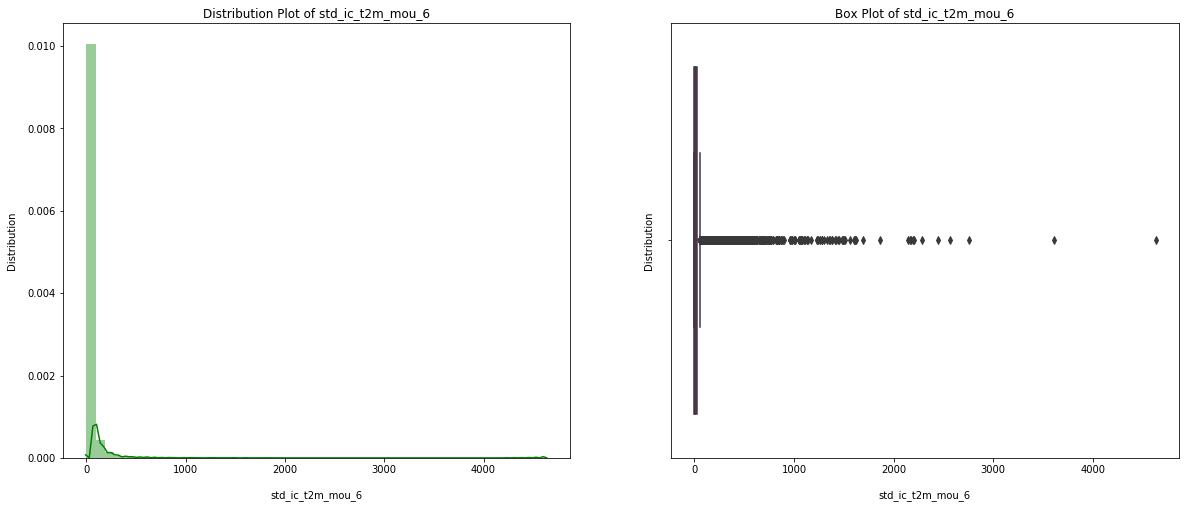

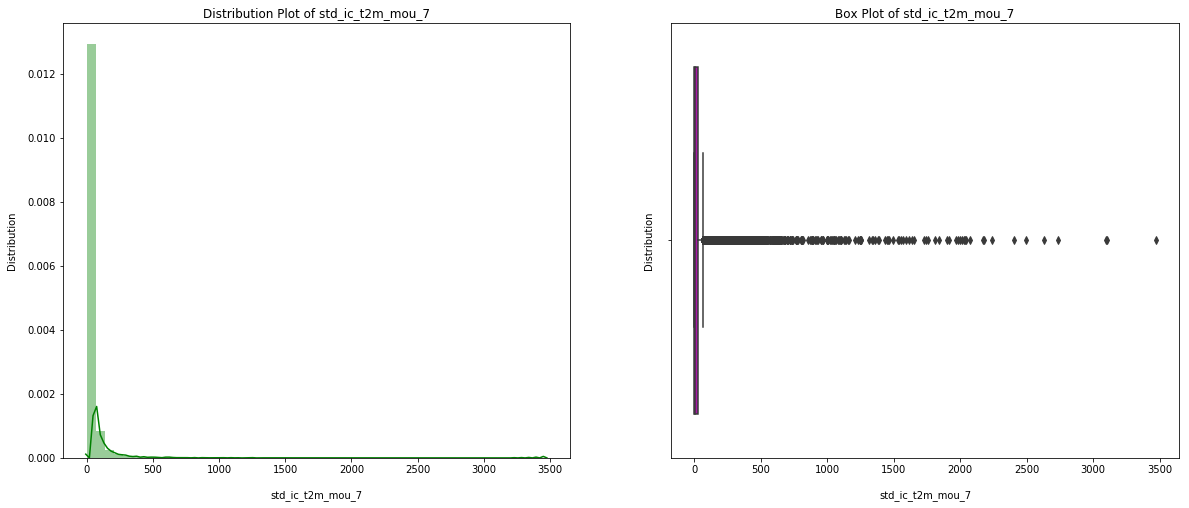

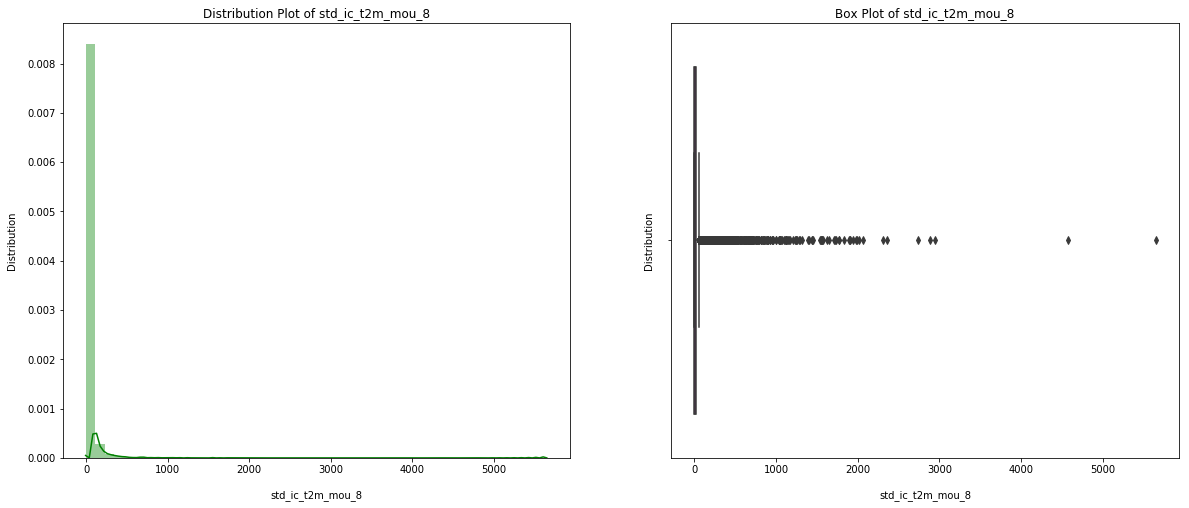

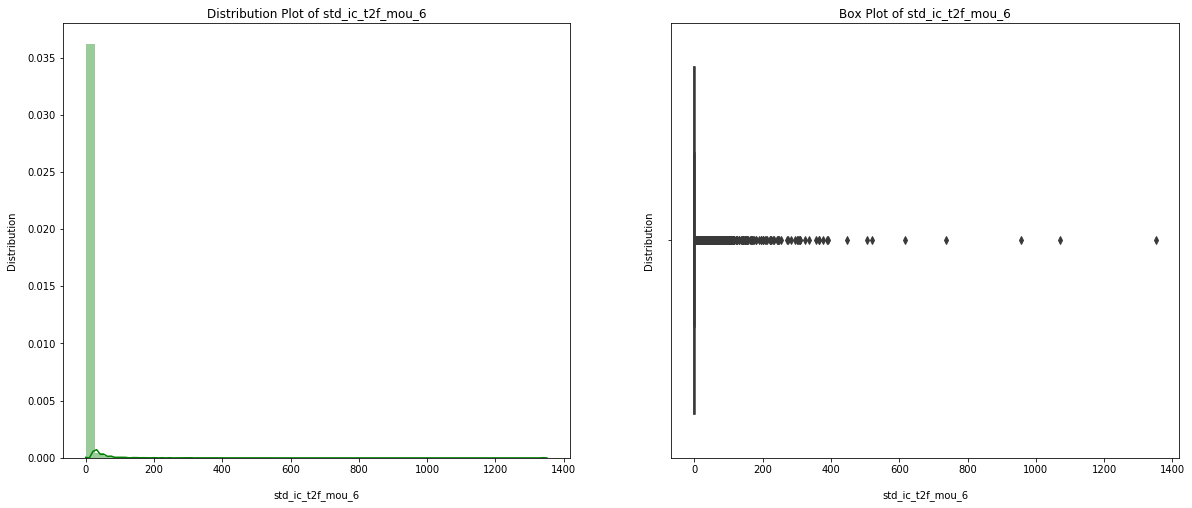

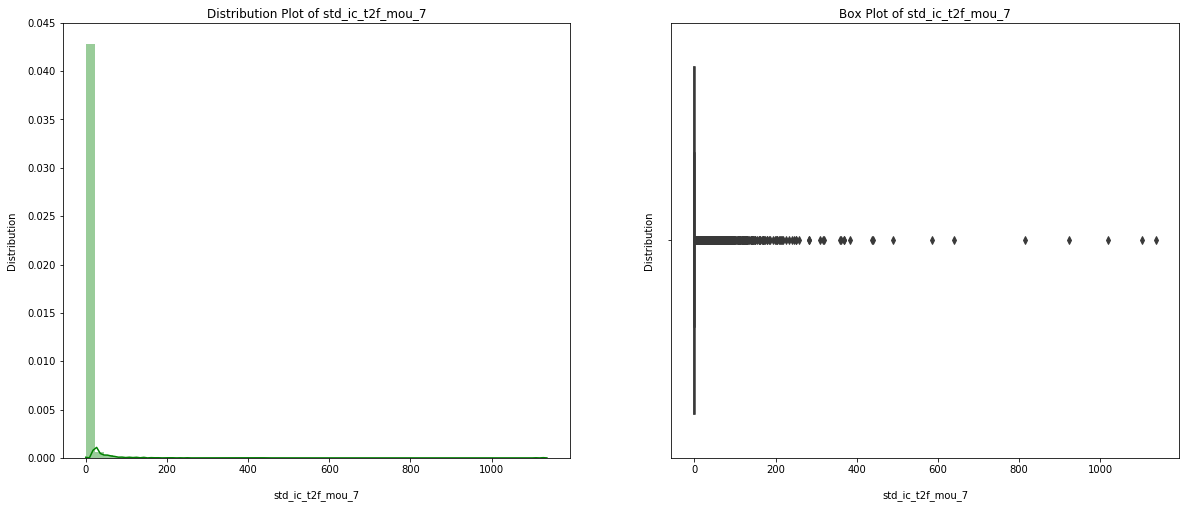

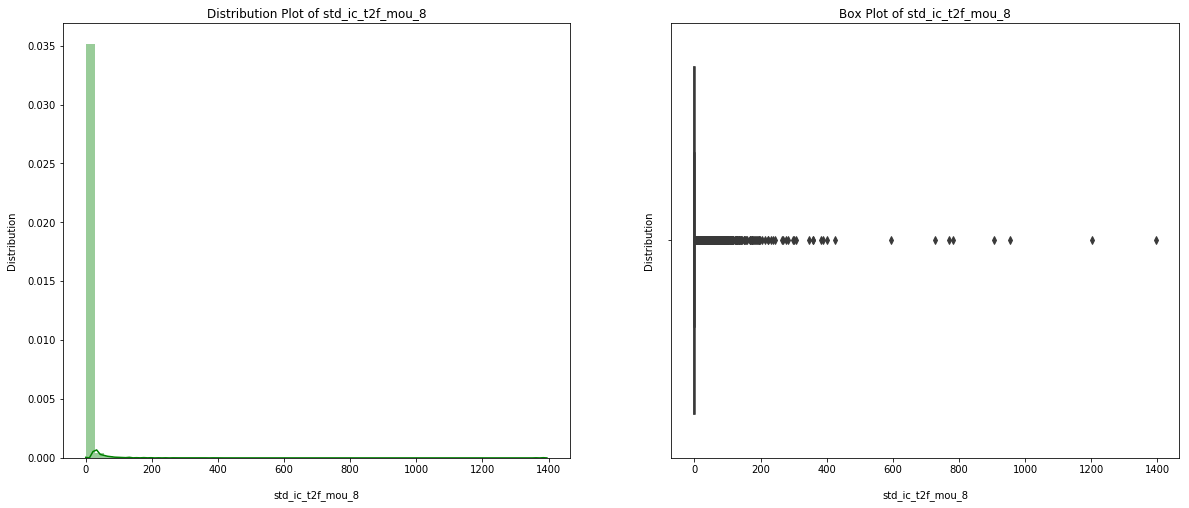

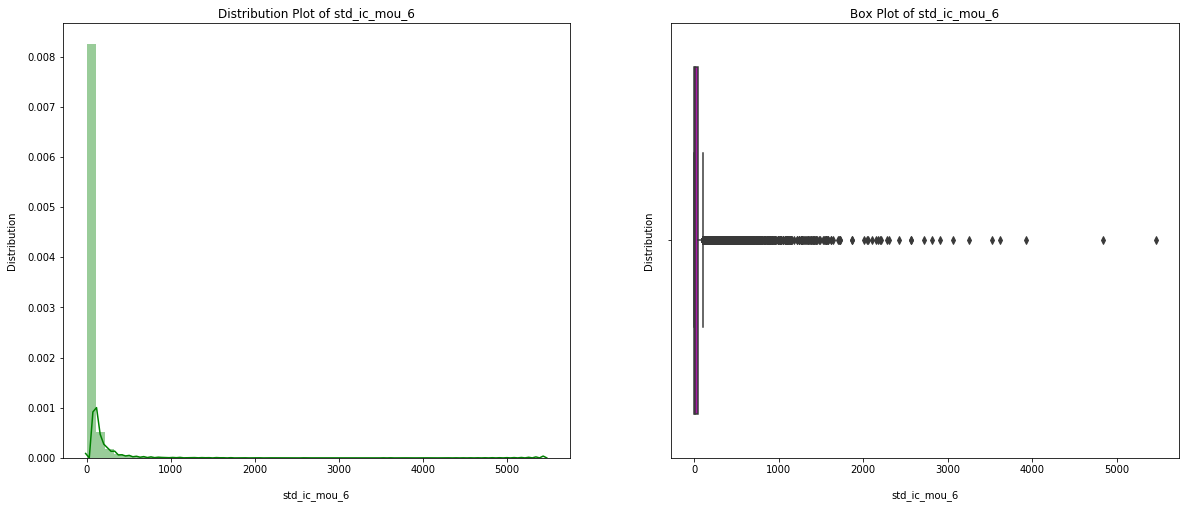

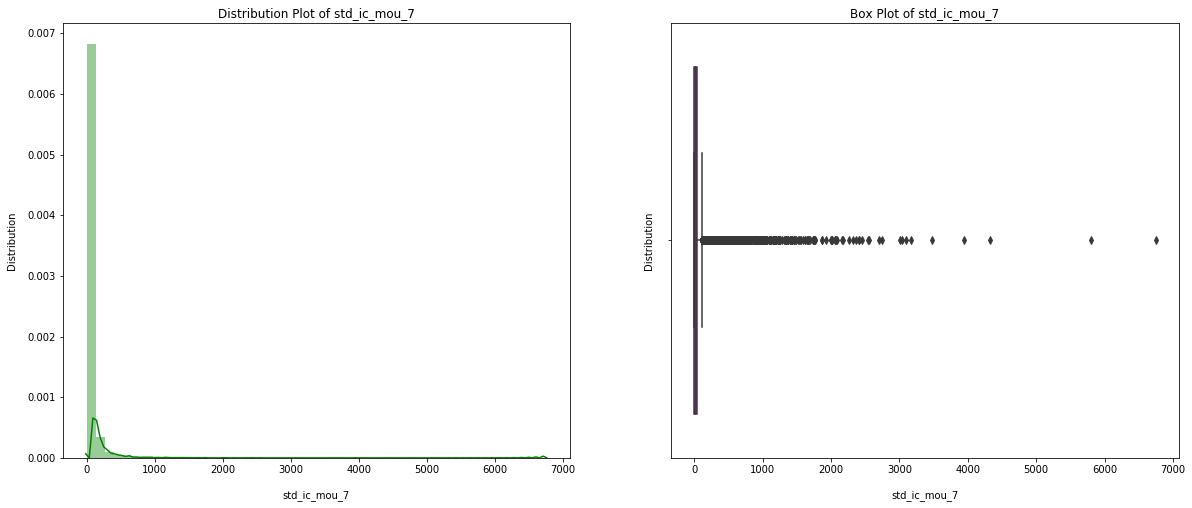

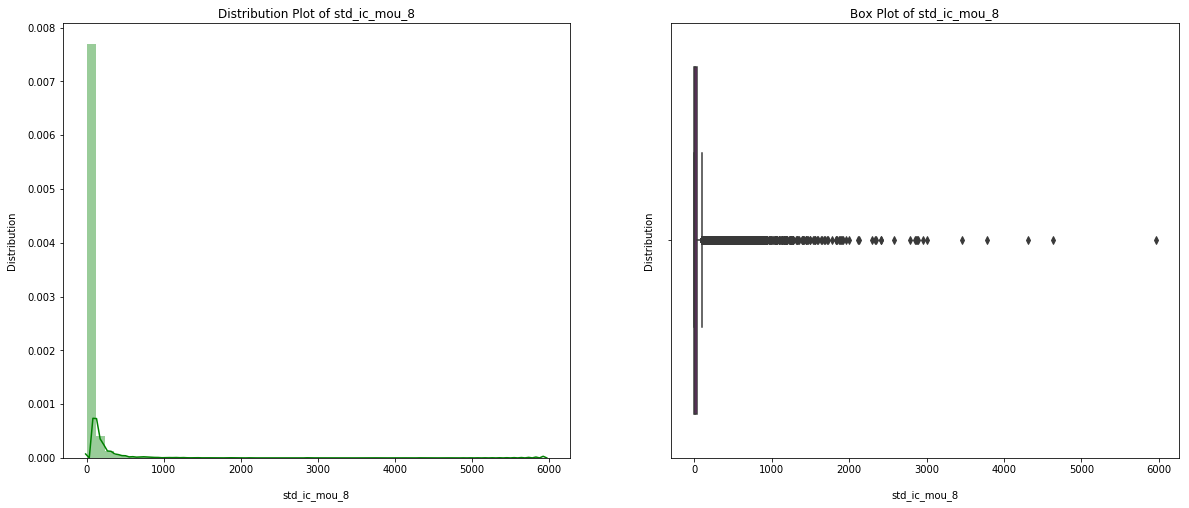

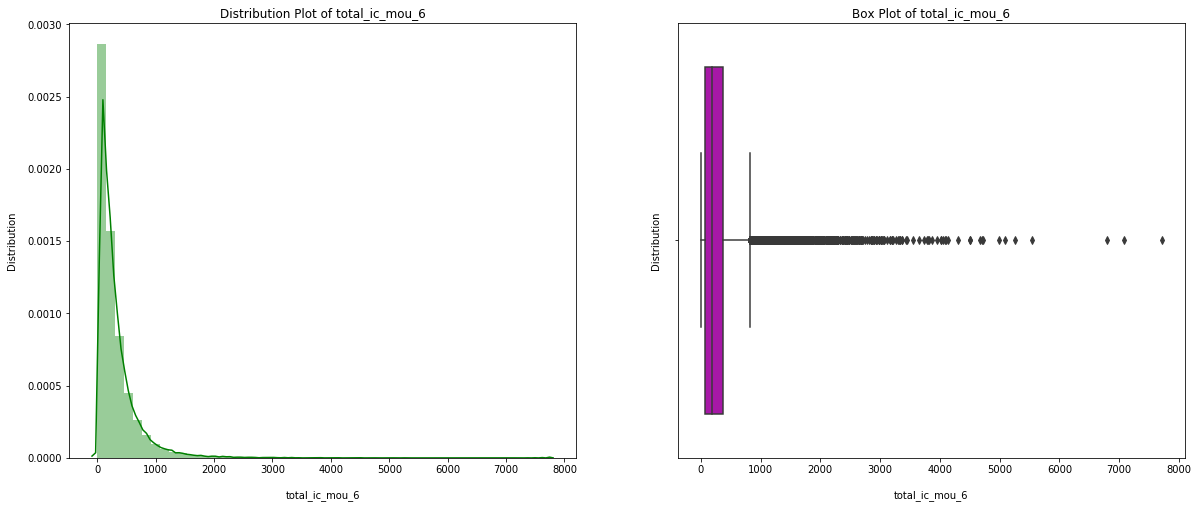

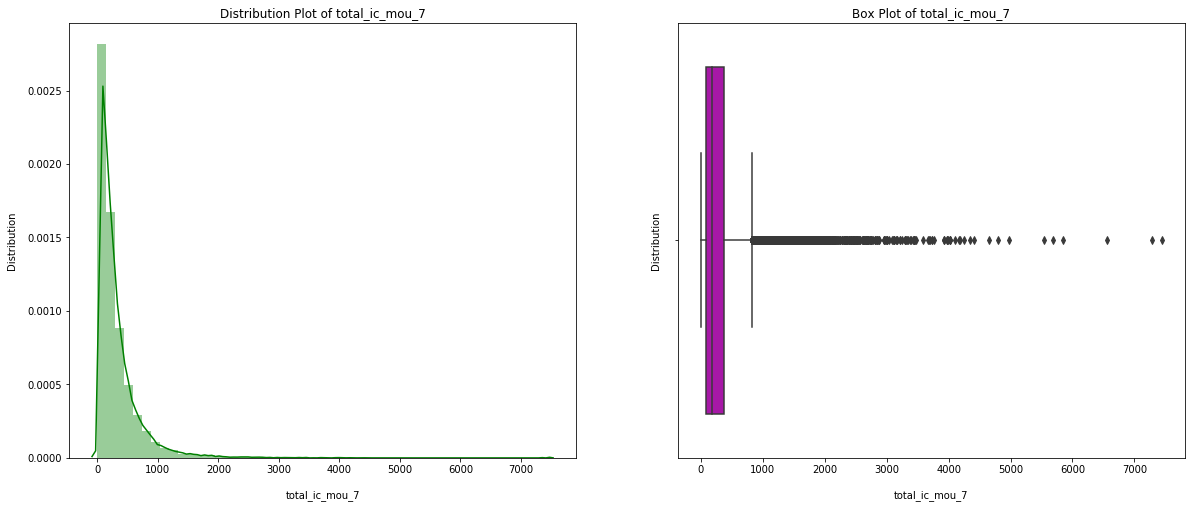

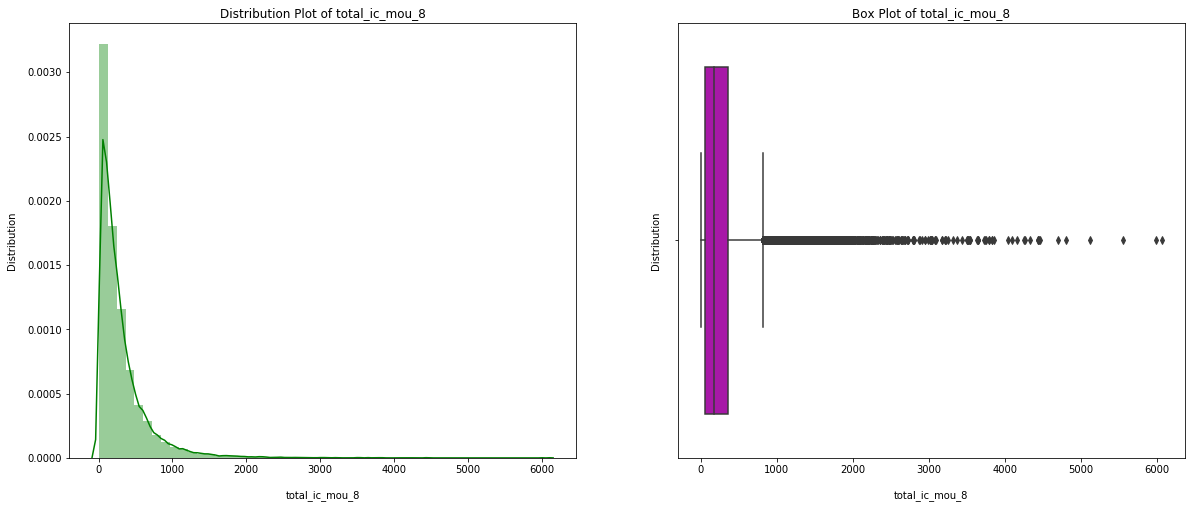

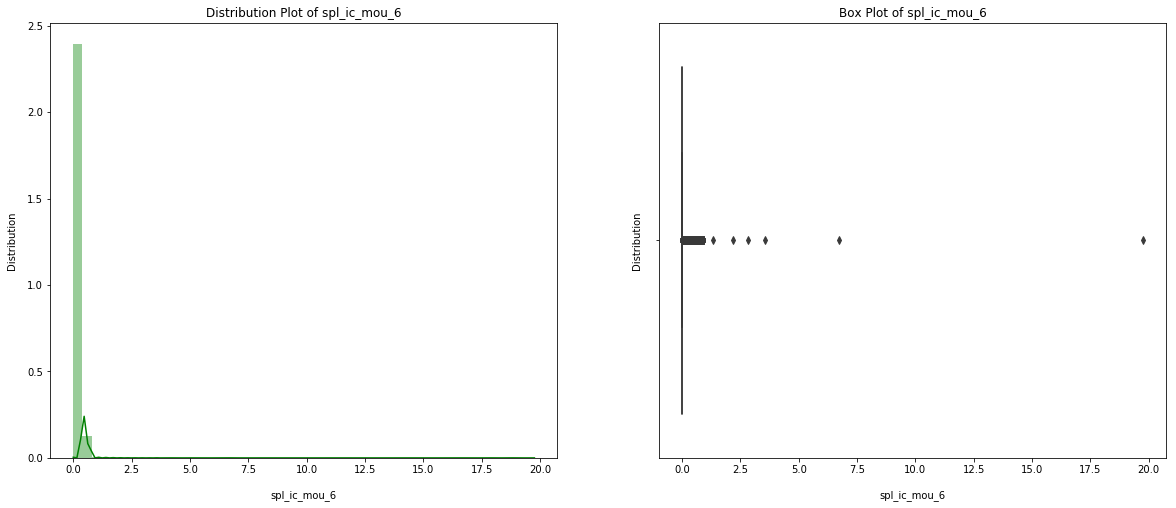

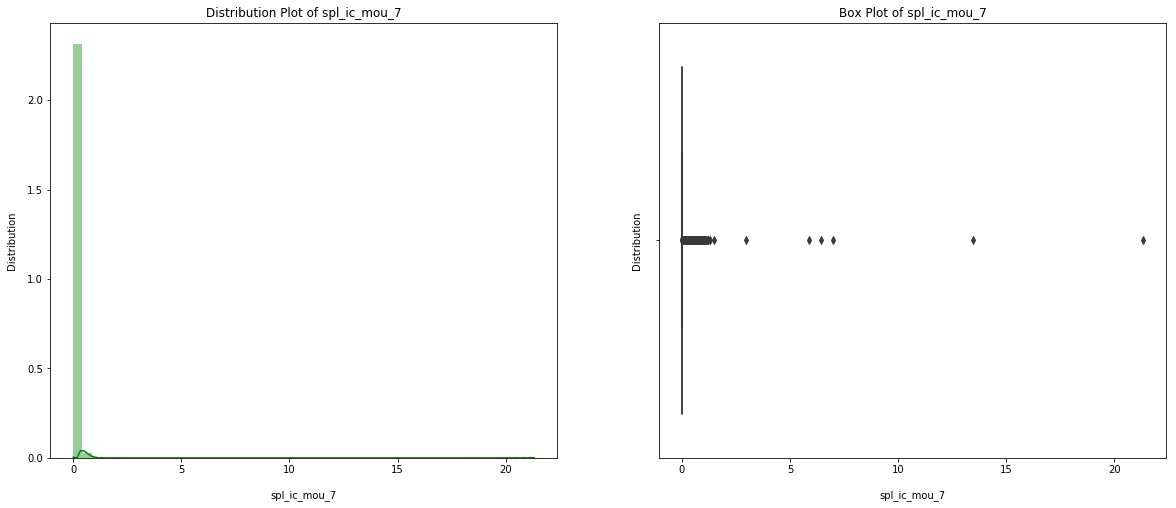

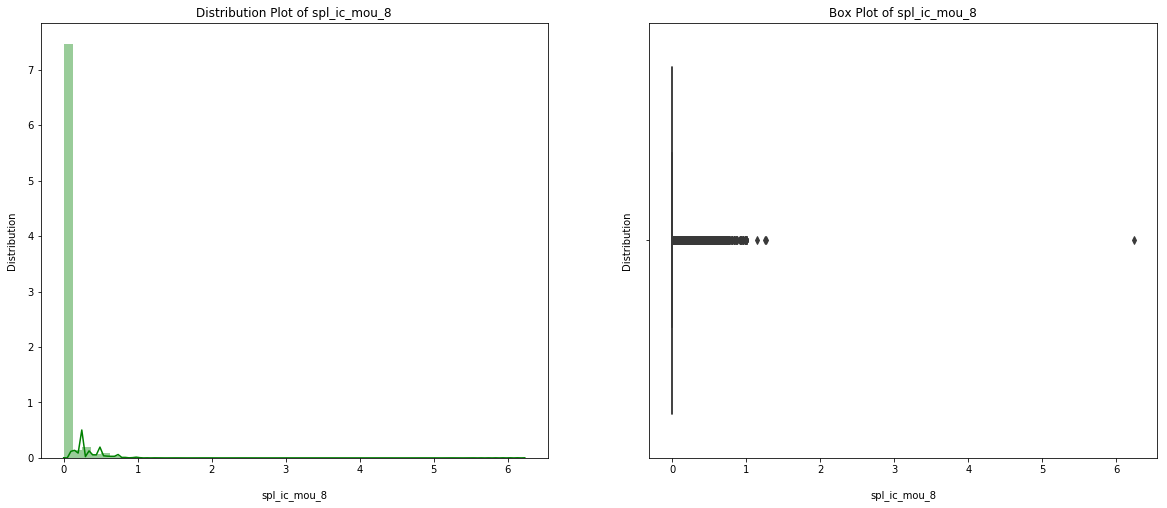

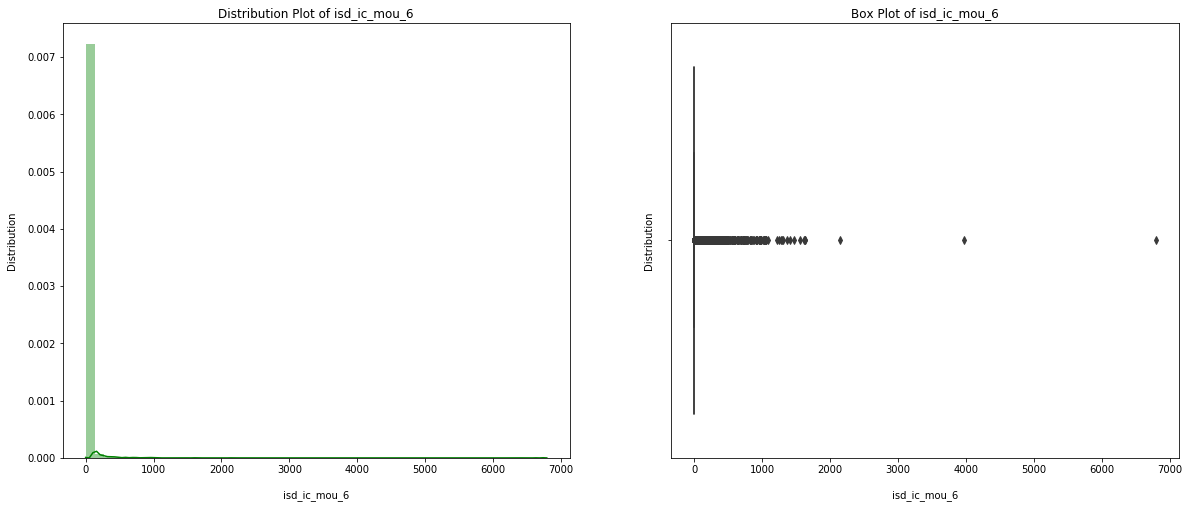

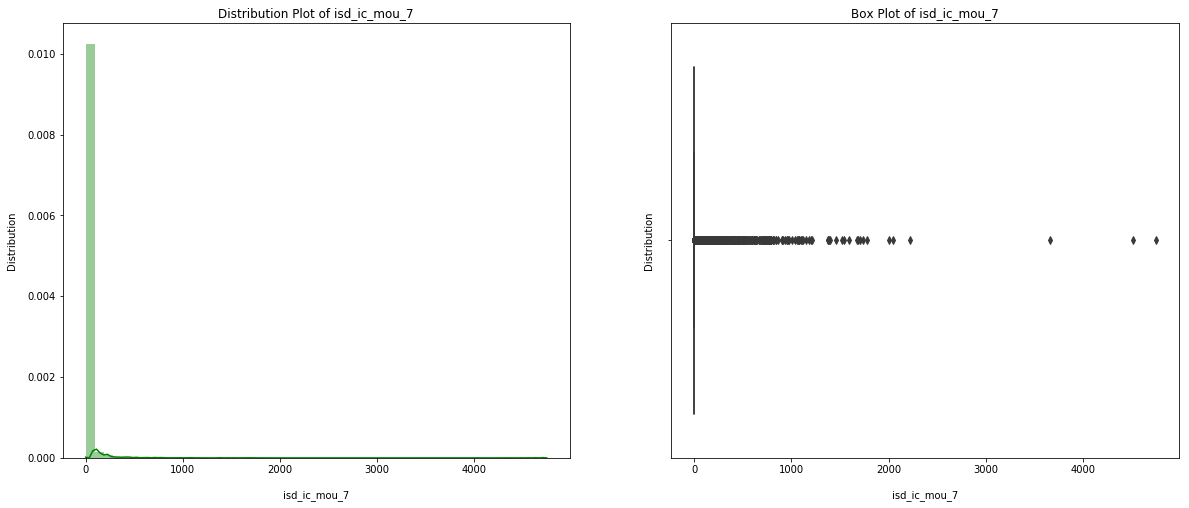

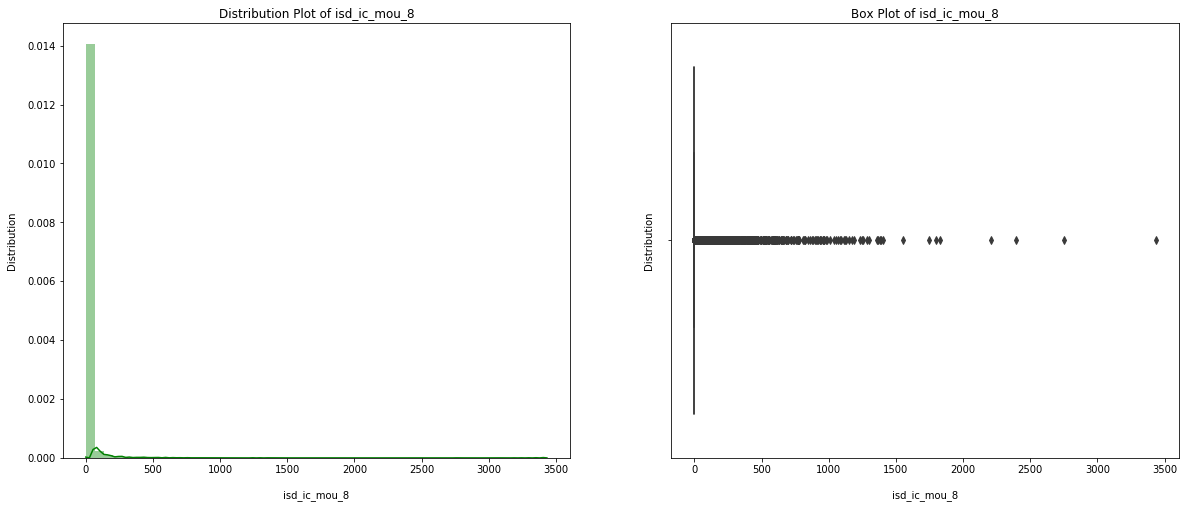

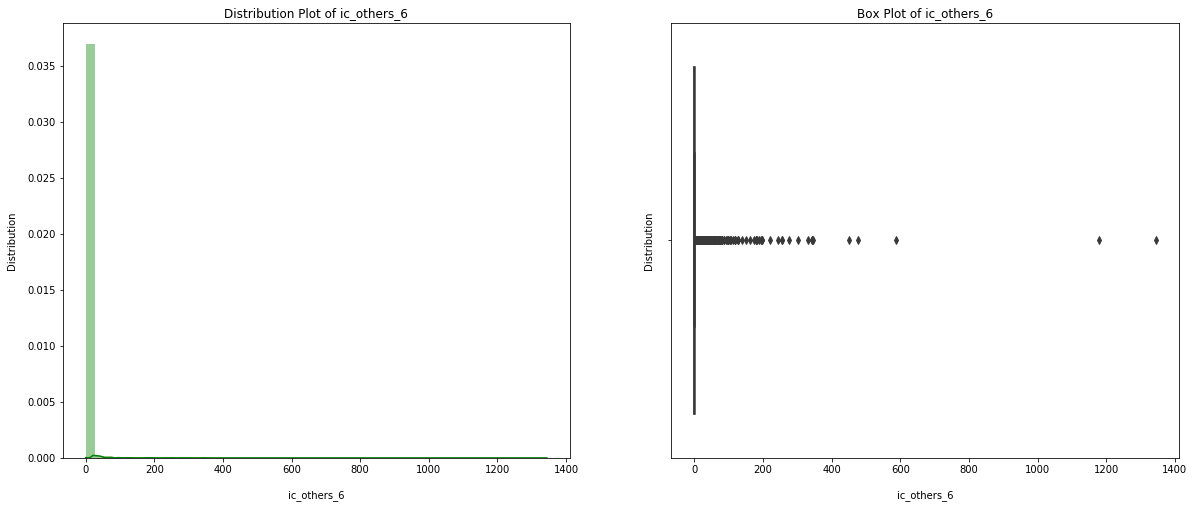

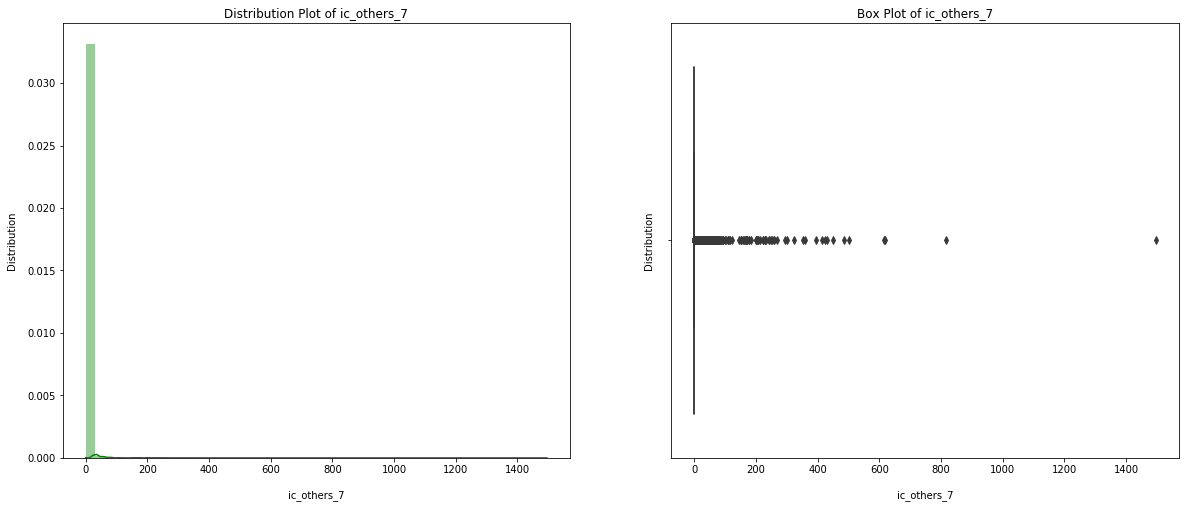

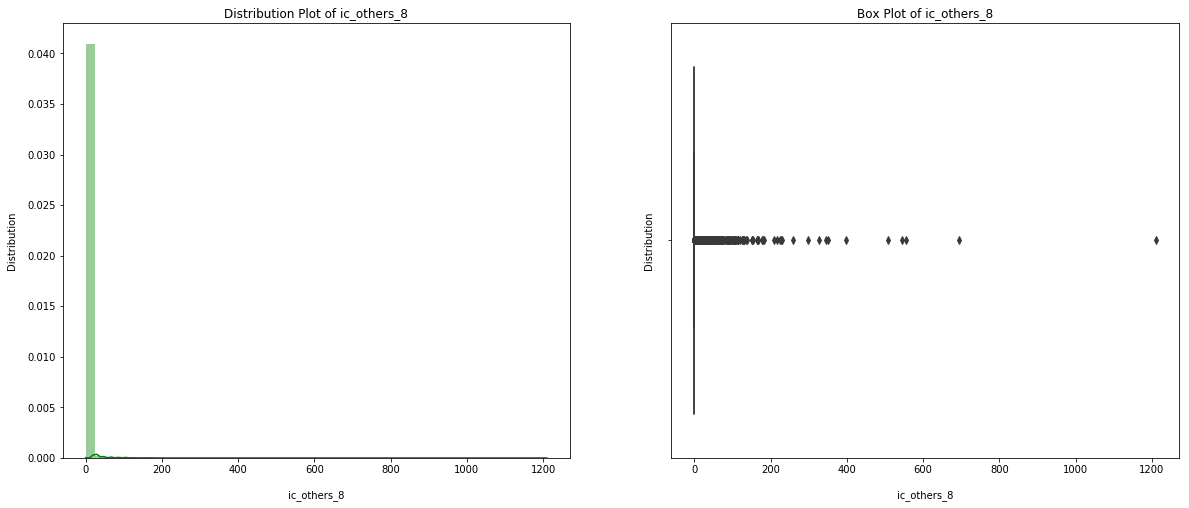

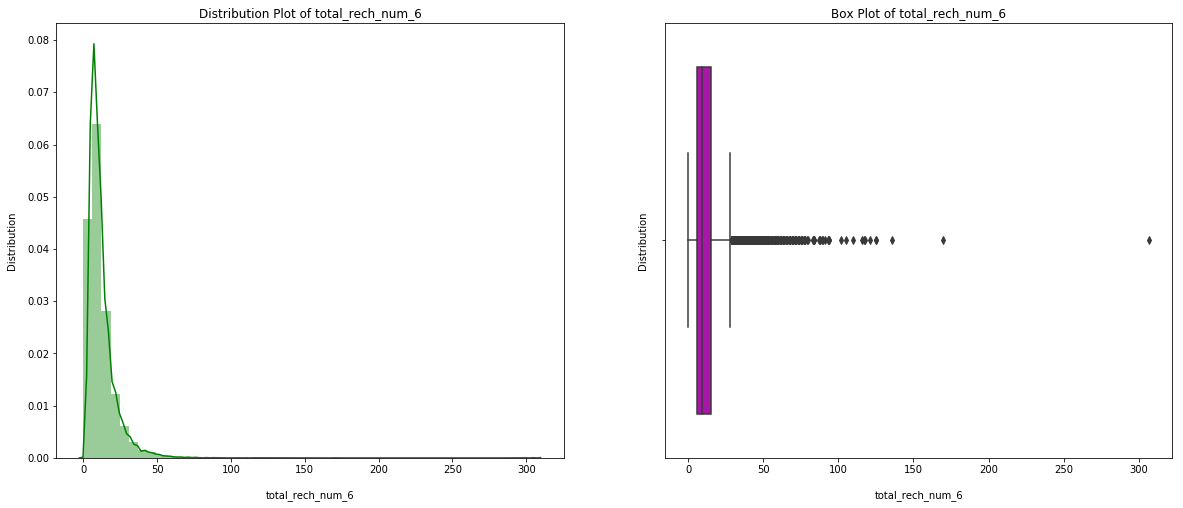

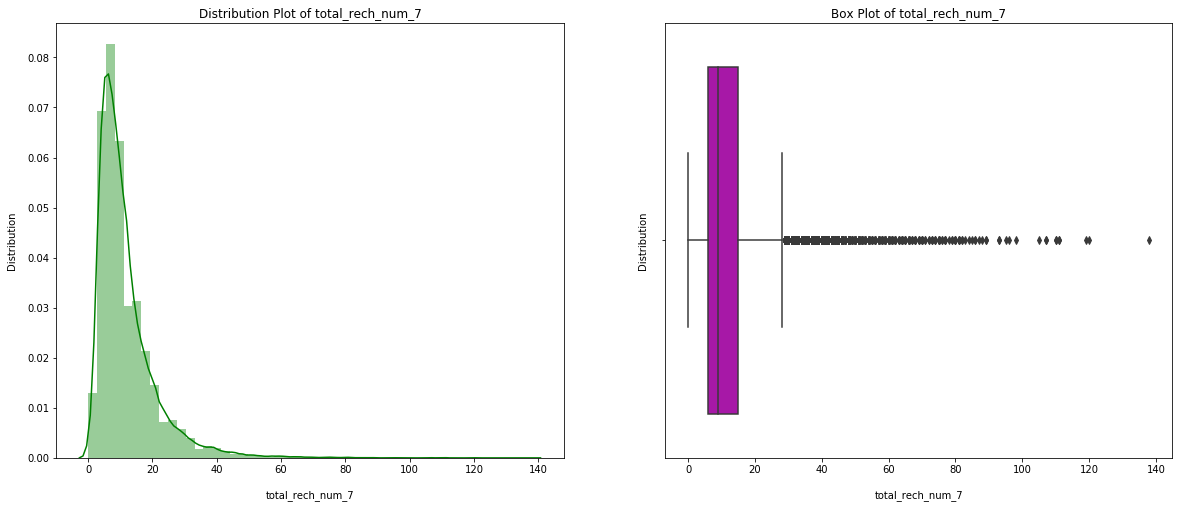

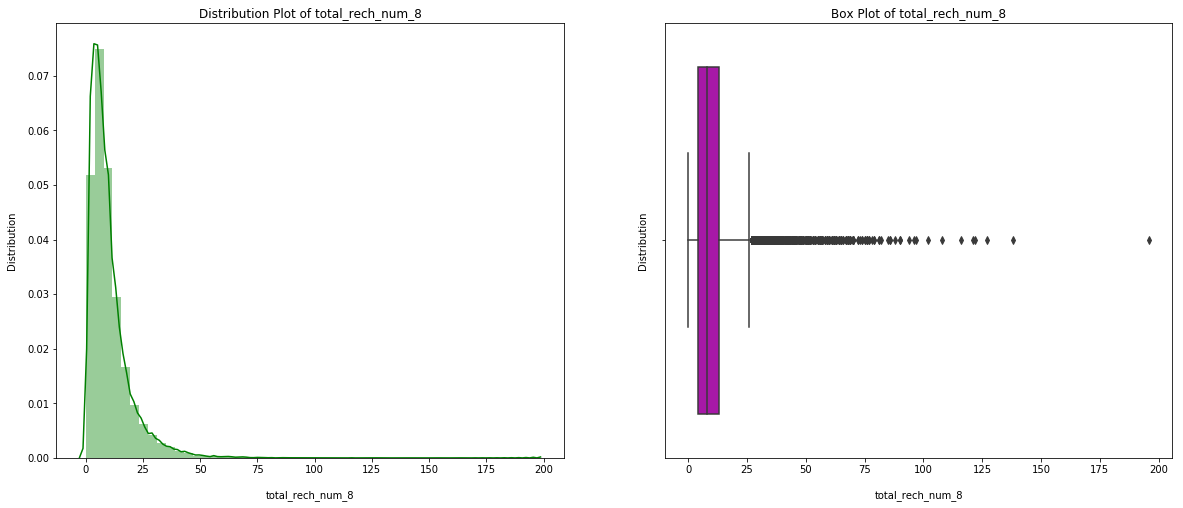

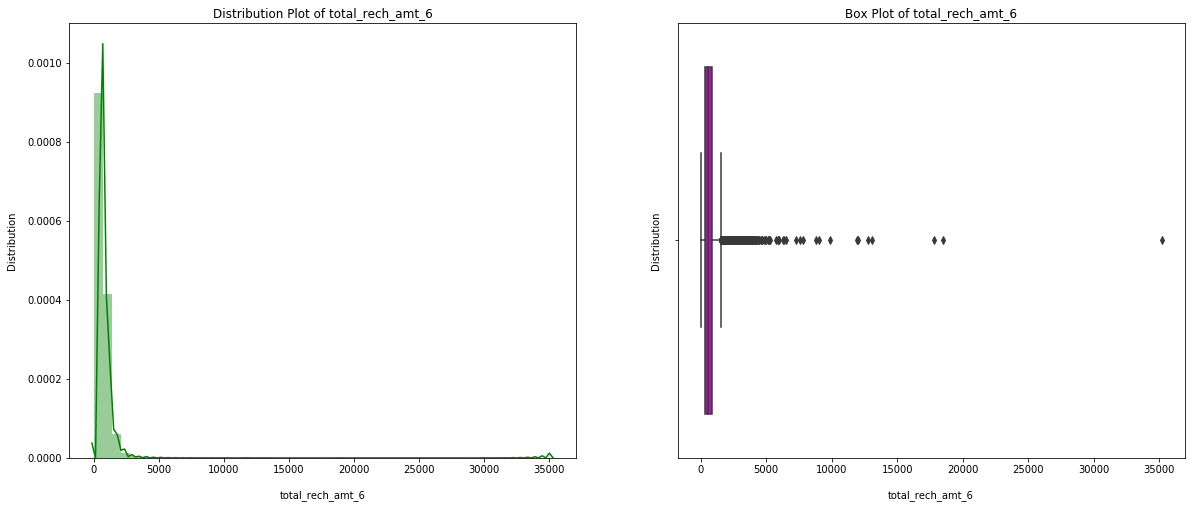

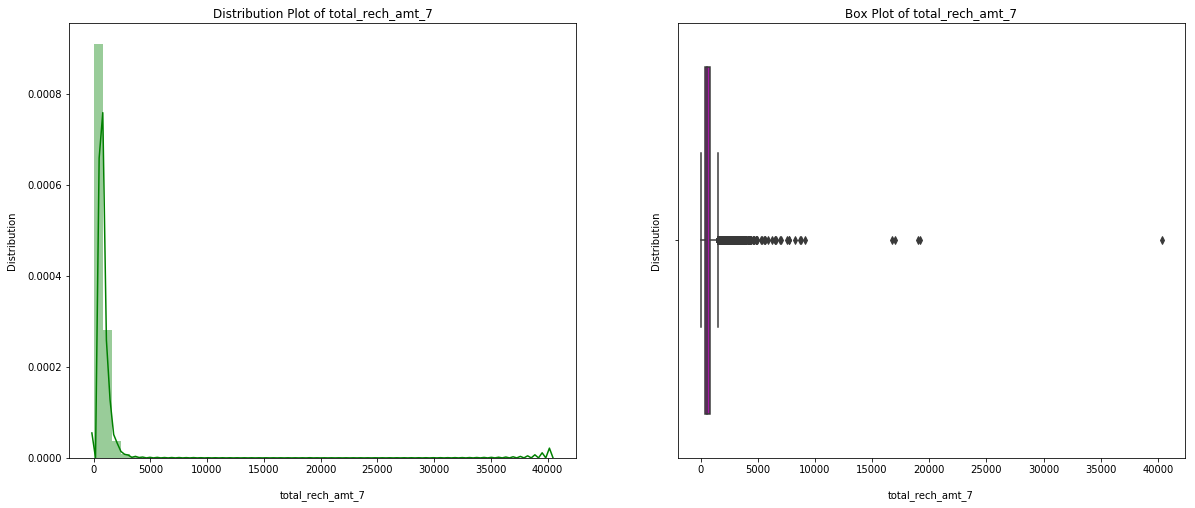

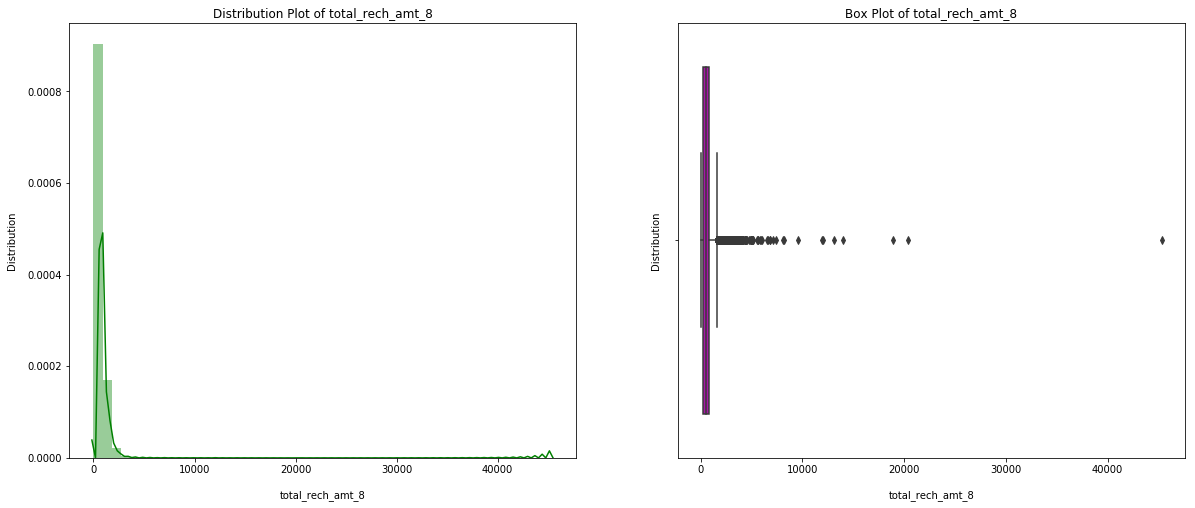

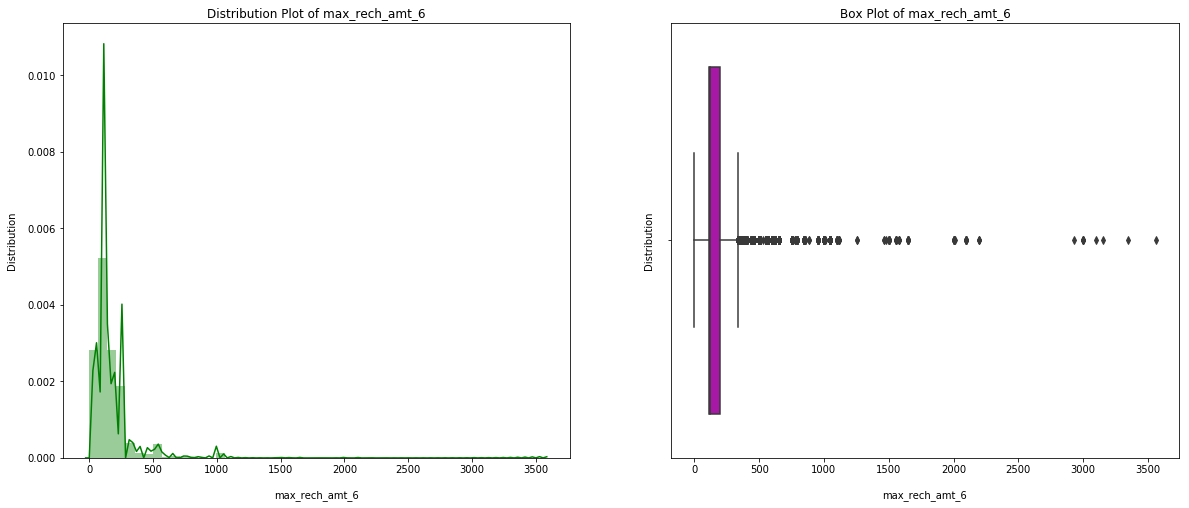

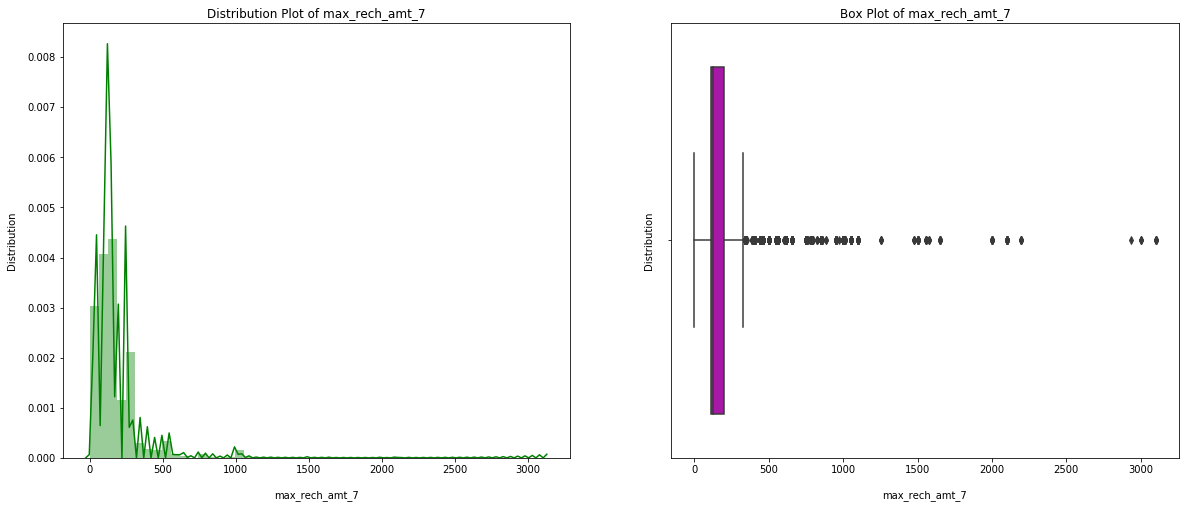

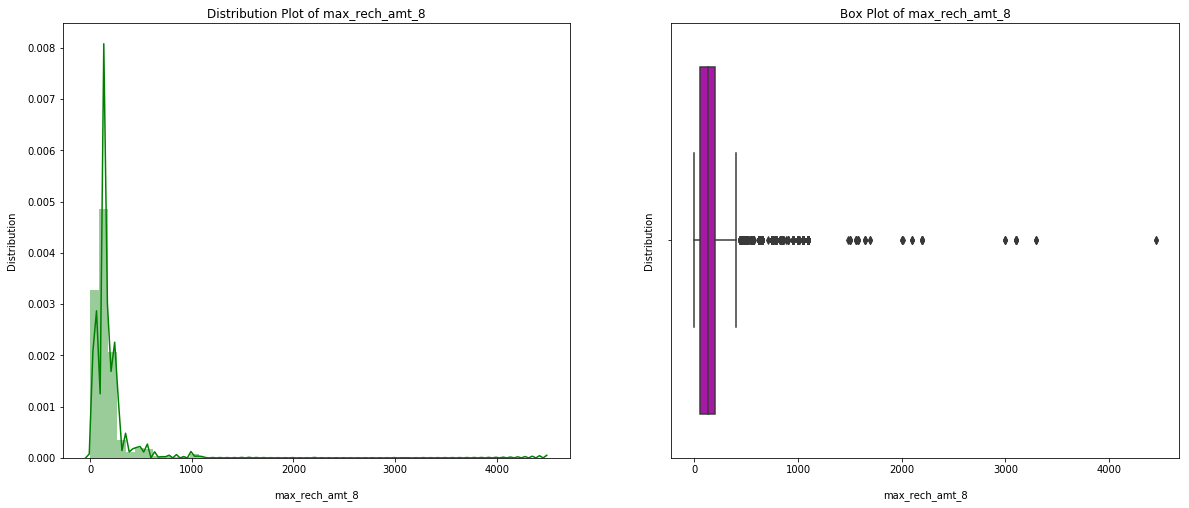

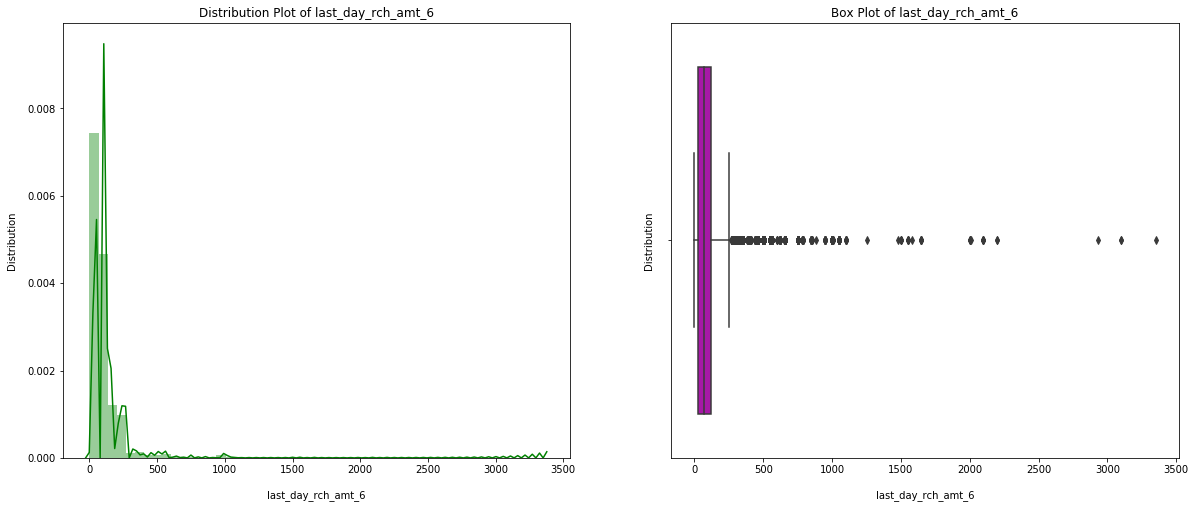

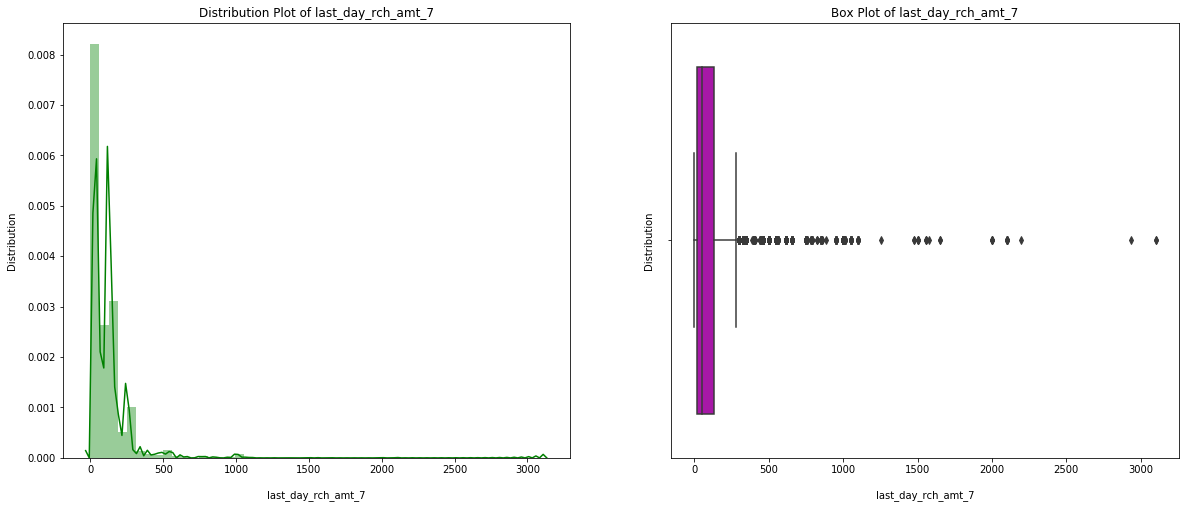

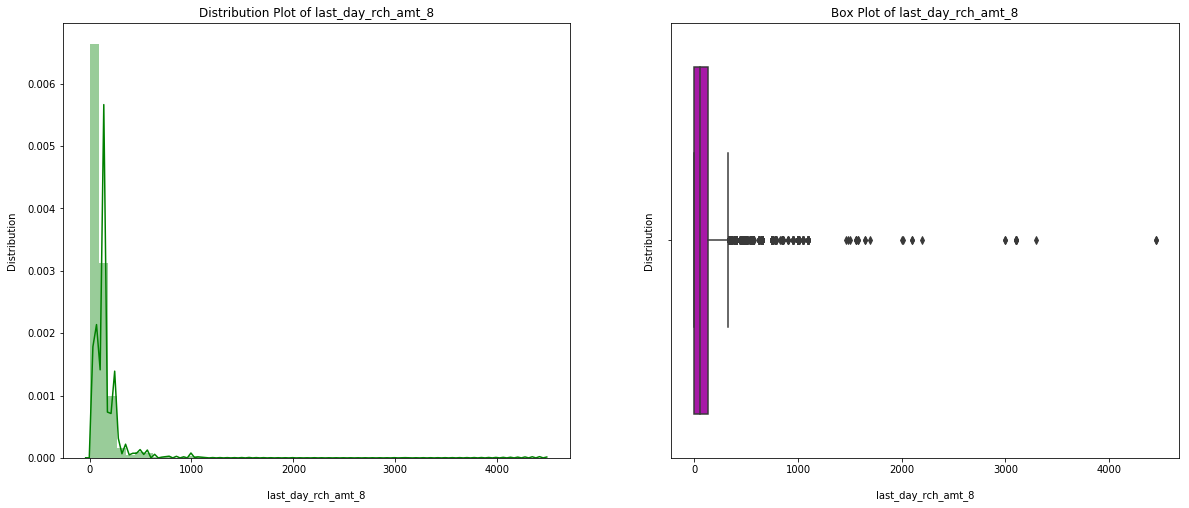

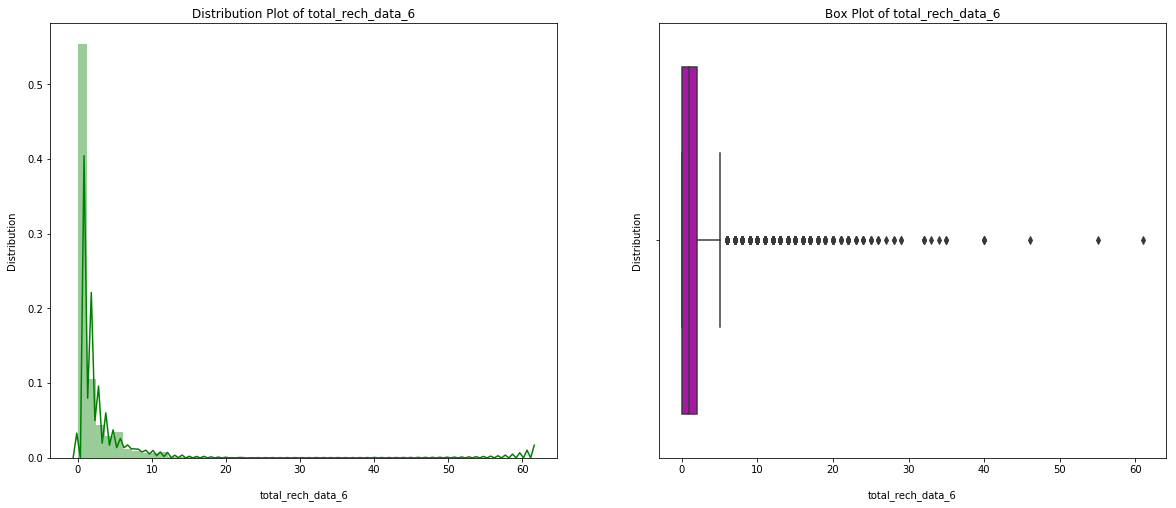

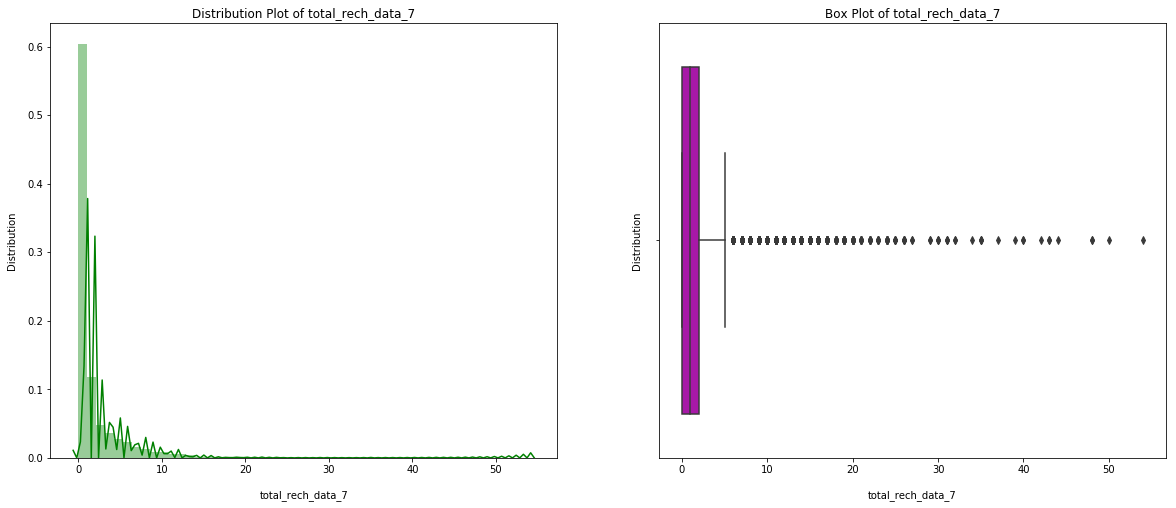

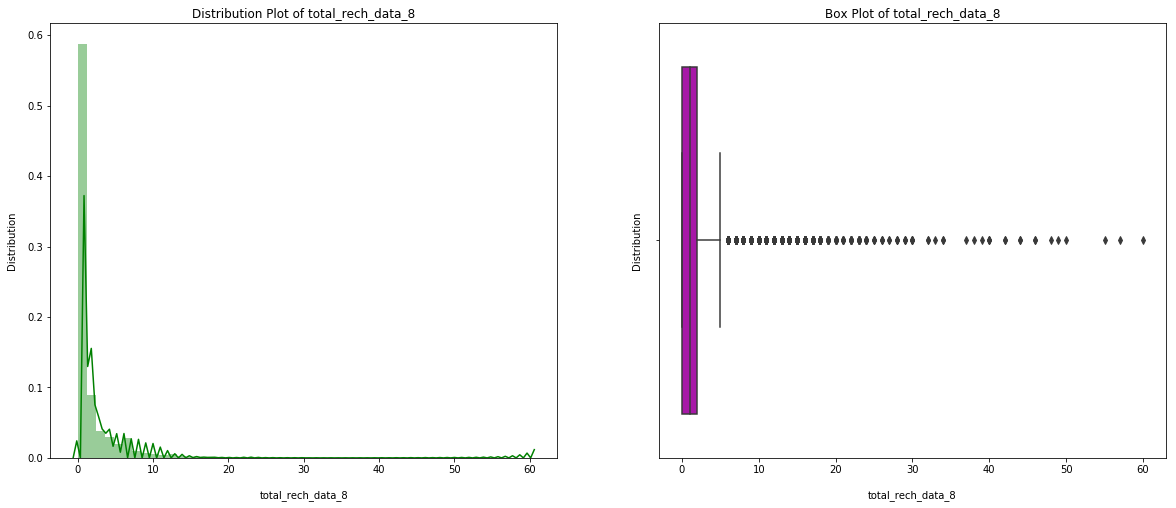

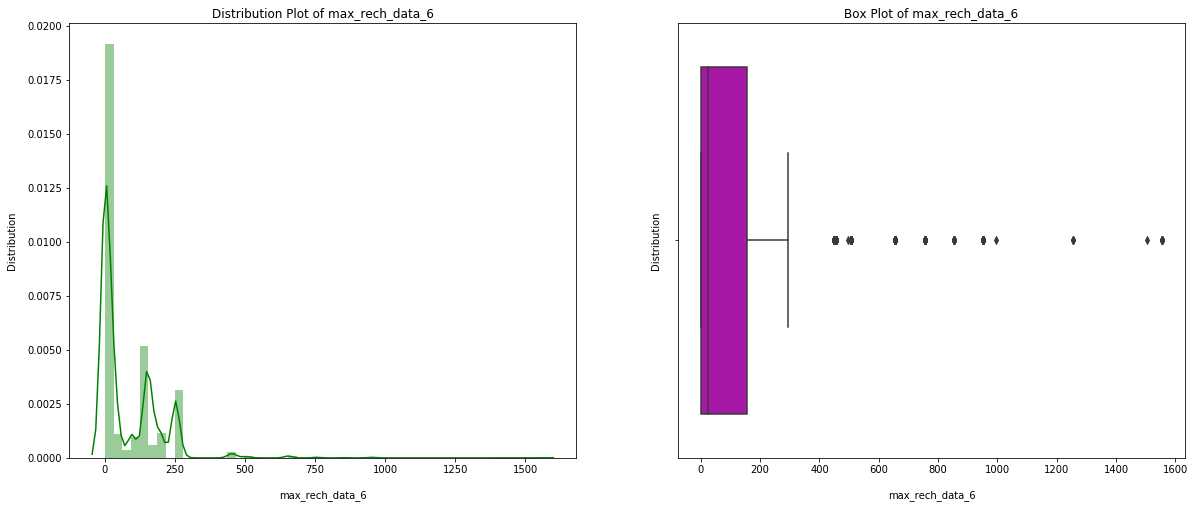

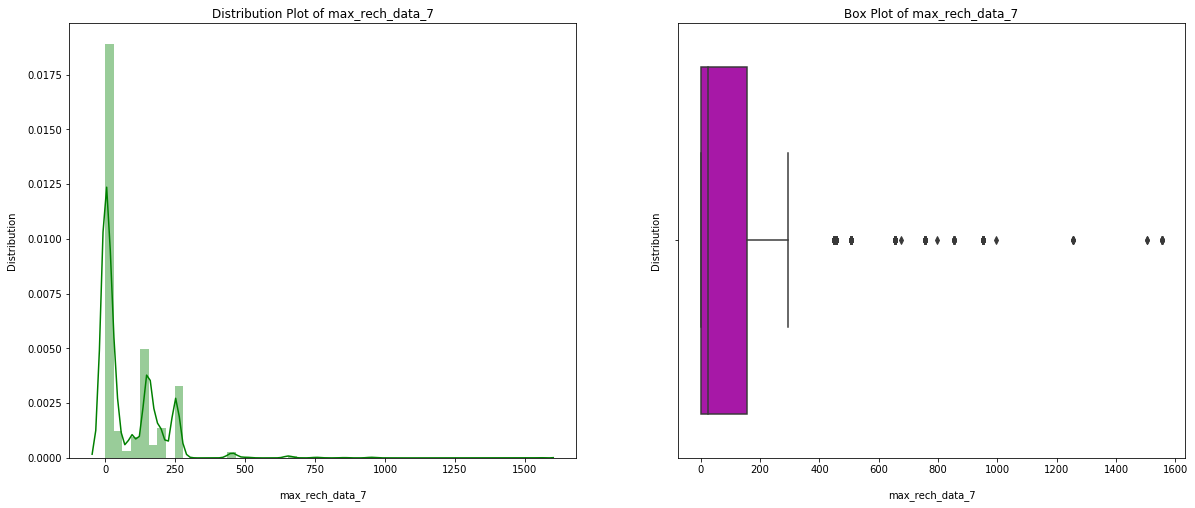

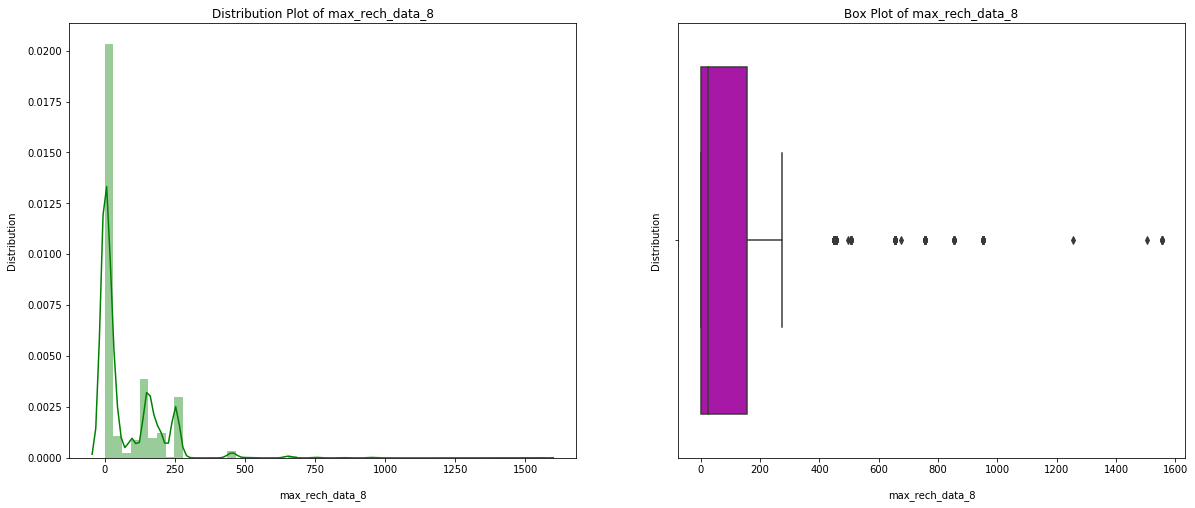

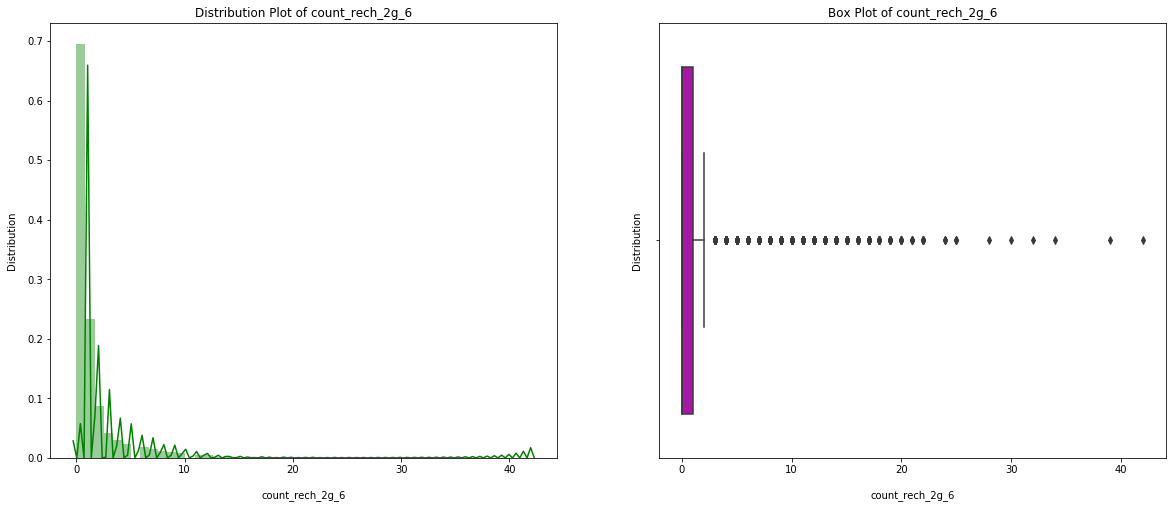

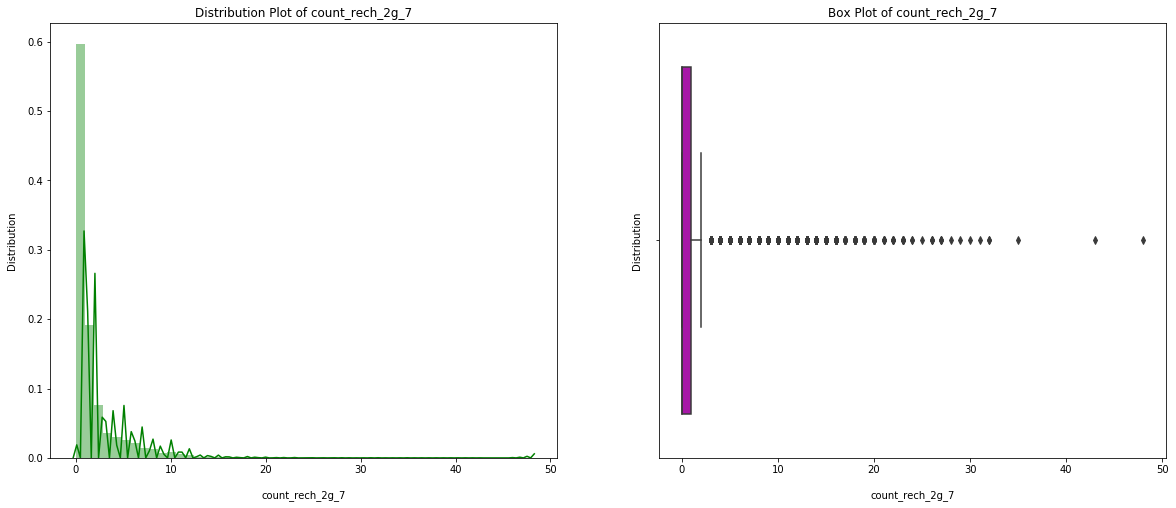

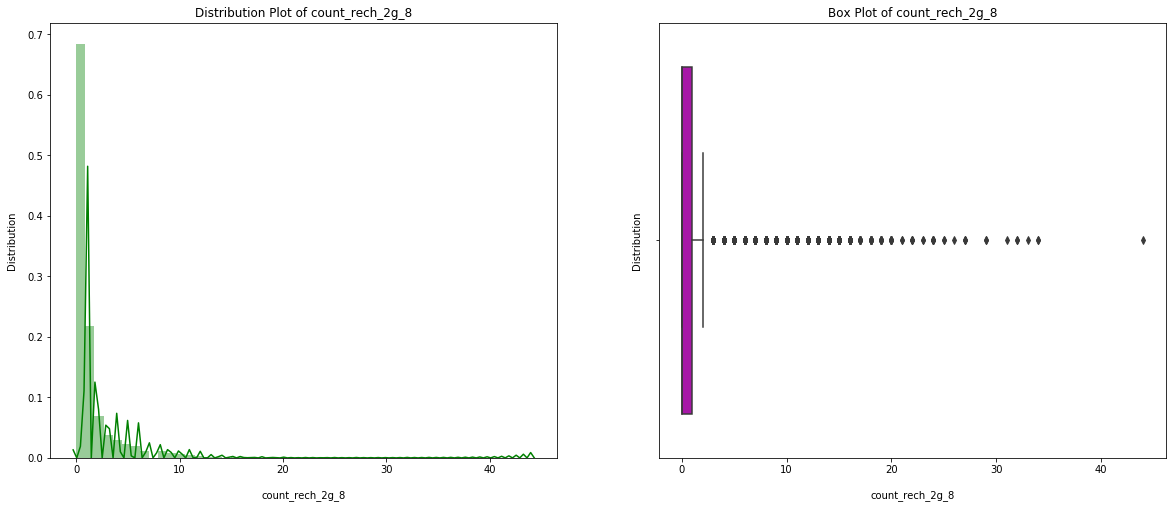

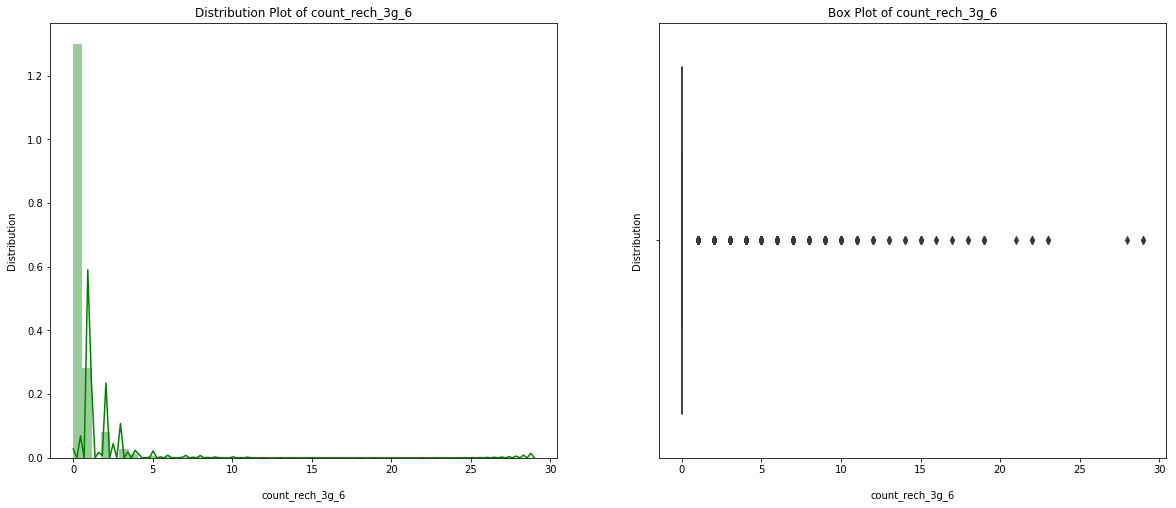

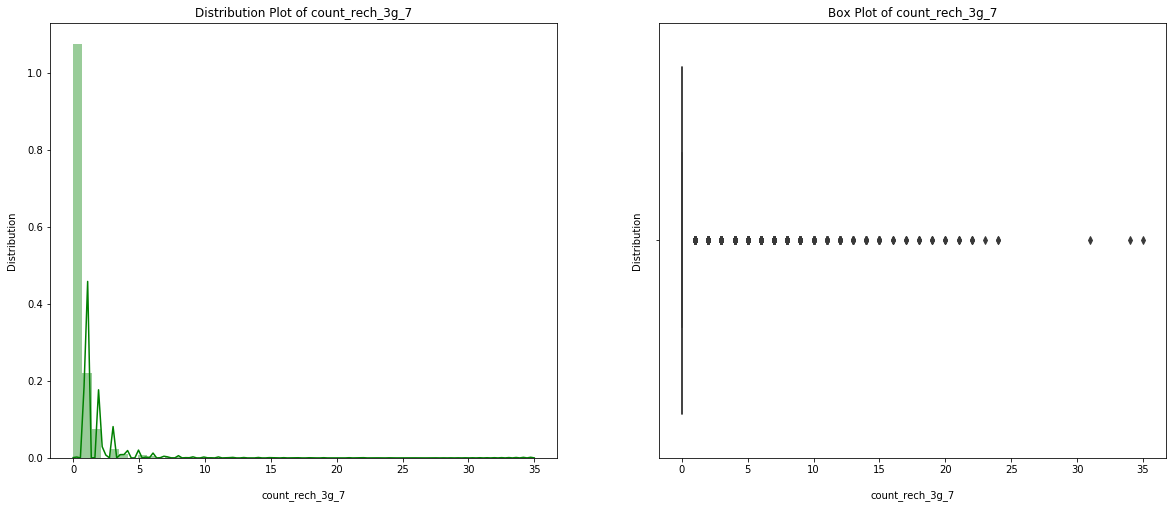

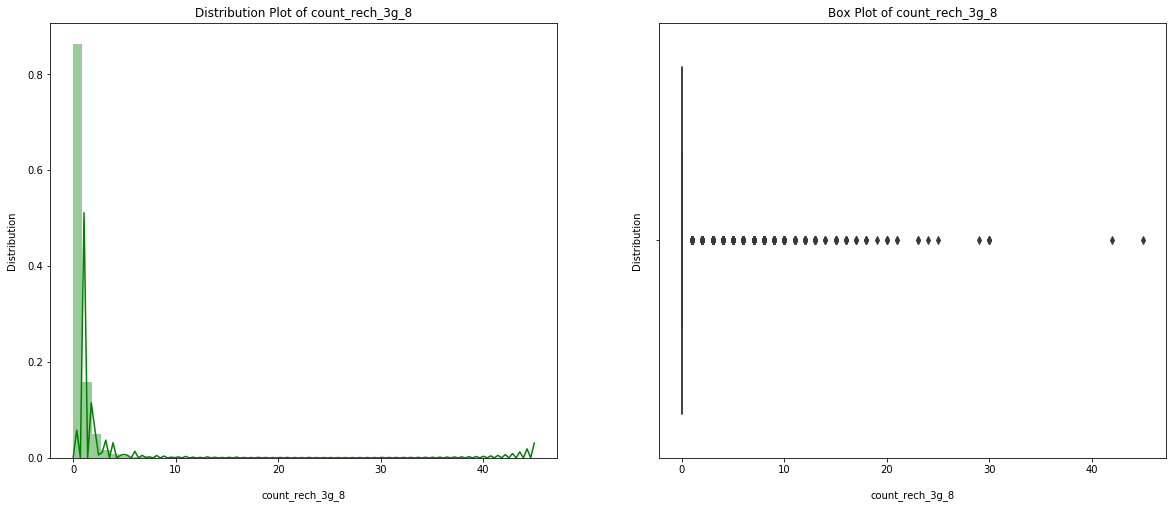

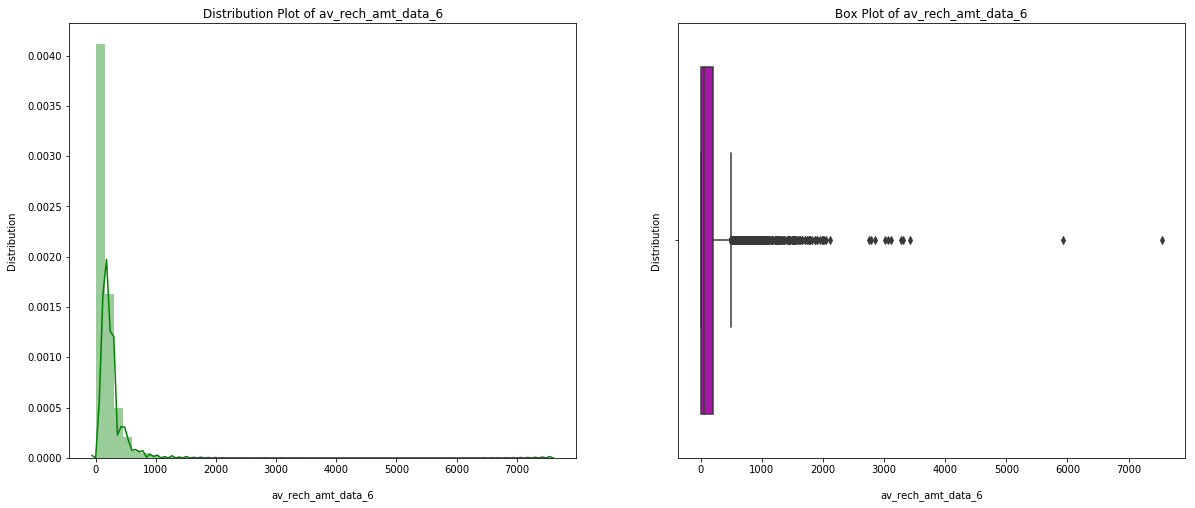

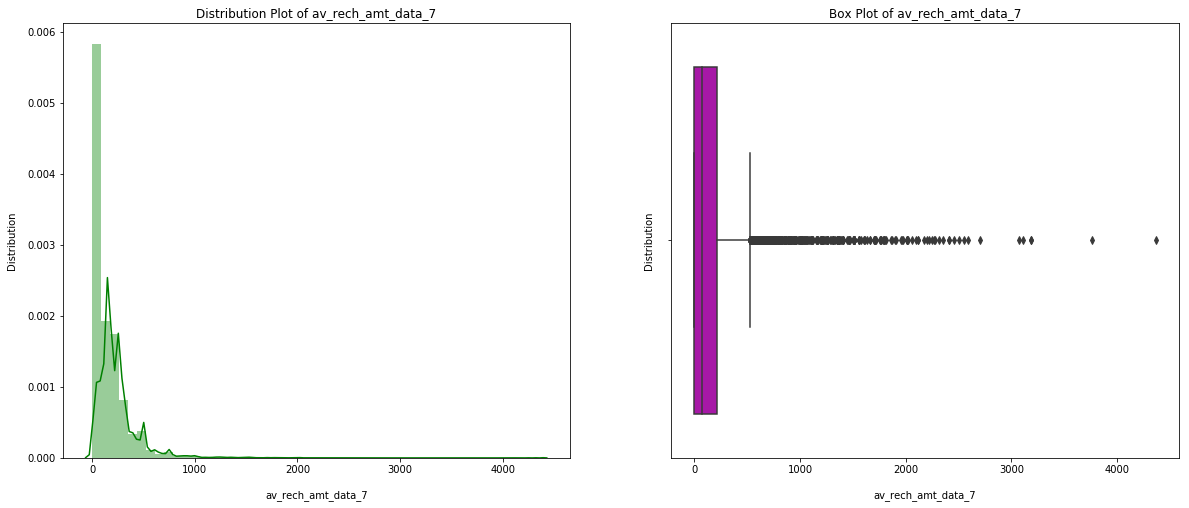

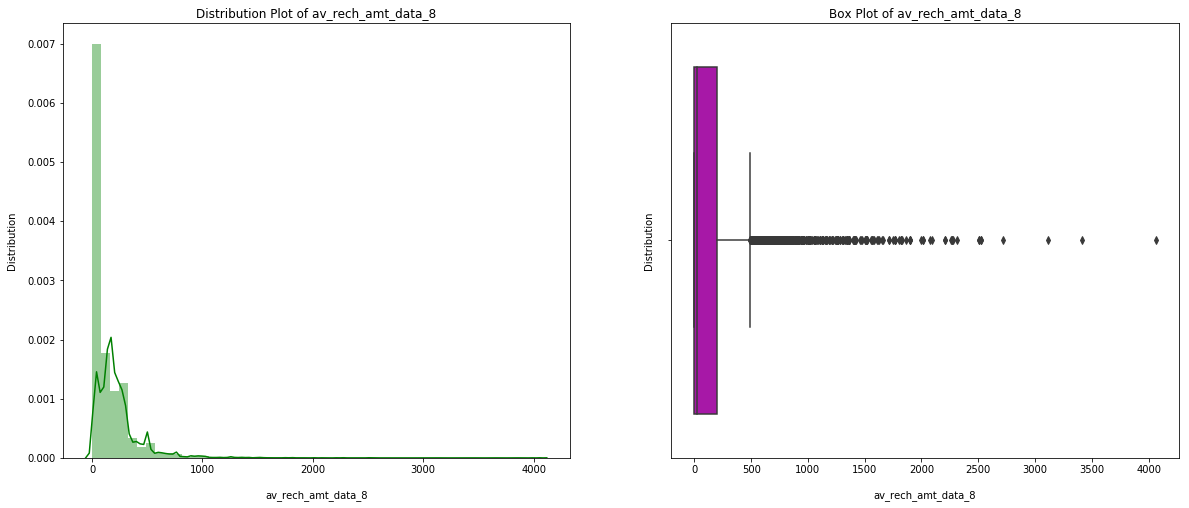

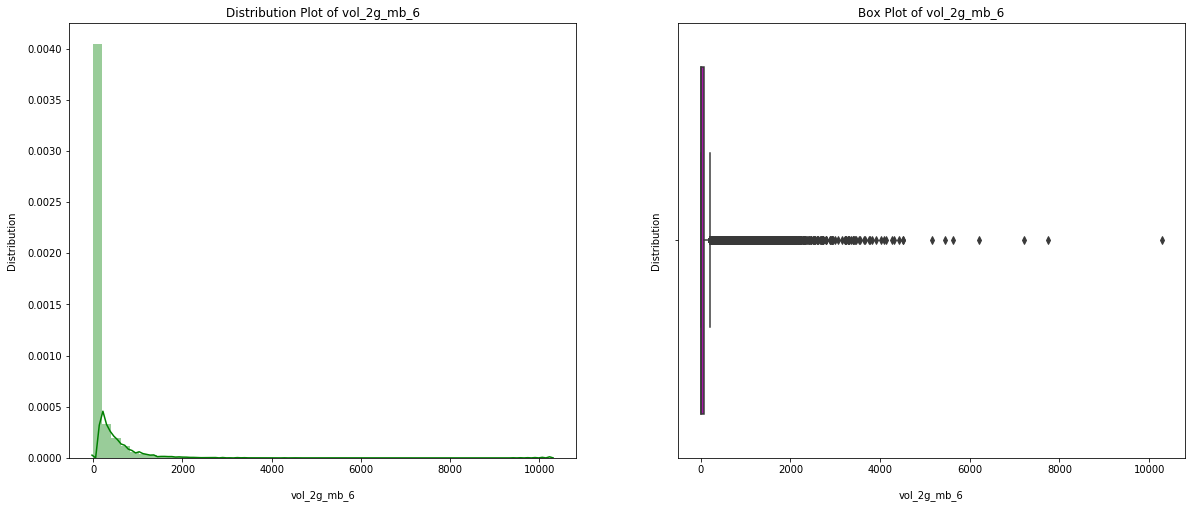

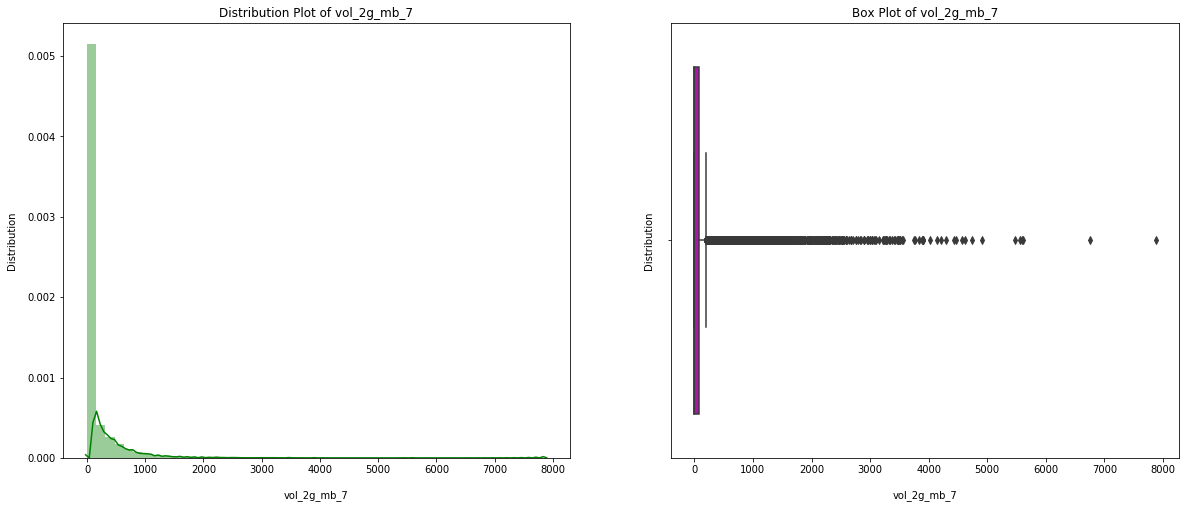

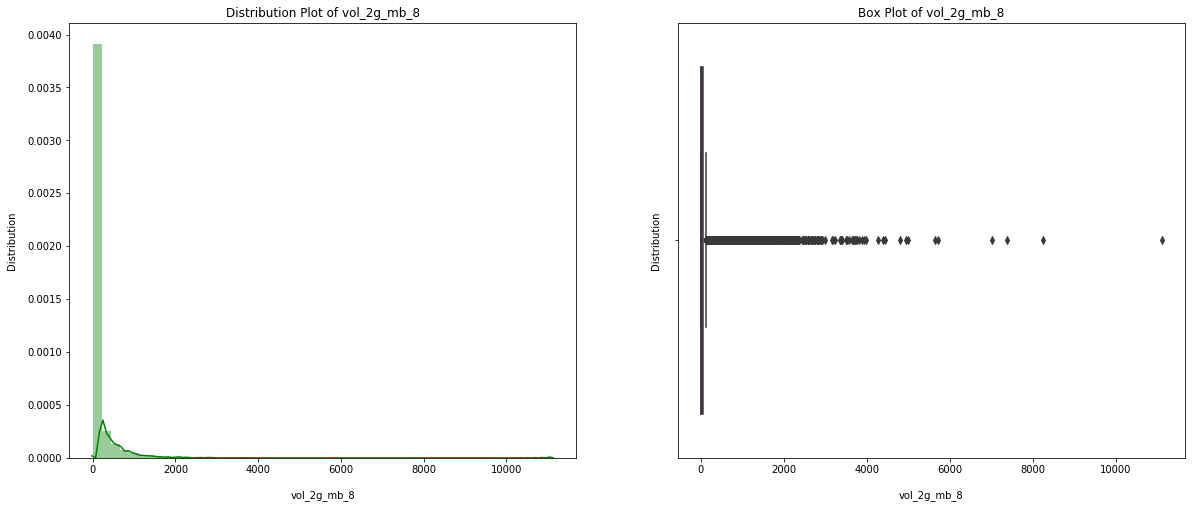

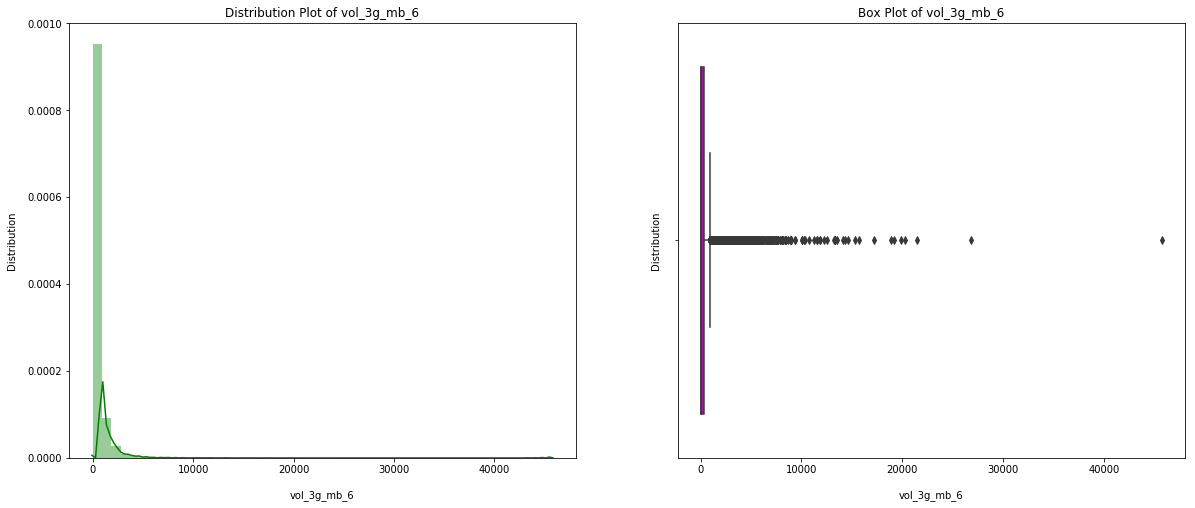

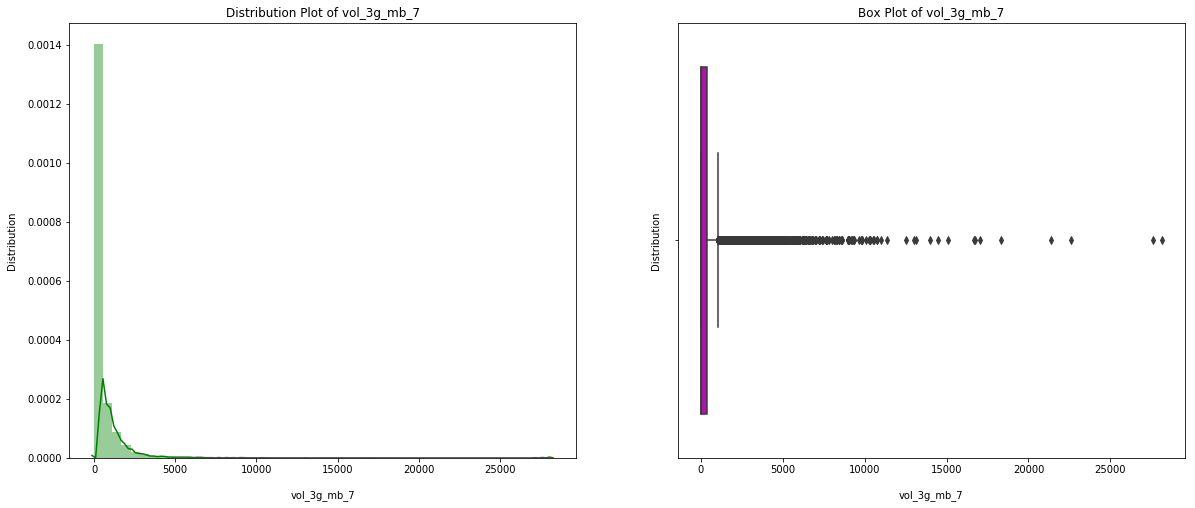

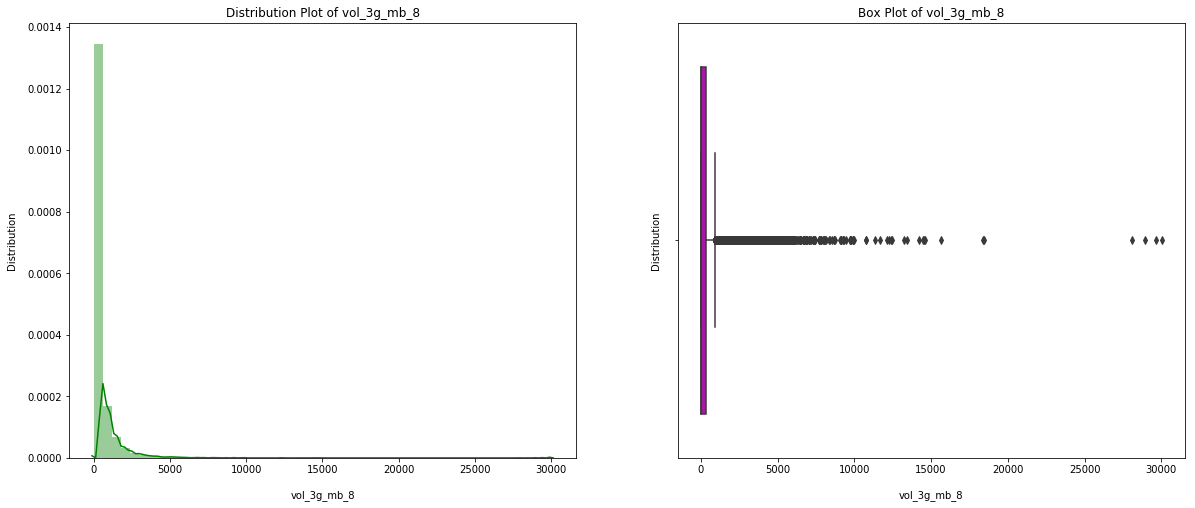

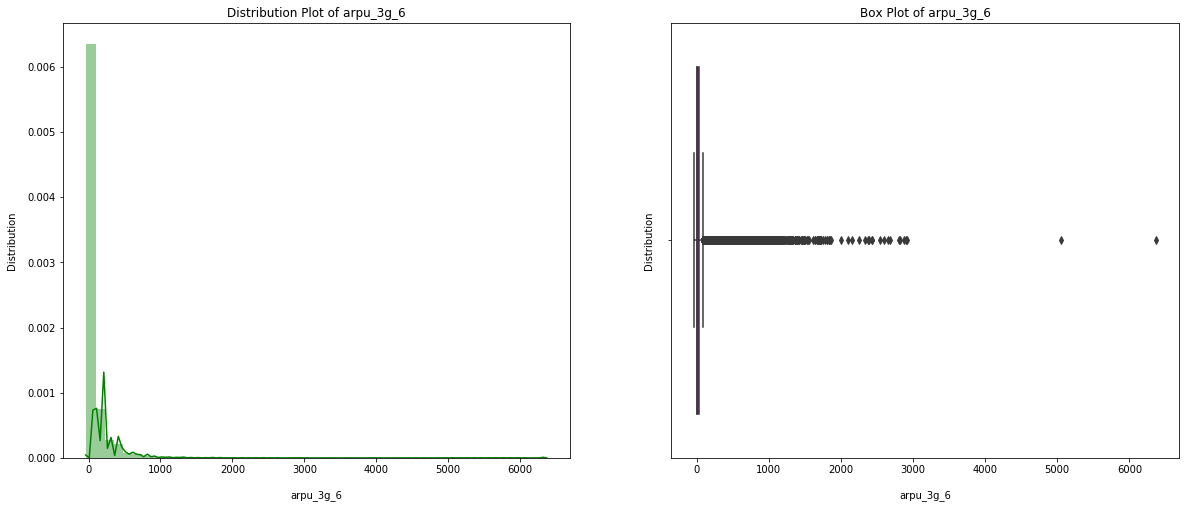

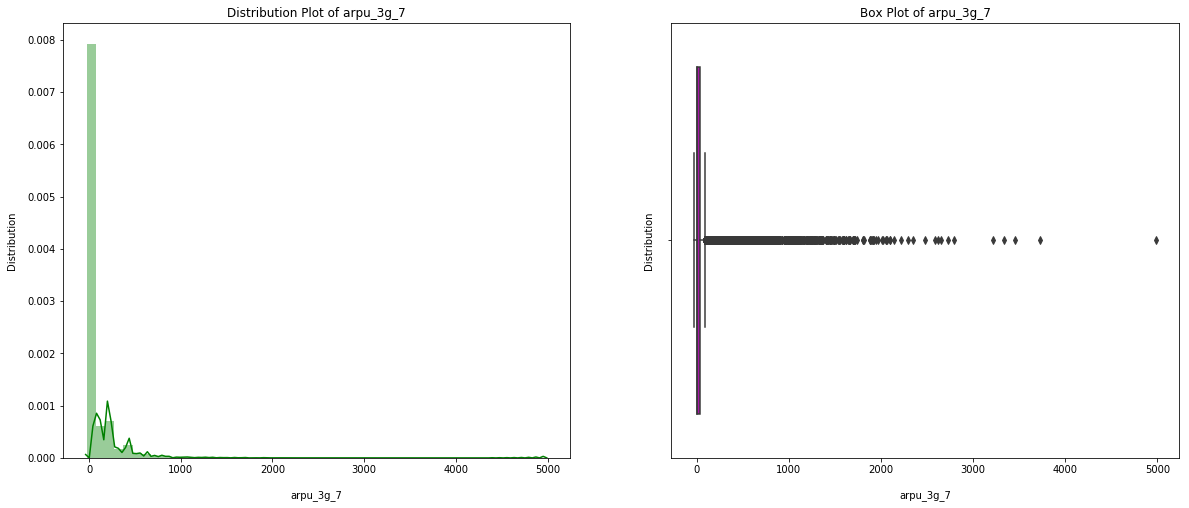

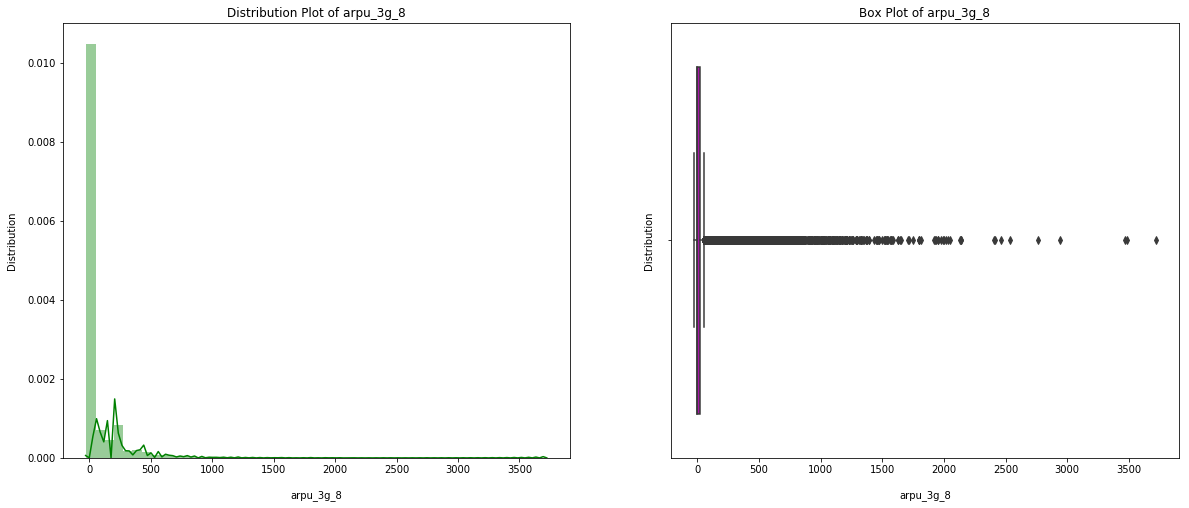

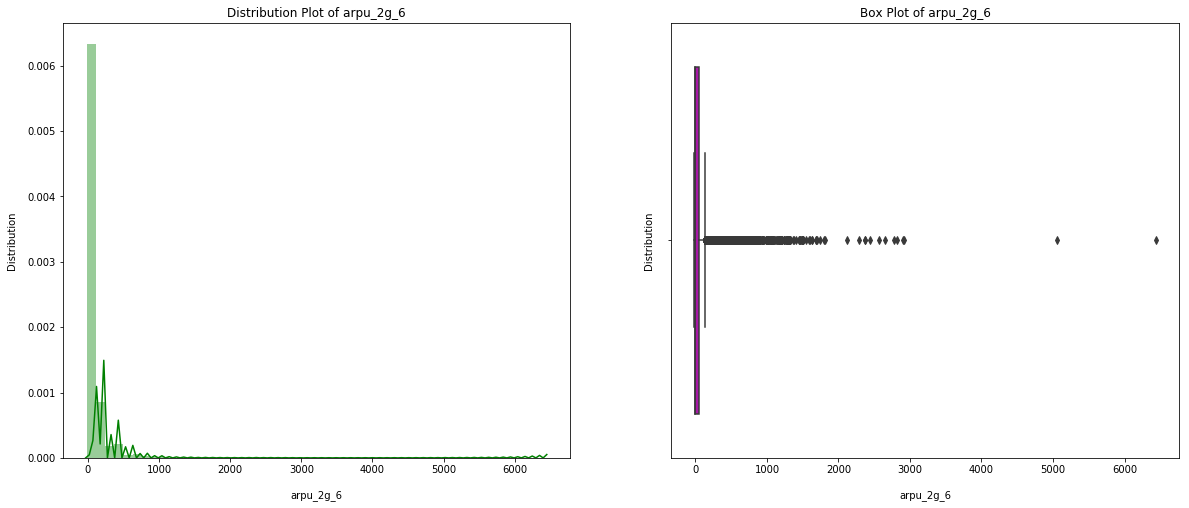

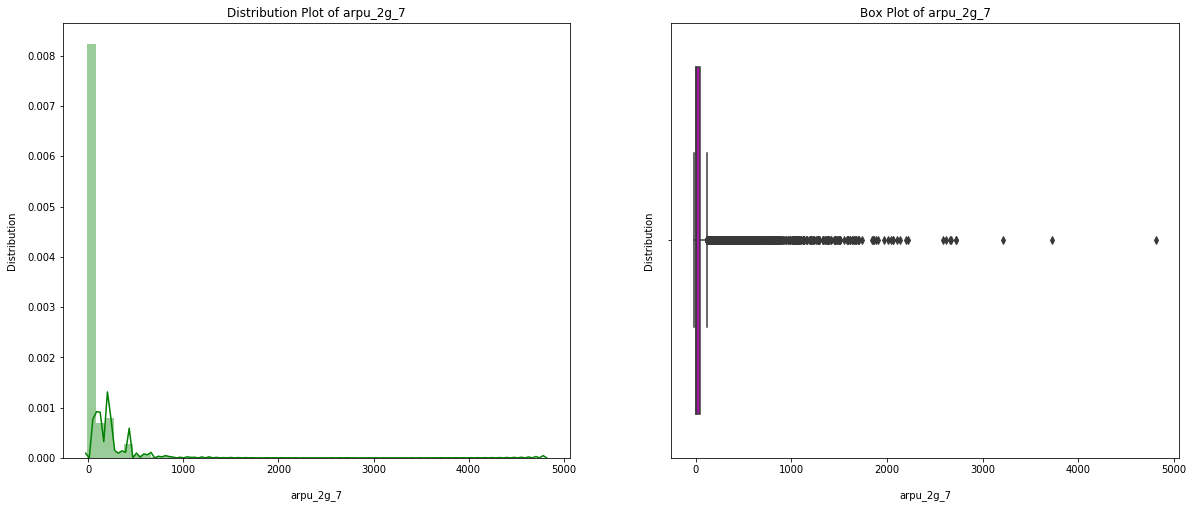

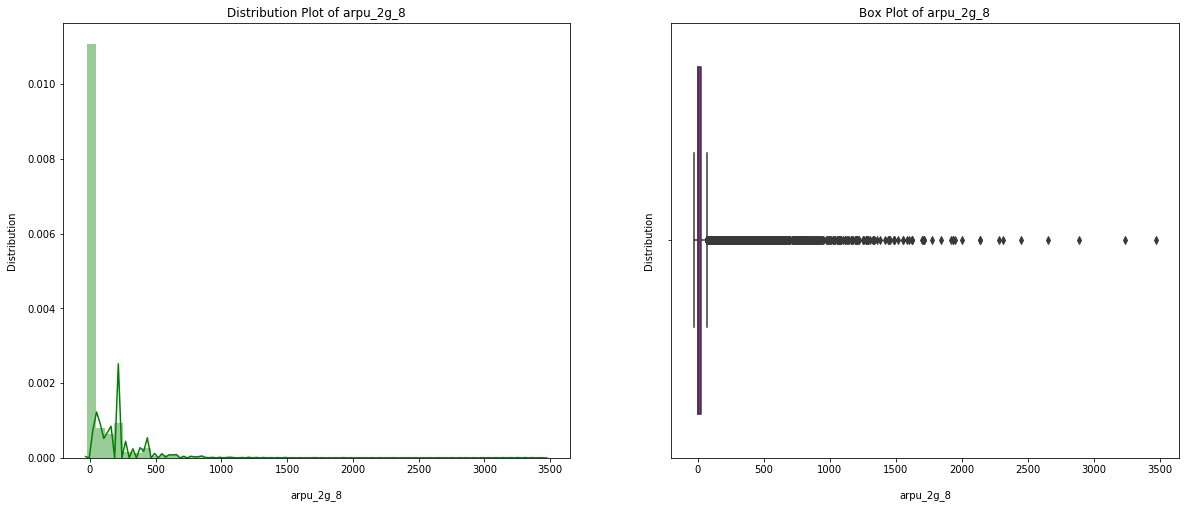

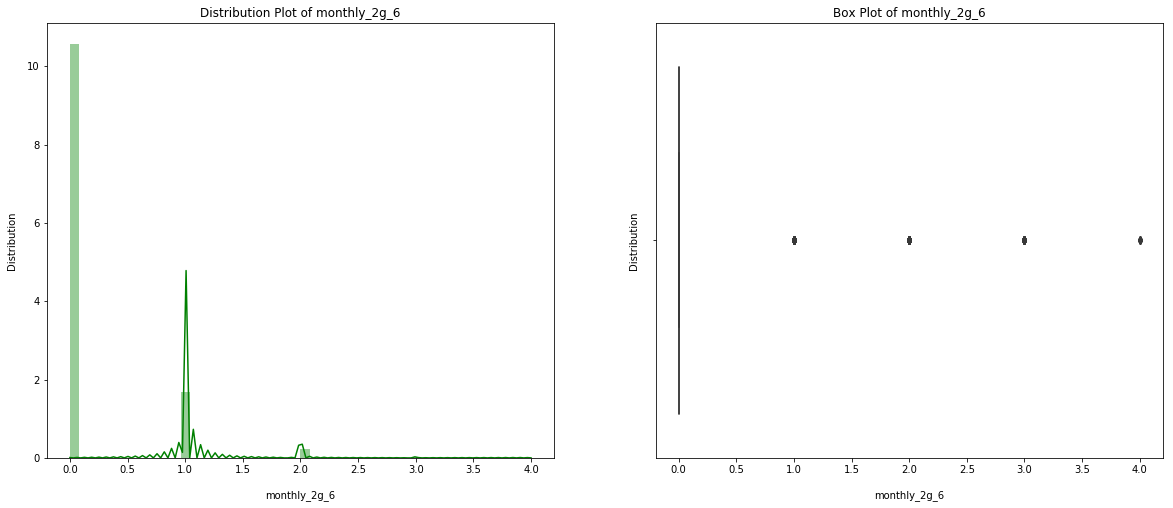

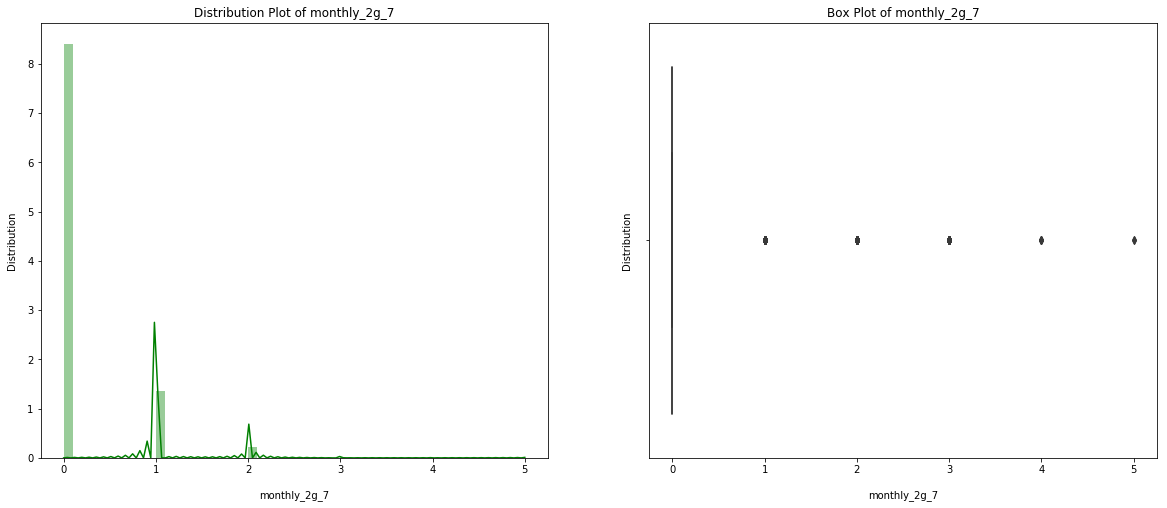

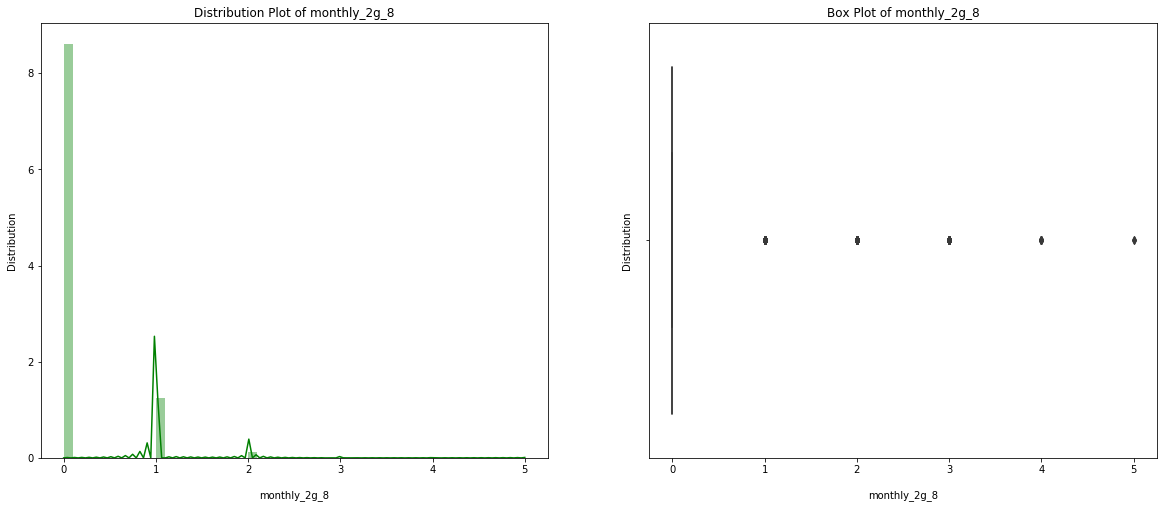

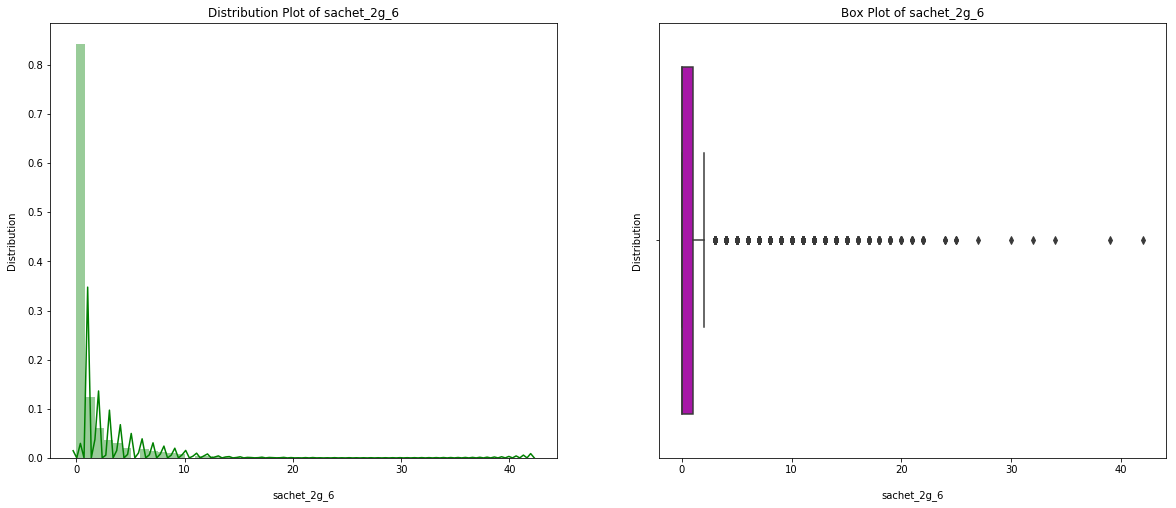

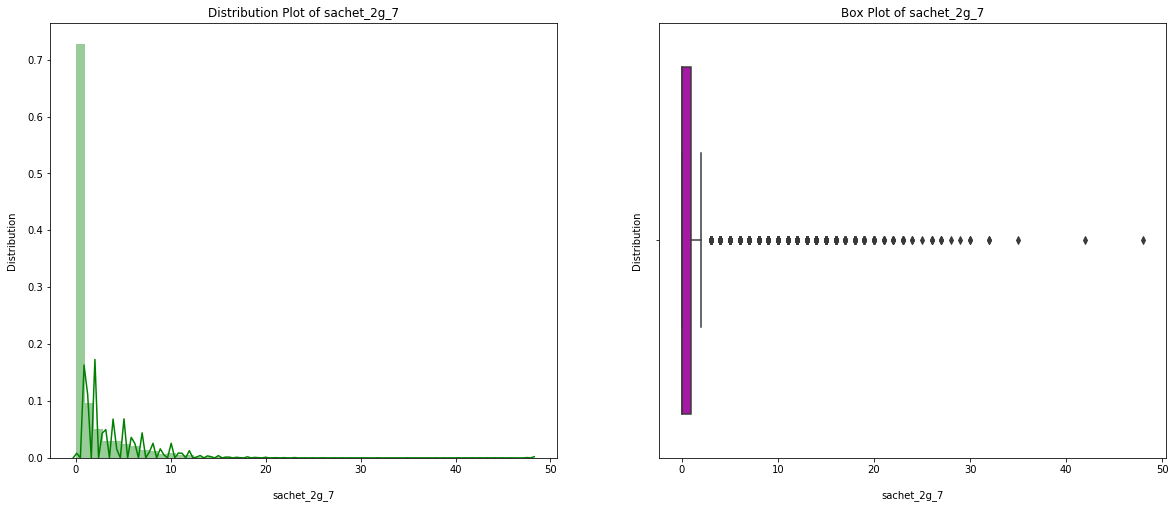

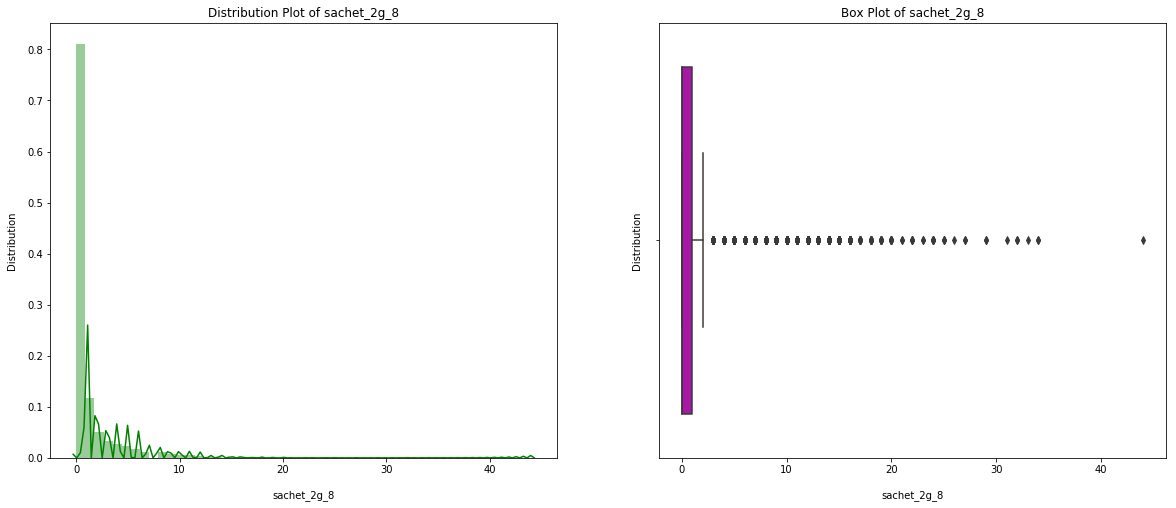

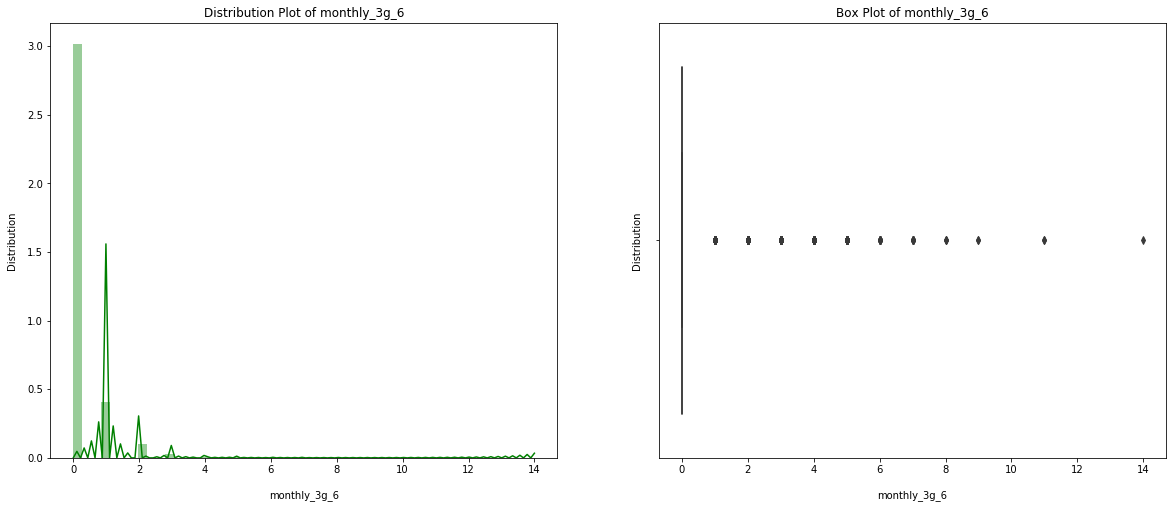

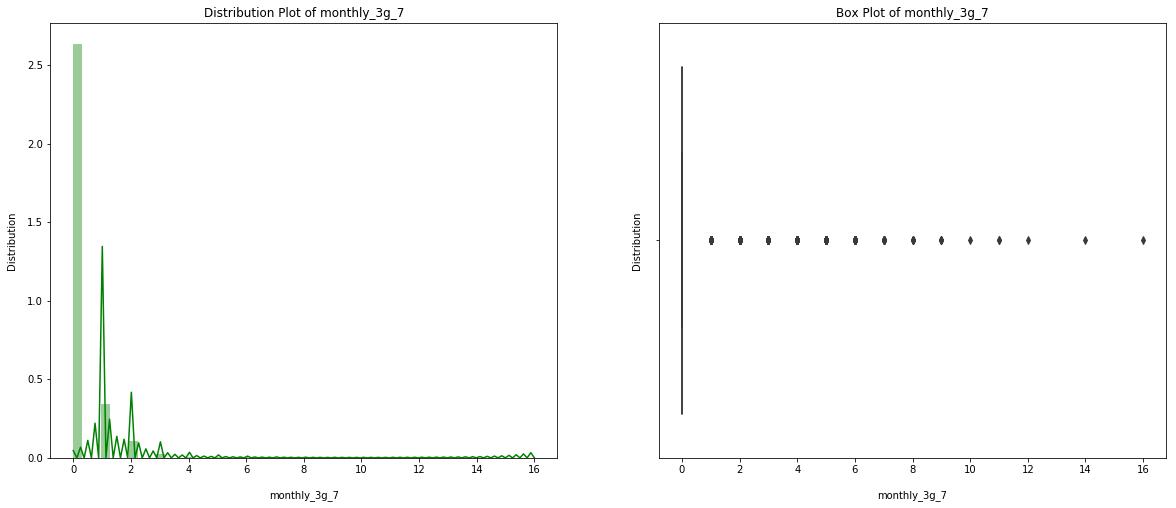

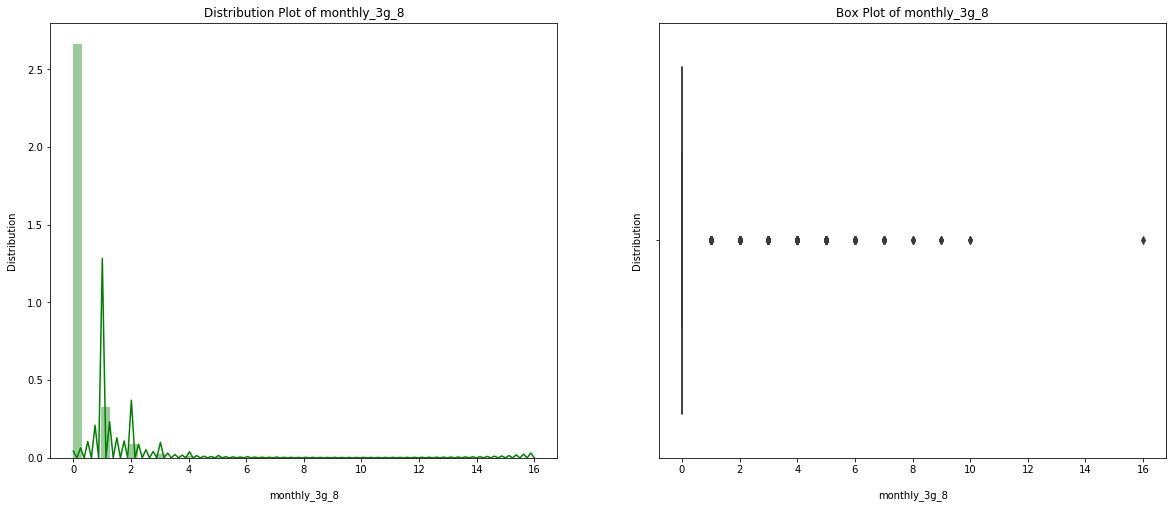

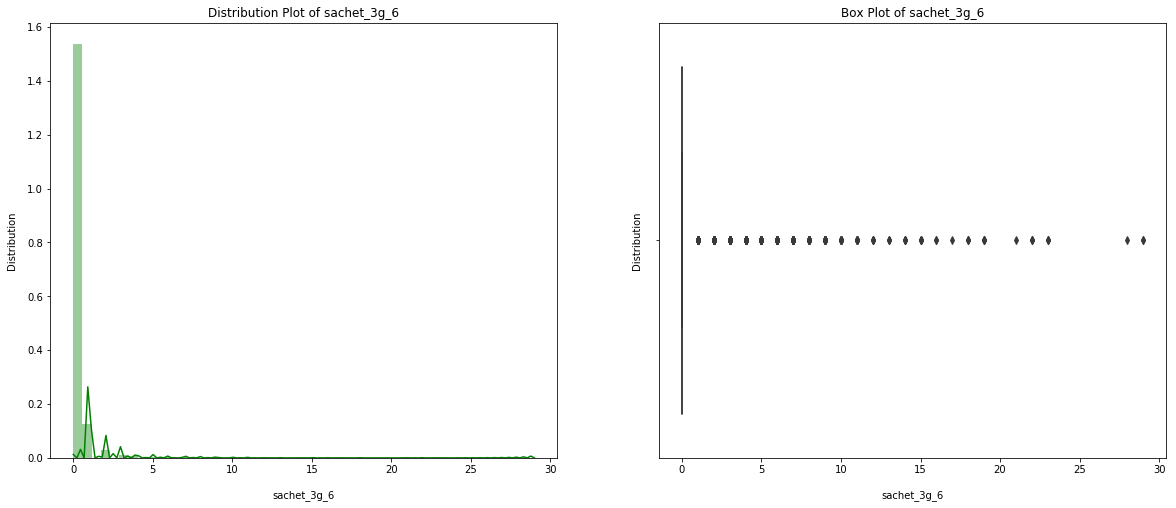

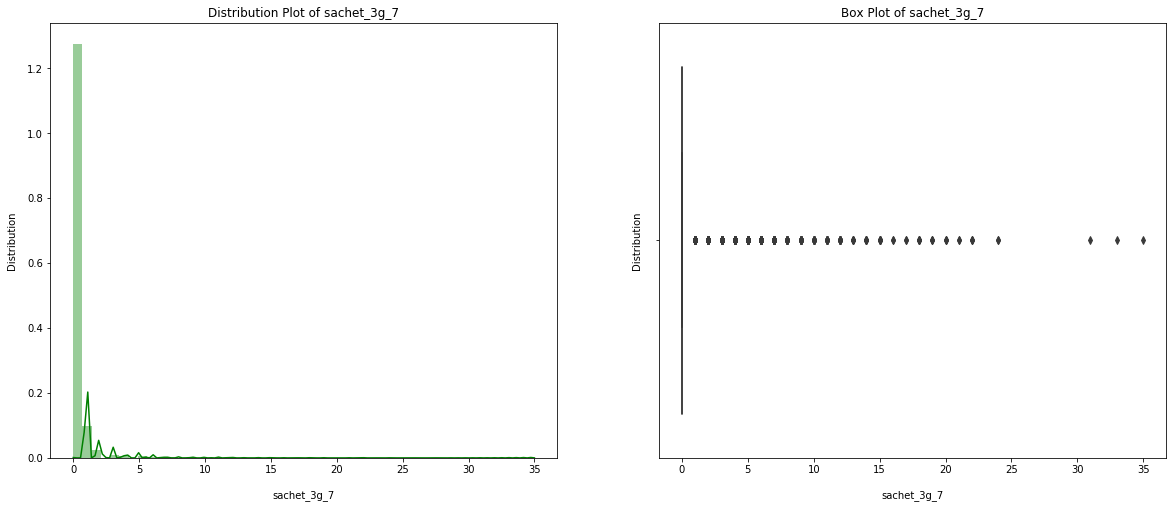

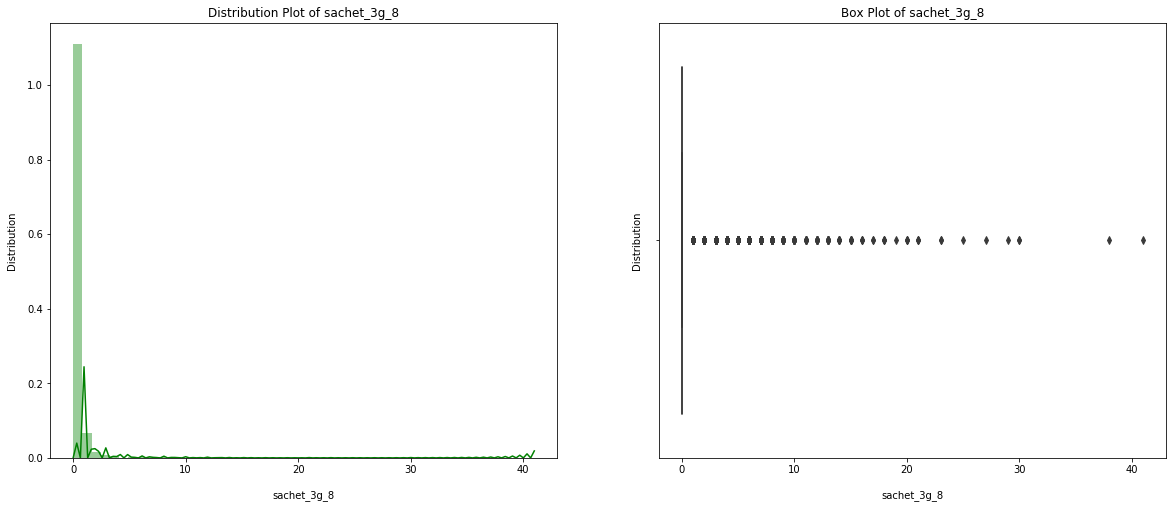

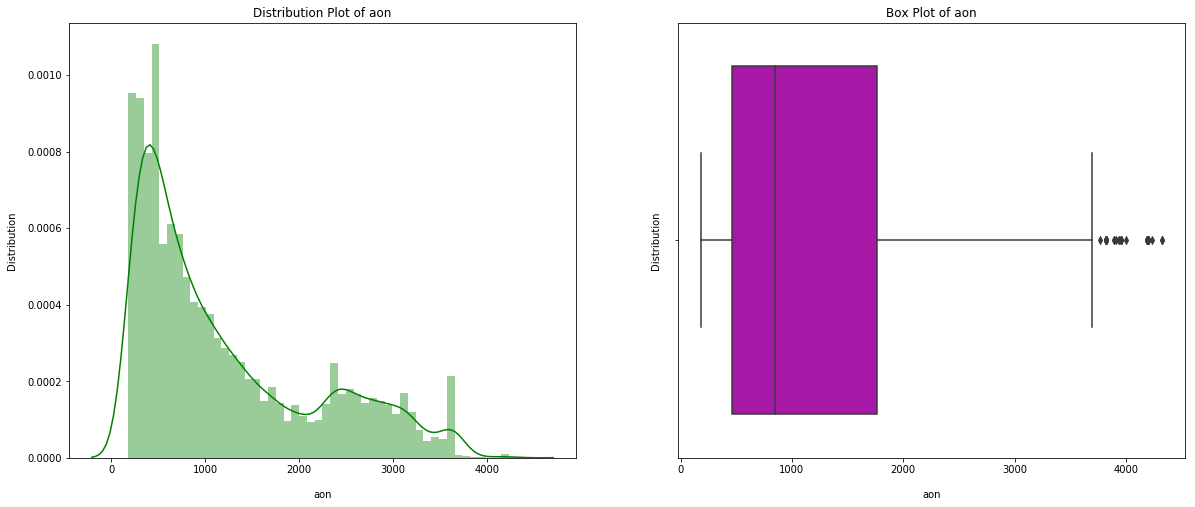

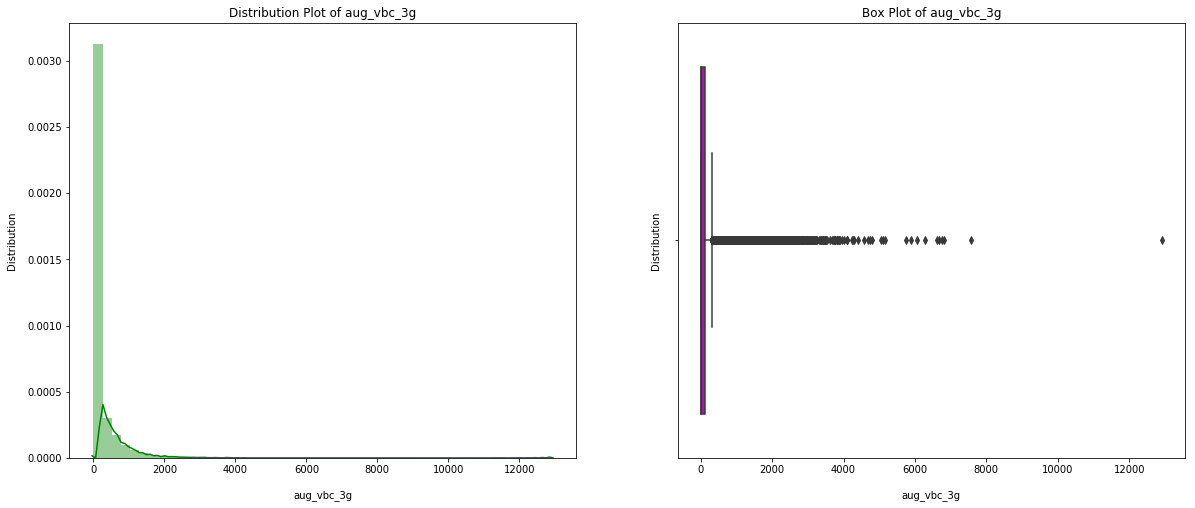

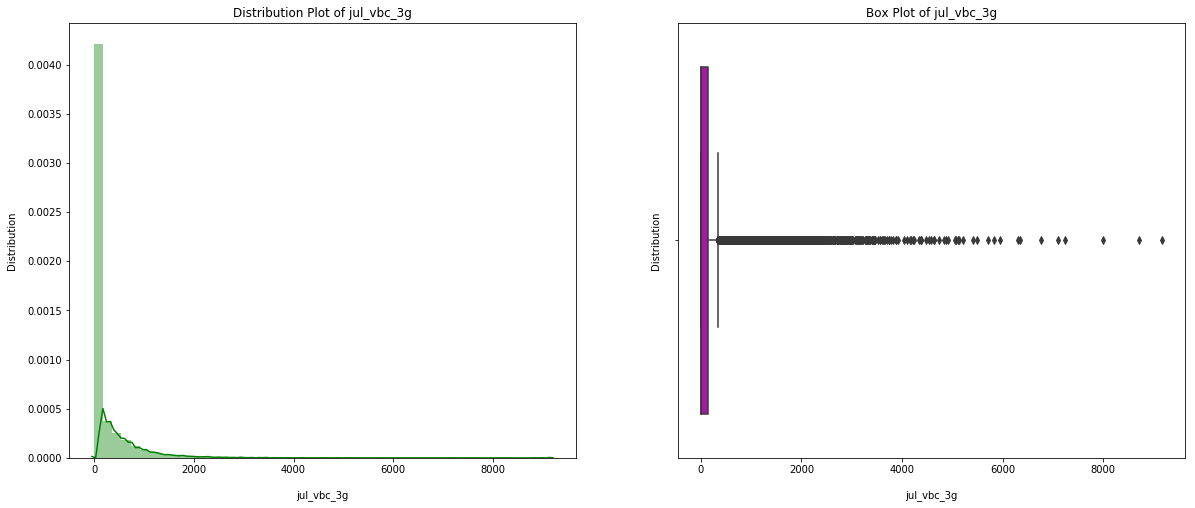

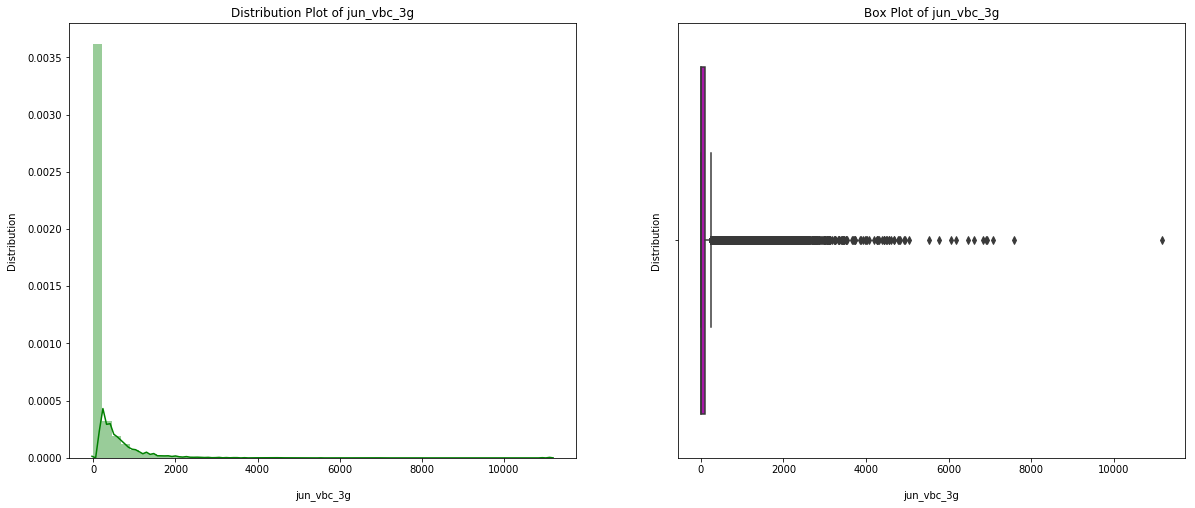

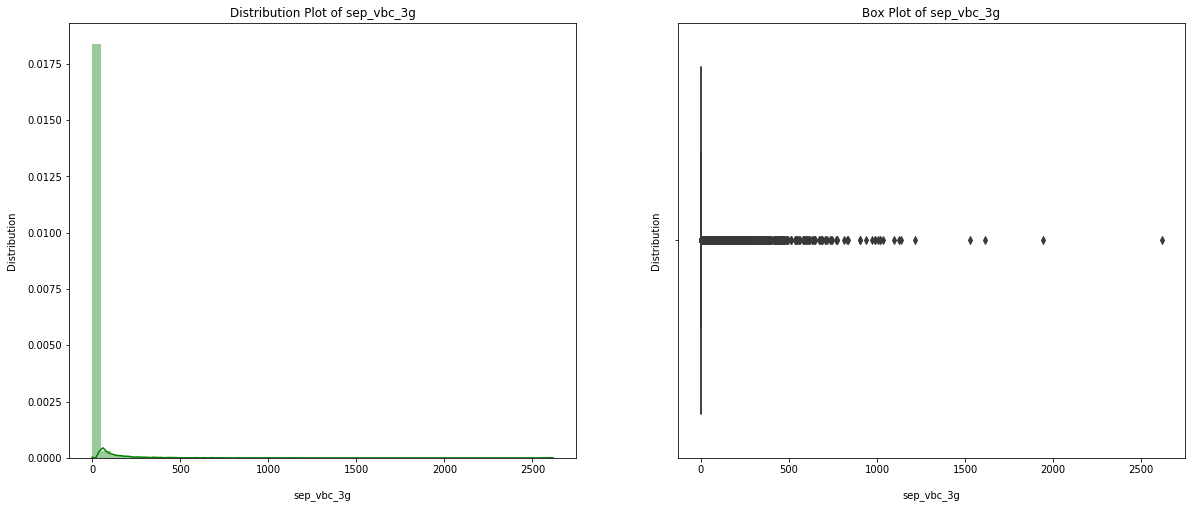

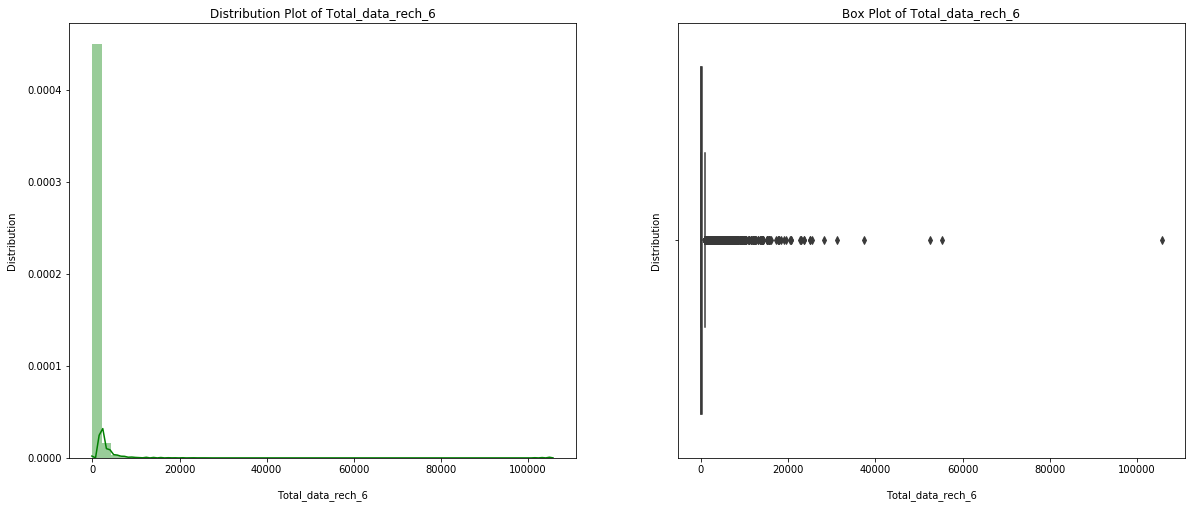

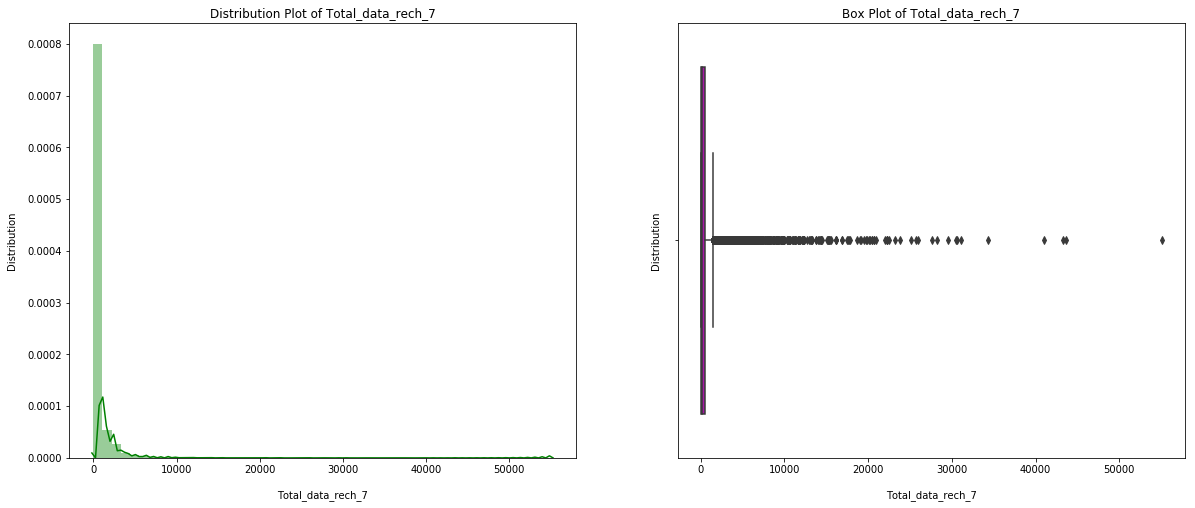

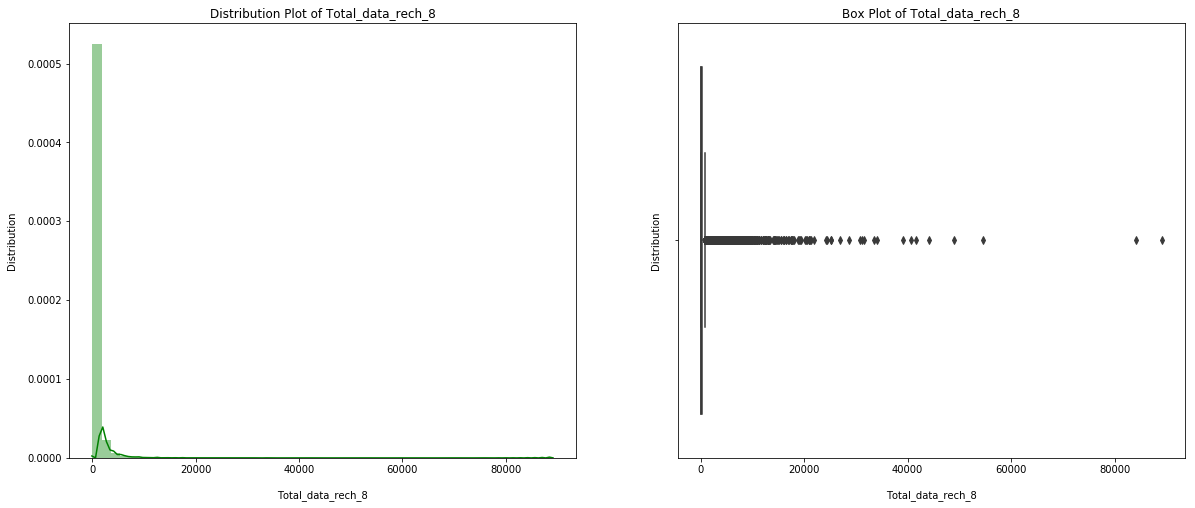

In [73]:

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
c = 1

for col_list in final_telecom_data.columns:
    
    if col_list not in category_list:
        
        # Call Custom Function
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = final_telecom_data,
                        wspace = 0.2)

        c =c+1

In [74]:
print(list(final_telecom_data.columns))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [75]:
numerical_columns=['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 
'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 
'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 
'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 
'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 
'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 
'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 
'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 
'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 
'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 
                 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 
                 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 
                   'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 
                   'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 
                   'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                   'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 
                   'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                   'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 
                   'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
                   'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 
                   'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 
                   'arpu_2g_7', 'arpu_2g_8', 
                   'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                   'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
                    'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 
'Total_data_rech_6', 'Total_data_rech_7', 'Total_data_rech_8', 'churn']

In [76]:
final_telecom_data.shape

(29824, 156)

In [77]:
for i in range(len(numerical_columns)):
    Q1 = final_telecom_data[numerical_columns[i]].quantile(0.03)
    Q3 = final_telecom_data[numerical_columns[i]].quantile(0.998)
    IQR = Q3 - Q1
    final_telecom_data = final_telecom_data[(final_telecom_data[numerical_columns[i]] >= Q1 - 1.5*IQR) & (final_telecom_data[numerical_columns[i]] <= Q3 + 1.5*IQR)]

final_telecom_data.shape

(29379, 156)

#### Bivariate analysis with respect to the target variable 'Churn'

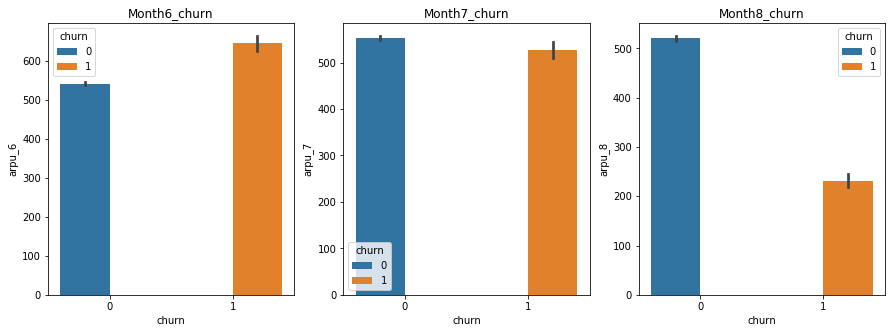

In [78]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x = 'churn', y = "arpu_6", hue = "churn", data = final_telecom_data)
plt.title('Month6_churn')
plt.subplot(1, 3, 2)
sns.barplot(x = 'churn', y = "arpu_7", hue = "churn", data = final_telecom_data)
plt.title('Month7_churn')
plt.subplot(1, 3, 3)
sns.barplot(x = 'churn', y = "arpu_8", hue = "churn", data = final_telecom_data)
plt.title('Month8_churn')
plt.show()

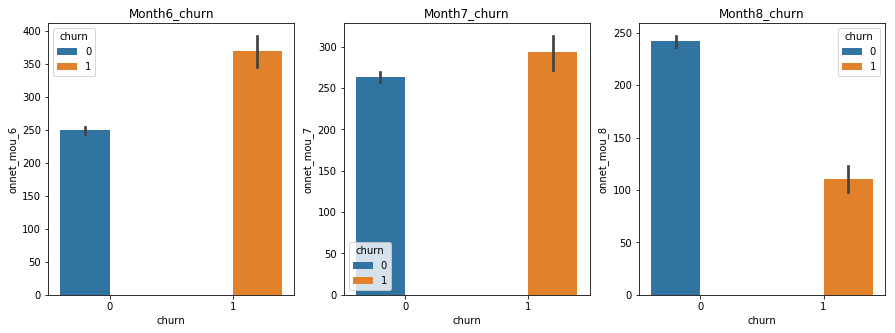

In [79]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x = 'churn', y = "onnet_mou_6", hue = "churn", data = final_telecom_data)
plt.title('Month6_churn')
plt.subplot(1, 3, 2)
sns.barplot(x = 'churn', y = "onnet_mou_7", hue = "churn", data = final_telecom_data)
plt.title('Month7_churn')
plt.subplot(1, 3, 3)
sns.barplot(x = 'churn', y ="onnet_mou_8", hue = "churn", data = final_telecom_data)
plt.title('Month8_churn')
plt.show()

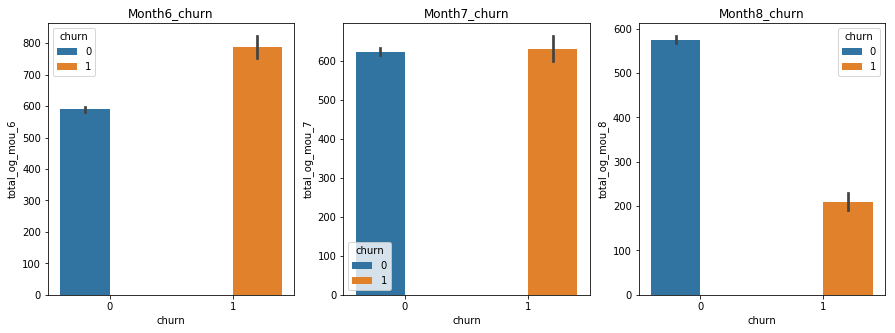

In [80]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x = 'churn', y = "total_og_mou_6", hue = "churn", data = final_telecom_data)
plt.title('Month6_churn')
plt.subplot(1, 3, 2)
sns.barplot(x = 'churn', y = "total_og_mou_7", hue = "churn", data = final_telecom_data)
plt.title('Month7_churn')
plt.subplot(1, 3, 3)
sns.barplot(x = 'churn', y ="total_og_mou_8", hue = "churn", data = final_telecom_data)
plt.title('Month8_churn')
plt.show()

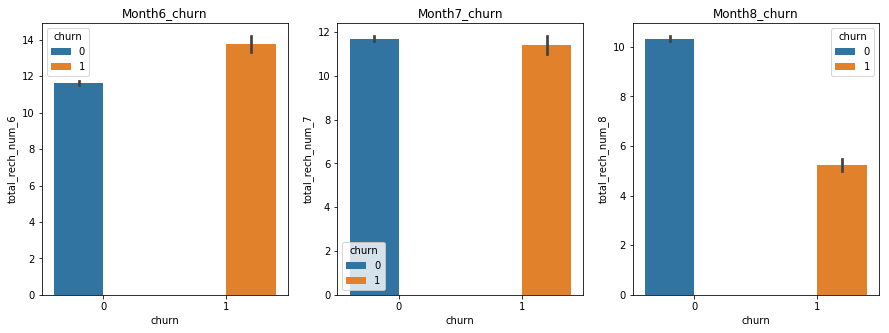

In [81]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x = 'churn', y = "total_rech_num_6", hue = "churn", data = final_telecom_data)
plt.title('Month6_churn')
plt.subplot(1, 3, 2)
sns.barplot(x = 'churn', y = "total_rech_num_7", hue = "churn", data = final_telecom_data)
plt.title('Month7_churn')
plt.subplot(1, 3, 3)
sns.barplot(x = 'churn', y ="total_rech_num_8", hue = "churn", data = final_telecom_data)
plt.title('Month8_churn')
plt.show()

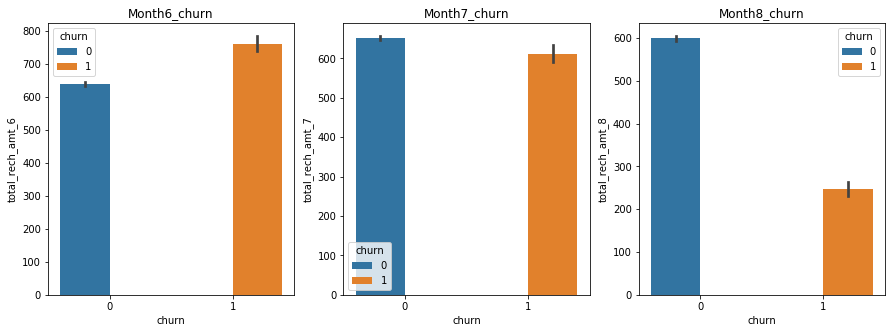

In [82]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x = 'churn', y = "total_rech_amt_6", hue = "churn", data = final_telecom_data)
plt.title('Month6_churn')
plt.subplot(1, 3, 2)
sns.barplot(x = 'churn', y = "total_rech_amt_7", hue = "churn", data = final_telecom_data)
plt.title('Month7_churn')
plt.subplot(1, 3, 3)
sns.barplot(x = 'churn', y ="total_rech_amt_8", hue = "churn", data = final_telecom_data)
plt.title('Month8_churn')
plt.show()

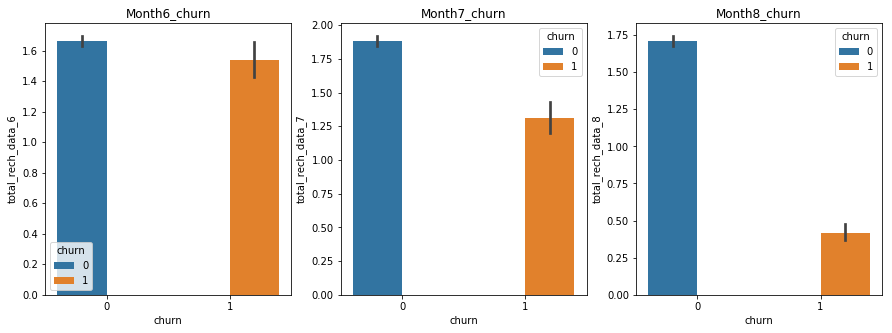

In [83]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x = 'churn', y = "total_rech_data_6", hue = "churn", data = final_telecom_data)
plt.title('Month6_churn')
plt.subplot(1, 3, 2)
sns.barplot(x = 'churn', y = "total_rech_data_7", hue = "churn", data = final_telecom_data)
plt.title('Month7_churn')
plt.subplot(1, 3, 3)
sns.barplot(x = 'churn', y ="total_rech_data_8", hue = "churn", data = final_telecom_data)
plt.title('Month8_churn')
plt.show()

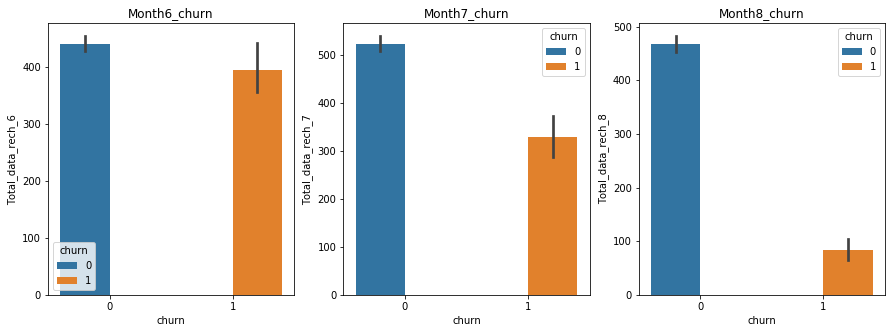

In [84]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x = 'churn', y = "Total_data_rech_6", hue = "churn", data = final_telecom_data)
plt.title('Month6_churn')
plt.subplot(1, 3, 2)
sns.barplot(x = 'churn', y = "Total_data_rech_7", hue = "churn", data = final_telecom_data)
plt.title('Month7_churn')
plt.subplot(1, 3, 3)
sns.barplot(x = 'churn', y ="Total_data_rech_8", hue = "churn", data = final_telecom_data)
plt.title('Month8_churn')
plt.show()

### From the above analysis we can clarly say that the columns are significantly dropping in the month 8 for churned customers

#### Bivariate analysis of numerical columns:

In [85]:
final_telecom_data.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000  0.602123  0.514457     0.415491     0.268600   
arpu_7              0.602123  1.000000  0.692850     0.274061     0.411069   
arpu_8              0.514457  0.692850  1.000000     0.190301     0.291484   
onnet_mou_6         0.415491  0.274061  0.190301     1.000000     0.755988   
onnet_mou_7         0.268600  0.411069  0.291484     0.755988     1.000000   
onnet_mou_8         0.229949  0.346322  0.438458     0.619828     0.804480   
offnet_mou_6        0.579953  0.405357  0.305699     0.085489     0.051359   
offnet_mou_7        0.376624  0.576021  0.423184     0.038196     0.083281   
offnet_mou_8        0.319313  0.462881  0.605695     0.033626     0.073263   
roam_ic_mou_6       0.151094  0.120329  0.112623     0.021276     0.038325   
roam_ic_mou_7       0.104749  0.126575  0.093369     0.031975     0.013398   
roam_ic_mou_8       0.114241  0.128624  0.136238     0.042715     0.035515   
roam_og_mou_6       0.225620  0.163779  0.155129     0.071437     0.081317   
roam_og_mou_7       0.169230  0.217189  0.158745     0.075394     0.066453   
roam_og_mou_8       0.146692  0.179381  0.218237     0.071128     0.076983   
loc_og_t2t_mou_6    0.203837  0.138809  0.128470     0.444870     0.326626   
loc_og_t2t_mou_7    0.159118  0.204006  0.170188     0.348762     0.435922   
loc_og_t2t_mou_8    0.151811  0.181145  0.238119     0.303327     0.358823   
loc_og_t2m_mou_6    0.405043  0.278196  0.266822     0.021170    -0.013051   
loc_og_t2m_mou_7    0.306235  0.388044  0.337627    -0.002174     0.010209   
loc_og_t2m_mou_8    0.274553  0.327644  0.448492    -0.010731    -0.001719   
loc_og_t2f_mou_6    0.172875  0.138236  0.152414    -0.033971    -0.044070   
loc_og_t2f_mou_7    0.138843  0.175655  0.170164    -0.043076    -0.038251   
loc_og_t2f_mou_8    0.132073  0.154021  0.206562    -0.042011    -0.037641   
loc_og_t2c_mou_6    0.061668  0.011772  0.002281     0.048205     0.032209   
loc_og_t2c_mou_7    0.001361  0.063595  0.024125     0.026042     0.058074   
loc_og_t2c_mou_8    0.014915  0.043873  0.081598     0.045594     0.068354   
loc_og_mou_6        0.402728  0.276865  0.263752     0.277889     0.183835   
loc_og_mou_7        0.307866  0.391560  0.337073     0.210773     0.272809   
loc_og_mou_8        0.279719  0.333617  0.450728     0.167205     0.205788   
std_og_t2t_mou_6    0.334698  0.217224  0.129147     0.866279     0.656276   
std_og_t2t_mou_7    0.202375  0.335124  0.223701     0.646731     0.874357   
std_og_t2t_mou_8    0.167874  0.280790  0.351671     0.526081     0.703635   
std_og_t2m_mou_6    0.373062  0.263528  0.154843     0.086061     0.065400   
std_og_t2m_mou_7    0.225390  0.395037  0.259543     0.044205     0.088459   
std_og_t2m_mou_8    0.181244  0.311445  0.396826     0.043839     0.083350   
std_og_t2f_mou_6    0.081828  0.061254  0.062550    -0.027436    -0.030191   
std_og_t2f_mou_7    0.064903  0.087659  0.076257    -0.030002    -0.024246   
std_og_t2f_mou_8    0.056272  0.070251  0.094297    -0.029606    -0.026699   
std_og_mou_6        0.474304  0.322334  0.190808     0.633150     0.479654   
std_og_mou_7        0.287230  0.490162  0.324627     0.455317     0.635295   
std_og_mou_8        0.231680  0.392679  0.496377     0.375608     0.518944   
isd_og_mou_6        0.211618  0.112411  0.118507    -0.028832    -0.032519   
isd_og_mou_7        0.132102  0.197265  0.142359    -0.031716    -0.031592   
isd_og_mou_8        0.130757  0.132058  0.202263    -0.023935    -0.026786   
spl_og_mou_6        0.127157  0.050622  0.022516     0.096769     0.062557   
spl_og_mou_7        0.051566  0.128768  0.058896     0.086214     0.135665   
spl_og_mou_8        0.046595  0.094694  0.140341     0.079244     0.124445   
og_others_6         0.133337  0.054437  0.023370     0.119294     0.066949   
og_others_7         0.007199  0.007444  0.021590     0.000392     0.000163   
og_others_8         0.001714  0.004399  0.00

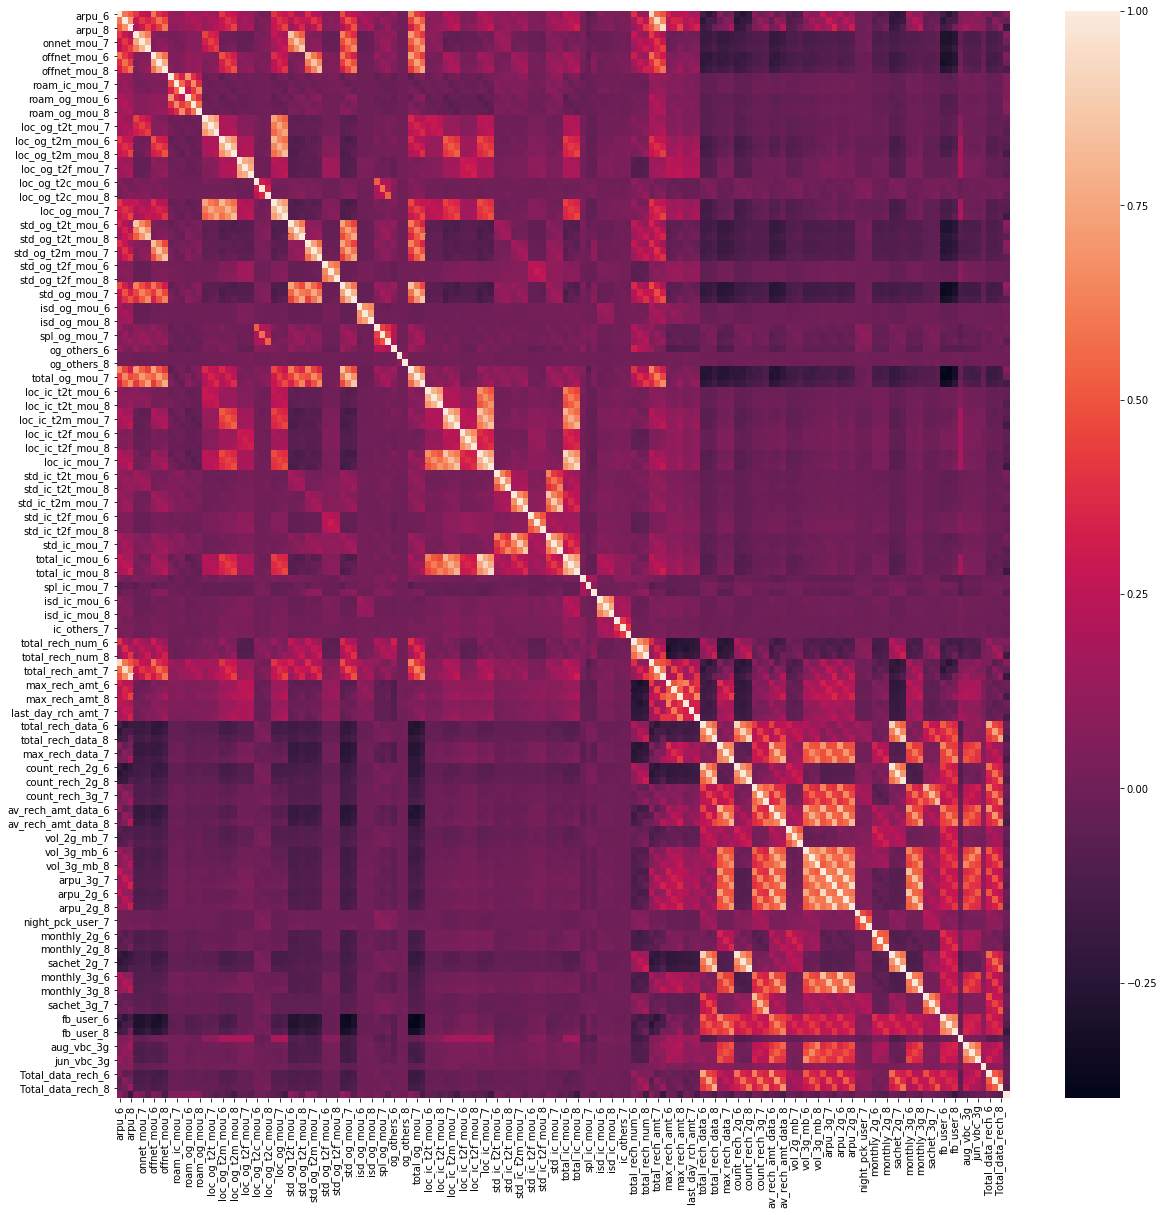

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(final_telecom_data.corr())
plt.show()

#### From the above corelation matrix we can see that there are many highly correlated  variables but for now since while modelling we can use techniques like pca to handel this .

In [87]:
corr_matrix =final_telecom_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print( highly_correlated_features)

print('\n',len(highly_correlated_features))

['onnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

 49


#### Model building:


In [88]:
telecom_df=final_telecom_data.drop(['churn'],axis=1)
X=final_telecom_data.drop(['churn'],axis=1)
y=final_telecom_data['churn']

In [89]:
X.shape

(29379, 155)

#### Scaling/Standardization/Normalization of data

In [90]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### splitting the data:

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [92]:
print(X_train.shape)
print(X_test.shape)

(20565, 155)
(8814, 155)


#### Checking the imbalance of target variable in  both train and test data:


In [93]:
y_train_imbalance=(y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance=(y_test != 0).sum()/(y_test == 0).sum()
print(y_train_imbalance)
print(y_test_imbalance)

0.0865430337612934
0.08506709343838484


#### We can see that the data is highly imbalanced so we can use SMOTE method to handle this imbalance:


In [95]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [96]:
print(X_tr.shape)
print(y_tr.shape)

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

(37854, 155)
(37854,)
Imbalance in Train Data: 1.0


In [97]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_tr, y_tr)

In [99]:
rfe_features = list(telecom_df.columns[rfe.support_])
print(rfe_features)

['arpu_6', 'offnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_8', 'sachet_2g_7', 'fb_user_8', 'aon', 'sep_vbc_3g']


In [100]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [101]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6674 1449]
 [ 117  574]]


In [103]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8123
           1       0.28      0.83      0.42       691

    accuracy                           0.82      8814
   macro avg       0.63      0.83      0.66      8814
weighted avg       0.93      0.82      0.86      8814

